# THE DATASET PROCESSING & VARIABLES FORMATION:


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('TCG_cards_near_mint_data2_final.xlsx')

#df.head()


In [3]:
# Filter the DataFrame to keep only sets where the 'Precise Pull' column has non-NaN values
filtered_df = df.groupby('set_name').filter(lambda group: group['Precise Pull'].notna().any())

# Display the resulting DataFrame
filtered_df.head()

card_name  \
2090  Code Card - Champion's Path Booster Pack   
2091                                    Weedle   
2092                                    Weedle   
2093                                    Kakuna   
2094                                    Kakuna   

                                              card_link  \
2090  /product/251544/pokemon-champion-s-path-code-c...   
2091     /product/222995/pokemon-champion-s-path-weedle   
2092     /product/222995/pokemon-champion-s-path-weedle   
2093     /product/222997/pokemon-champion-s-path-kakuna   
2094     /product/222997/pokemon-champion-s-path-kakuna   

                                             image_link          printing  \
2090  https://tcgplayer-cdn.tcgplayer.com/product/25...            Normal   
2091  https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
2092  https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
2093  https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
2094  https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   

      condition     rarity card_number  price        set_name  Imprecise Pull  \
2090  Near Mint  Code Card         NaN  $0.06  champions-path             1.0   
2091  Near Mint     Common       02/73  $0.07  champions-path             NaN   
2092  Near Mint     Common       02/73  $0.22  champions-path             NaN   
2093  Near Mint     Common       03/73  $0.04  champions-path             NaN   
2094  Near Mint     Common       03/73  $0.17  champions-path             NaN   

      Precise Pull  
2090           1.0  
2091           NaN  
2092           NaN  
2093           NaN  
2094           NaN

In [4]:
unique_set_count = filtered_df['set_name'].nunique()
unique_set_count

39

... there is trainer gallery and shiny vault etc..

In [5]:
unique_set_names = filtered_df['set_name'].unique()
print(unique_set_names)

['champions-path' 'crown-zenith' 'crown-zenith-galarian-gallery'
 'hidden-fates-shiny-vault' 'hidden-fates' 'shining-fates'
 'shining-fates-shiny-vault' 'shining-legends' 'sm-base-set'
 'sm-burning-shadows' 'sm-celestial-storm' 'sm-cosmic-eclipse'
 'sm-crimson-invasion' 'sm-forbidden-light' 'sm-guardians-rising'
 'sm-lost-thunder' 'sm-team-up' 'sm-ultra-prism' 'sm-unbroken-bonds'
 'sm-unified-minds' 'sv-paldean-fates' 'sv-scarlet-and-violet-151'
 'sv01-scarlet-and-violet-base-set' 'sv02-paldea-evolved'
 'sv03-obsidian-flames' 'sv04-paradox-rift' 'sv05-temporal-forces'
 'sv06-twilight-masquerade' 'sv07-stellar-crown'
 'swsh01-sword-and-shield-base-set' 'swsh02-rebel-clash'
 'swsh03-darkness-ablaze' 'swsh07-evolving-skies'
 'swsh10-astral-radiance-trainer-gallery' 'swsh10-astral-radiance'
 'swsh11-lost-origin-trainer-gallery' 'swsh11-lost-origin'
 'swsh12-silver-tempest' 'swsh12-silver-tempest-trainer-gallery']


In [6]:
import pandas as pd

# Mapping function to group `trainer-gallery` and `shiny-vault` under their main set names
def group_set_names(set_name):
    if 'trainer-gallery' in set_name:
        return set_name.replace('-trainer-gallery', '')
    elif 'shiny-vault' in set_name:
        return set_name.replace('-shiny-vault', '')
    elif 'galarian-gallery' in set_name:
        return set_name.replace('-galarian-gallery', '')
    return set_name

# Apply the mapping function to create a new column
filtered_df['set_name_grouped'] = filtered_df['set_name'].apply(group_set_names)

# Display unique values in the new grouped column
grouped_set_names = filtered_df['set_name_grouped'].unique()
print(grouped_set_names)


['champions-path' 'crown-zenith' 'hidden-fates' 'shining-fates'
 'shining-legends' 'sm-base-set' 'sm-burning-shadows' 'sm-celestial-storm'
 'sm-cosmic-eclipse' 'sm-crimson-invasion' 'sm-forbidden-light'
 'sm-guardians-rising' 'sm-lost-thunder' 'sm-team-up' 'sm-ultra-prism'
 'sm-unbroken-bonds' 'sm-unified-minds' 'sv-paldean-fates'
 'sv-scarlet-and-violet-151' 'sv01-scarlet-and-violet-base-set'
 'sv02-paldea-evolved' 'sv03-obsidian-flames' 'sv04-paradox-rift'
 'sv05-temporal-forces' 'sv06-twilight-masquerade' 'sv07-stellar-crown'
 'swsh01-sword-and-shield-base-set' 'swsh02-rebel-clash'
 'swsh03-darkness-ablaze' 'swsh07-evolving-skies' 'swsh10-astral-radiance'
 'swsh11-lost-origin' 'swsh12-silver-tempest']


In [7]:
grouped_unique_set_count = filtered_df['set_name_grouped'].nunique()
grouped_unique_set_count

33

perfect, now we have all the sets properly grouped (including vaults and galleries)..

In [8]:
# Reset the index of the DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Display the DataFrame to confirm the new index
#filtered_df.head()


In [9]:
# Remove the dollar sign and convert the price column to numeric
filtered_df['price'] = filtered_df['price'].replace({r'\$': ''}, regex=True).astype(float)

# Display the DataFrame to confirm the conversion
filtered_df.head()


card_name  \
0  Code Card - Champion's Path Booster Pack   
1                                    Weedle   
2                                    Weedle   
3                                    Kakuna   
4                                    Kakuna   

                                           card_link  \
0  /product/251544/pokemon-champion-s-path-code-c...   
1     /product/222995/pokemon-champion-s-path-weedle   
2     /product/222995/pokemon-champion-s-path-weedle   
3     /product/222997/pokemon-champion-s-path-kakuna   
4     /product/222997/pokemon-champion-s-path-kakuna   

                                          image_link          printing  \
0  https://tcgplayer-cdn.tcgplayer.com/product/25...            Normal   
1  https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
2  https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
3  https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
4  https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   

   condition     rarity card_number  price        set_name  Imprecise Pull  \
0  Near Mint  Code Card         NaN   0.06  champions-path             1.0   
1  Near Mint     Common       02/73   0.07  champions-path             NaN   
2  Near Mint     Common       02/73   0.22  champions-path             NaN   
3  Near Mint     Common       03/73   0.04  champions-path             NaN   
4  Near Mint     Common       03/73   0.17  champions-path             NaN   

   Precise Pull set_name_grouped  
0           1.0   champions-path  
1           NaN   champions-path  
2           NaN   champions-path  
3           NaN   champions-path  
4           NaN   champions-path

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11285 entries, 0 to 11284
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   card_name         11285 non-null  object 
 1   card_link         11285 non-null  object 
 2   image_link        11285 non-null  object 
 3   printing          11285 non-null  object 
 4   condition         11285 non-null  object 
 5   rarity            11285 non-null  object 
 6   card_number       11198 non-null  object 
 7   price             11285 non-null  float64
 8   set_name          11285 non-null  object 
 9   Imprecise Pull    791 non-null    float64
 10  Precise Pull      2394 non-null   float64
 11  set_name_grouped  11285 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


In [11]:
# Rename the columns
filtered_df = filtered_df.rename(columns={
    'Precise Pull': 'precise_pull',
    'Imprecise Pull': 'imprecise_pull'
})

# Display the DataFrame to confirm the renaming
filtered_df.head()


card_name  \
0  Code Card - Champion's Path Booster Pack   
1                                    Weedle   
2                                    Weedle   
3                                    Kakuna   
4                                    Kakuna   

                                           card_link  \
0  /product/251544/pokemon-champion-s-path-code-c...   
1     /product/222995/pokemon-champion-s-path-weedle   
2     /product/222995/pokemon-champion-s-path-weedle   
3     /product/222997/pokemon-champion-s-path-kakuna   
4     /product/222997/pokemon-champion-s-path-kakuna   

                                          image_link          printing  \
0  https://tcgplayer-cdn.tcgplayer.com/product/25...            Normal   
1  https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
2  https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
3  https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
4  https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   

   condition     rarity card_number  price        set_name  imprecise_pull  \
0  Near Mint  Code Card         NaN   0.06  champions-path             1.0   
1  Near Mint     Common       02/73   0.07  champions-path             NaN   
2  Near Mint     Common       02/73   0.22  champions-path             NaN   
3  Near Mint     Common       03/73   0.04  champions-path             NaN   
4  Near Mint     Common       03/73   0.17  champions-path             NaN   

   precise_pull set_name_grouped  
0           1.0   champions-path  
1           NaN   champions-path  
2           NaN   champions-path  
3           NaN   champions-path  
4           NaN   champions-path

In [12]:
filtered_df.describe()

price  imprecise_pull  precise_pull
count  11285.000000      791.000000   2394.000000
mean       2.772173        0.046094      0.018003
std       19.318656        0.199191      0.116182
min        0.020000        0.001100      0.000500
25%        0.090000        0.002100      0.001837
50%        0.200000        0.003200      0.002433
75%        0.590000        0.006400      0.006481
max      975.130000        1.000000      1.000000

In [13]:
# Display unique values in the printing
grouped_set_names = filtered_df['printing'].unique()
print(grouped_set_names)

['Normal' 'Reverse Holofoil' 'Holofoil']


In [14]:
# Display unique values in the rarity
grouped_set_names = filtered_df['rarity'].unique()
print(grouped_set_names)

['Code Card' 'Common' 'Holo Rare' 'Secret Rare' 'Ultra Rare' 'Uncommon'
 'Radiant Rare' 'Rare' 'Shiny Holo Rare' 'Amazing Rare' 'Prism Rare'
 'Double Rare' 'Hyper Rare' 'Illustration Rare' 'Shiny Rare'
 'Shiny Ultra Rare' 'Special Illustration Rare' 'ACE SPEC Rare']


In [15]:
# Dictionary mapping set names to their release dates from: https://www.pokemon.com/us/pokemon-tcg/trading-card-expansions
set_release_dates = {
    'sm-base-set': '2017-02-03',
    'sm-guardians-rising': '2017-05-05',
    'sm-burning-shadows': '2017-08-04',
    'shining-legends': '2017-10-06',
    'sm-crimson-invasion': '2017-11-03',
    'sm-ultra-prism': '2018-02-02',
    'sm-forbidden-light': '2018-05-04',
    'sm-celestial-storm': '2018-08-03',
    'dragon-majesty': '2018-09-07',
    'sm-lost-thunder': '2018-11-02',
    'sm-team-up': '2019-02-01',
    'detective-pikachu': '2019-03-29',
    'sm-unbroken-bonds': '2019-05-03',
    'sm-unified-minds': '2019-08-02',
    'hidden-fates': '2019-08-23',
    'sm-cosmic-eclipse': '2019-11-01',
    'swsh01-sword-and-shield-base-set': '2020-02-07',
    'swsh02-rebel-clash': '2020-05-01',
    'swsh03-darkness-ablaze': '2020-08-14',
    'champions-path': '2020-09-25',
    'swsh04-vivid-voltage': '2020-11-13',
    'shining-fates': '2021-02-19',
    'swsh05-battle-styles': '2021-03-19',
    'swsh06-chilling-reign': '2021-06-18',
    'swsh07-evolving-skies': '2021-08-27',
    'celebrations': '2021-10-08',
    'swsh08-fusion-strike': '2021-11-12',
    'swsh09-brilliant-stars': '2022-02-25',
    'swsh10-astral-radiance': '2022-05-27',
    'pokemon-go': '2022-07-01',
    'swsh11-lost-origin': '2022-09-09',
    'swsh12-silver-tempest': '2022-11-11',
    'crown-zenith': '2023-01-20',
    'sv01-scarlet-and-violet-base-set': '2023-03-31',
    'sv02-paldea-evolved': '2023-06-09',
    'sv03-obsidian-flames': '2023-08-11',
    'sv-scarlet-and-violet-151': '2023-09-22',
    'sv04-paradox-rift': '2023-11-03',
    'sv-paldean-fates': '2024-01-26',
    'sv05-temporal-forces': '2024-03-22',
    'sv06-twilight-masquerade': '2024-05-24',
    'sv07-stellar-crown': '2024-09-13',
    'sv08-shrouded-fable': '2024-08-02',
    'sv09-surging-sparks': '2024-11-08',
    'sv10-prismatic-evolutions': '2025-01-17',
}

# Adding release dates to the DataFrame
filtered_df['release_date'] = filtered_df['set_name_grouped'].map(set_release_dates)

# Displaying the first few rows to confirm
print(filtered_df[['set_name_grouped', 'release_date']].head())


  set_name_grouped release_date
0   champions-path   2020-09-25
1   champions-path   2020-09-25
2   champions-path   2020-09-25
3   champions-path   2020-09-25
4   champions-path   2020-09-25


In [16]:
filtered_df

card_name  \
0      Code Card - Champion's Path Booster Pack   
1                                        Weedle   
2                                        Weedle   
3                                        Kakuna   
4                                        Kakuna   
...                                         ...   
11280                                    Worker   
11281                       Regenerative Energy   
11282                       Regenerative Energy   
11283                            V Guard Energy   
11284                            V Guard Energy   

                                               card_link  \
0      /product/251544/pokemon-champion-s-path-code-c...   
1         /product/222995/pokemon-champion-s-path-weedle   
2         /product/222995/pokemon-champion-s-path-weedle   
3         /product/222997/pokemon-champion-s-path-kakuna   
4         /product/222997/pokemon-champion-s-path-kakuna   
...                                                  ...   
11280  /product/451815/pokemon-swsh12-silver-tempest-...   
11281  /product/451816/pokemon-swsh12-silver-tempest-...   
11282  /product/451816/pokemon-swsh12-silver-tempest-...   
11283  /product/451817/pokemon-swsh12-silver-tempest-...   
11284  /product/451817/pokemon-swsh12-silver-tempest-...   

                                              image_link          printing  \
0      https://tcgplayer-cdn.tcgplayer.com/product/25...            Normal   
1      https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
2      https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
3      https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
4      https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
...                                                  ...               ...   
11280  https://tcgplayer-cdn.tcgplayer.com/product/45...  Reverse Holofoil   
11281  https://tcgplayer-cdn.tcgplayer.com/product/45...            Normal   
11282  https://tcgplayer-cdn.tcgplayer.com/product/45...  Reverse Holofoil   
11283  https://tcgplayer-cdn.tcgplayer.com/product/45...            Normal   
11284  https://tcgplayer-cdn.tcgplayer.com/product/45...  Reverse Holofoil   

       condition     rarity card_number  price               set_name  \
0      Near Mint  Code Card         NaN   0.06         champions-path   
1      Near Mint     Common       02/73   0.07         champions-path   
2      Near Mint     Common       02/73   0.22         champions-path   
3      Near Mint     Common       03/73   0.04         champions-path   
4      Near Mint     Common       03/73   0.17         champions-path   
...          ...        ...         ...    ...                    ...   
11280  Near Mint   Uncommon     167/195   0.26  swsh12-silver-tempest   
11281  Near Mint   Uncommon     168/195   0.09  swsh12-silver-tempest   
11282  Near Mint   Uncommon     168/195   0.10  swsh12-silver-tempest   
11283  Near Mint   Uncommon     169/195   0.09  swsh12-silver-tempest   
11284  Near Mint   Uncommon     169/195   0.31  swsh12-silver-tempest   

       imprecise_pull  precise_pull       set_name_grouped release_date  
0                 1.0           1.0         champions-path   2020-09-25  
1                 NaN           NaN         champions-path   2020-09-25  
2                 NaN           NaN         champions-path   2020-09-25  
3                 NaN           NaN         champions-path   2020-09-25  
4                 NaN           NaN         champions-path   2020-09-25  
...               ...           ...                    ...          ...  
11280             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11281             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11282             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11283             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11284             NaN           NaN  swsh12-silver-tempest   2022-11-11  

[

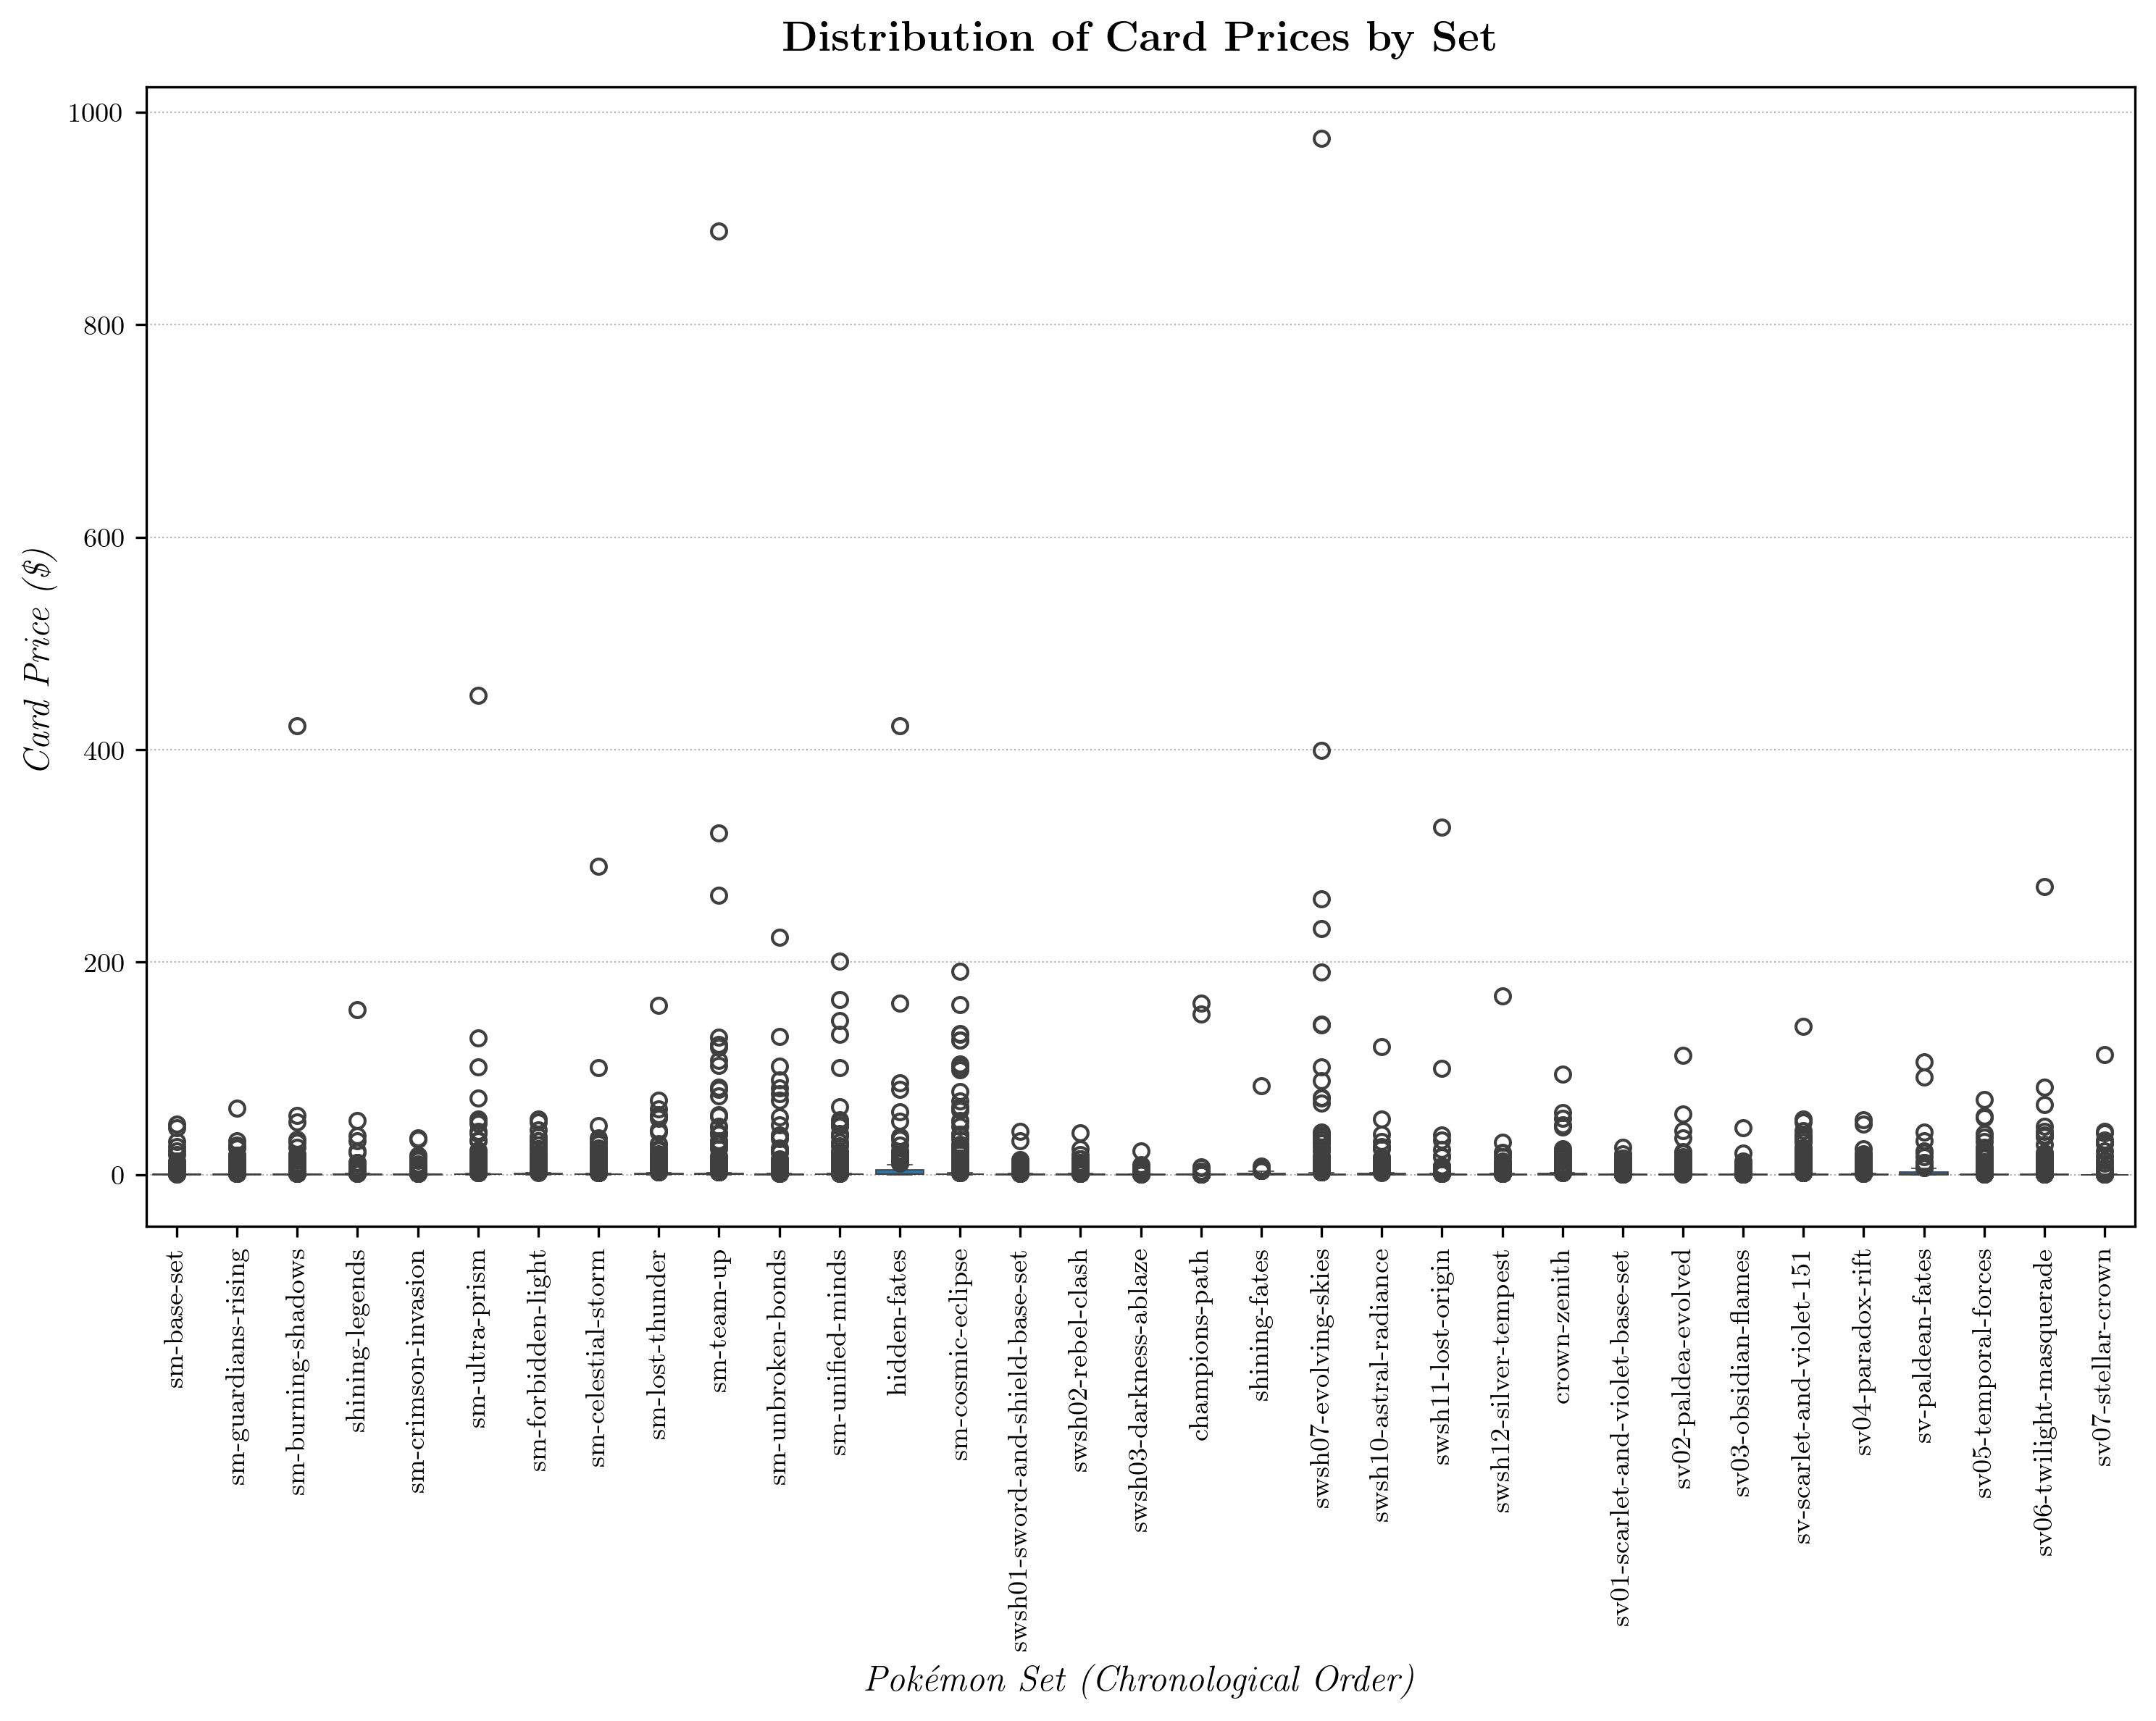

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# LaTeX-style rendering
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "figure.dpi": 300
})

# Prepare data
filtered_df["price"] = pd.to_numeric(filtered_df["price"], errors="coerce")
filtered_df["release_date"] = pd.to_datetime(filtered_df["release_date"], errors="coerce")

# Chronological order for sets
set_order = (
    filtered_df.groupby("set_name_grouped")["release_date"]
    .min()
    .sort_values()
    .index
)
filtered_df["set_name_grouped_ordered"] = pd.Categorical(
    filtered_df["set_name_grouped"], categories=set_order, ordered=True
)

# Plot (more narrow and bigger fliers)
plt.figure(figsize=(10, 8))  # narrower width

sns.boxplot(
    x="set_name_grouped_ordered",
    y="price",
    data=filtered_df,
    showfliers=True,
    linewidth=0.4,
    fliersize=5  # larger flier points like original
)

plt.xticks(rotation=90)
plt.xlabel(r"\textit{Pok\'emon Set (Chronological Order)}")
plt.ylabel(r"\textit{Card Price (\$)}")
plt.title(r"\textbf{Distribution of Card Prices by Set}", pad=12)
plt.grid(axis='y', linestyle=':', linewidth=0.5)

plt.tight_layout(pad=1.0)
plt.show()


### Check for how influential the reverse holo/holo is on the expected value values:

In [17]:
def calculate_booster_pack_value(df):
    """
    Calculate the expected value of a booster pack for each set.

    Parameters:
    - df (pd.DataFrame): DataFrame containing card data with columns 'set_name_grouped', 'price', 'precise_pull', 'rarity'.

    Returns:
    - pd.DataFrame: DataFrame with columns ['set_name_grouped', 'expected_value'].
    """
    results = []

    # Group by set
    grouped = df.groupby('set_name_grouped')

    for set_name, group in grouped:
        # Step 1: Bulk cards (cards with NaN pull rates)
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        # Step 2: Cards with pull rates (including code cards)
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        # Step 3: Total expected value
        expected_value = bulk_value + pull_rate_value

        # Append result for this set
        results.append({'set_name_grouped': set_name, 'expected_value': expected_value, 'bulk_value': bulk_value, 'pull_rate_value': pull_rate_value})

    # Convert results to a DataFrame
    return pd.DataFrame(results)


In [18]:


# Calculate the expected value of booster packs
booster_pack_values = calculate_booster_pack_value(filtered_df)

# Display the results
booster_pack_values


set_name_grouped  expected_value  bulk_value  \
0                     champions-path        2.987305    1.418519   
1                       crown-zenith        4.064795    1.687281   
2                       hidden-fates        7.267429    2.263393   
3                      shining-fates        2.439886    1.168478   
4                    shining-legends        6.988347    3.110833   
5                        sm-base-set        3.150060    2.229259   
6                 sm-burning-shadows        3.524877    2.059914   
7                 sm-celestial-storm        6.941998    4.758759   
8                  sm-cosmic-eclipse        8.871870    4.598964   
9                sm-crimson-invasion        3.673729    2.875000   
10                sm-forbidden-light        6.922504    5.284762   
11               sm-guardians-rising        3.433556    2.610593   
12                   sm-lost-thunder        8.315090    6.358333   
13                        sm-team-up       12.365701    5.828618   
14                    sm-ultra-prism        7.587501    4.304800   
15                 sm-unbroken-bonds        6.673253    3.980114   
16                  sm-unified-minds        7.051222    3.843878   
17                  sv-paldean-fates        3.031262    0.878395   
18         sv-scarlet-and-violet-151        7.002061    2.782026   
19  sv01-scarlet-and-violet-base-set        2.423782    1.402062   
20               sv02-paldea-evolved        2.949948    1.254648   
21              sv03-obsidian-flames        2.620933    1.393750   
22                 sv04-paradox-rift        2.912214    1.492901   
23              sv05-temporal-forces        2.648177    0.999286   
24          sv06-twilight-masquerade        2.771828    0.923129   
25                sv07-stellar-crown        2.649019    0.813566   
26  swsh01-sword-and-shield-base-set        2.983361    2.400862   
27                swsh02-rebel-clash        3.418704    2.767987   
28            swsh03-darkness-ablaze        2.088103    1.613871   
29             swsh07-evolving-skies        3.566549    1.129545   
30            swsh10-astral-radiance        3.059803    1.964865   
31                swsh11-lost-origin        2.722884    1.402326   
32             swsh12-silver-tempest        2.342477    1.389273   

    pull_rate_value  
0          1.568787  
1          2.377514  
2          5.004036  
3          1.271408  
4          3.877514  
5          0.920801  
6          1.464964  
7          2.183239  
8          4.272906  
9          0.798729  
10         1.637742  
11         0.822962  
12         1.956756  
13         6.537083  
14         3.282701  
15         2.693139  
16         3.207344  
17         2.152867  
18         4.220034  
19         1.021721  
20         1.695300  
21         1.227183  
22         1.419312  
23         1.648892  
24         1.848699  
25         1.835453  
26         0.582499  
27         0.650717  
28         0.474232  
29         2.437003  
30         1.094938  
31         1.320559  
32         0.953203

In [19]:
def calculate_booster_pack_value2(df):
    """
    Calculate the expected value of a booster pack for each set,
    and include the influence and weighted contribution of Reverse Holo and Holofoil cards.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns 'set_name_grouped', 'price', 'precise_pull', 'printing'.

    Returns:
    - pd.DataFrame: One row per set with expected values, influence, and contribution measures.
    """
    results = []

    grouped = df.groupby('set_name_grouped')

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10  # 10 cards per pack assumption

        # Subsets
        reverse_bulk = bulk_cards[bulk_cards['printing'] == 'Reverse Holofoil']
        holo_bulk = bulk_cards[bulk_cards['printing'] == 'Holofoil']
        normal_bulk = bulk_cards[~bulk_cards['printing'].isin(['Reverse Holofoil', 'Holofoil'])]

        # Counts
        n_reverse = len(reverse_bulk)
        n_holo = len(holo_bulk)
        n_normal = len(normal_bulk)
        n_total = n_reverse + n_holo + n_normal

        # Means
        μ_reverse = reverse_bulk['price'].mean() if n_reverse > 0 else 0
        μ_holo = holo_bulk['price'].mean() if n_holo > 0 else 0
        μ_normal = normal_bulk['price'].mean() if n_normal > 0 else 0
        μ_bulk_total = bulk_price_avg

        # Influence (abs + %)
        influence_reverse = μ_reverse - μ_normal if n_normal > 0 else None
        relative_influence_reverse = (
            (μ_reverse - μ_normal) / μ_normal * 100 if μ_normal > 0 else None
        )

        influence_holo = μ_holo - μ_normal if n_normal > 0 else None
        relative_influence_holo = (
            (μ_holo - μ_normal) / μ_normal * 100 if μ_normal > 0 else None
        )

        # Weighted contribution to bulk average
        weight_reverse = n_reverse / n_total if n_total > 0 else 0
        weight_holo = n_holo / n_total if n_total > 0 else 0
        weight_normal = n_normal / n_total if n_total > 0 else 0

        contribution_reverse = μ_reverse * weight_reverse
        contribution_holo = μ_holo * weight_holo
        contribution_normal = μ_normal * weight_normal

        # Check: should ≈ μ_bulk_total
        μ_bulk_weighted = contribution_reverse + contribution_holo + contribution_normal

        # Pull rate section
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        results.append({
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            
            #'μ_bulk_total': μ_bulk_total,
            #'μ_normal_bulk': μ_normal,
            #'μ_reverse_bulk': μ_reverse,
            #'μ_holo_bulk': μ_holo,
            #'influence_reverse_abs': influence_reverse,
            #'influence_reverse_pct': relative_influence_reverse,
            #'influence_holo_abs': influence_holo,
            #'influence_holo_pct': relative_influence_holo,
            #'weight_normal': weight_normal,
            #'weight_reverse': weight_reverse,
            #'weight_holo': weight_holo,
            'contribution_normal': contribution_normal,
            'contribution_reverse': contribution_reverse,
            'contribution_holo': contribution_holo,
            'μ_bulk_weighted_check': μ_bulk_weighted,
            'n_normal': n_normal,
            'n_reverse': n_reverse,
            'n_holo': n_holo
        })

    return pd.DataFrame(results)

# Calculate the expected value of booster packs
booster_pack_values_w_effects = calculate_booster_pack_value2(filtered_df)

# Display the results
booster_pack_values_w_effects

set_name_grouped  expected_value  pull_rate_value  \
0                     champions-path        2.987305         1.568787   
1                       crown-zenith        4.064795         2.377514   
2                       hidden-fates        7.267429         5.004036   
3                      shining-fates        2.439886         1.271408   
4                    shining-legends        6.988347         3.877514   
5                        sm-base-set        3.150060         0.920801   
6                 sm-burning-shadows        3.524877         1.464964   
7                 sm-celestial-storm        6.941998         2.183239   
8                  sm-cosmic-eclipse        8.871870         4.272906   
9                sm-crimson-invasion        3.673729         0.798729   
10                sm-forbidden-light        6.922504         1.637742   
11               sm-guardians-rising        3.433556         0.822962   
12                   sm-lost-thunder        8.315090         1.956756   
13                        sm-team-up       12.365701         6.537083   
14                    sm-ultra-prism        7.587501         3.282701   
15                 sm-unbroken-bonds        6.673253         2.693139   
16                  sm-unified-minds        7.051222         3.207344   
17                  sv-paldean-fates        3.031262         2.152867   
18         sv-scarlet-and-violet-151        7.002061         4.220034   
19  sv01-scarlet-and-violet-base-set        2.423782         1.021721   
20               sv02-paldea-evolved        2.949948         1.695300   
21              sv03-obsidian-flames        2.620933         1.227183   
22                 sv04-paradox-rift        2.912214         1.419312   
23              sv05-temporal-forces        2.648177         1.648892   
24          sv06-twilight-masquerade        2.771828         1.848699   
25                sv07-stellar-crown        2.649019         1.835453   
26  swsh01-sword-and-shield-base-set        2.983361         0.582499   
27                swsh02-rebel-clash        3.418704         0.650717   
28            swsh03-darkness-ablaze        2.088103         0.474232   
29             swsh07-evolving-skies        3.566549         2.437003   
30            swsh10-astral-radiance        3.059803         1.094938   
31                swsh11-lost-origin        2.722884         1.320559   
32             swsh12-silver-tempest        2.342477         0.953203   

    bulk_value  contribution_normal  contribution_reverse  contribution_holo  \
0     1.418519             0.024630              0.103056           0.014167   
1     1.687281             0.020570              0.107895           0.040263   
2     2.263393             0.050893              0.156875           0.018571   
3     1.168478             0.023261              0.081196           0.012391   
4     3.110833             0.059667              0.221667           0.029750   
5     2.229259             0.041741              0.159815           0.021370   
6     2.059914             0.057586              0.129741           0.018664   
7     4.758759             0.092555              0.295328           0.087993   
8     4.598964             0.092098              0.304378           0.063420   
9     2.875000             0.062446              0.189457           0.035598   
10    5.284762             0.125714              0.323190           0.079571   
11    2.610593             0.065763              0.165890           0.029407   
12    6.358333             0.123218              0.400402           0.112213   
13    5.828618             0.122303              0.371382           0.089178   
14    4.304800             0.095760              0.286680           0.048040   
15    3.980114             0.079602              0.249034           0.069375   
16    3.843878             0.100740              0.248112           0.035536   
17    0.878395             0.020123              0.060432           0.007284   
18    2.782026   

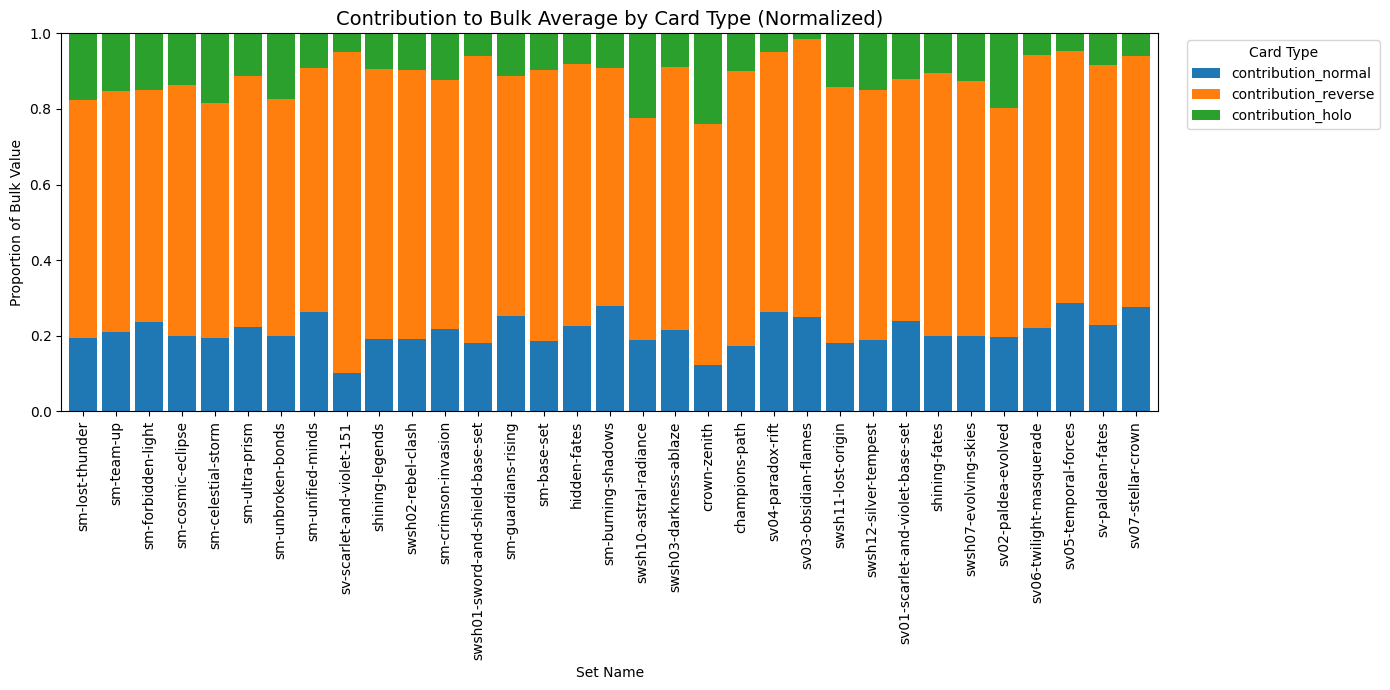

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort sets if you want (e.g. by reverse holo contribution descending)
df = booster_pack_values_w_effects.copy()
df = df.sort_values(by='contribution_reverse', ascending=False)

# Normalize the contributions so they sum to 1 per set
contrib_df = df[['set_name_grouped', 'contribution_normal', 'contribution_reverse', 'contribution_holo']].copy()
contrib_df.set_index('set_name_grouped', inplace=True)

# Normalize to 100% contribution (sum to 1 per row)
contrib_normalized = contrib_df.div(contrib_df.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

contrib_normalized.plot(kind='bar', stacked=True, ax=ax, width=0.85)

ax.set_title('Contribution to Bulk Average by Card Type (Normalized)', fontsize=14)
ax.set_ylabel('Proportion of Bulk Value')
ax.set_xlabel('Set Name')
ax.legend(title='Card Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


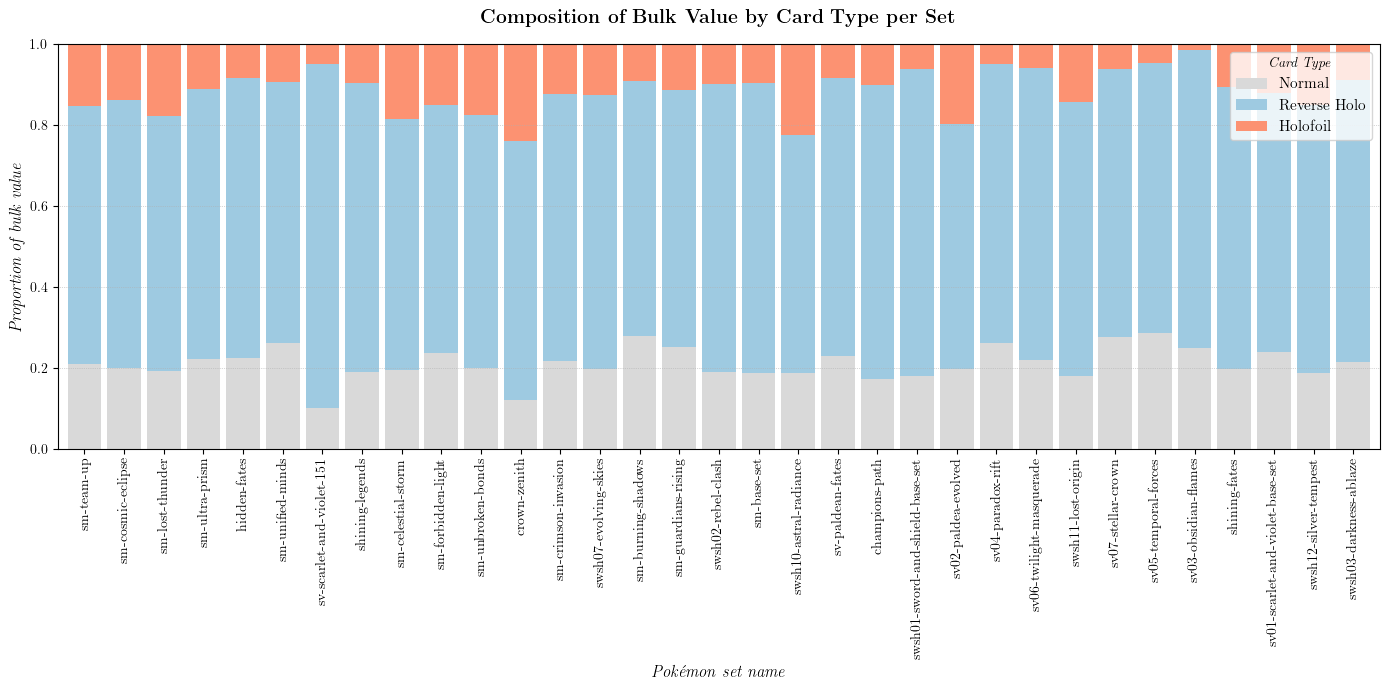

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Enable LaTeX-style plotting
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Prepare and sort data
df = booster_pack_values_w_effects.copy()
df = df.sort_values(by='expected_value', ascending=False)  # Change this line to sort by any column

# Normalize contributions
contrib_df = df[['set_name_grouped', 'contribution_normal', 'contribution_reverse', 'contribution_holo']].copy()
contrib_df.set_index('set_name_grouped', inplace=True)
contrib_normalized = contrib_df.div(contrib_df.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#d9d9d9', '#9ecae1', '#fc9272']  # soft grayscale + gentle blue/red
contrib_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.85)

ax.set_title(r'\textbf{Composition of Bulk Value by Card Type per Set}', pad=15)
ax.set_ylabel(r'\textit{Proportion of bulk value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.set_ylim(0, 1)
ax.legend(title=r'\textit{Card Type}', labels=['Normal', 'Reverse Holo', 'Holofoil'], loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## now the more detailed bulk value decomposition:


In [22]:
import re

def calculate_booster_pack_value_detailed_final_with_check(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic and energy detection.
    Also tracks any bulk cards that were not included in any category.
    """
    results = []
    omitted_cards = []  # 🧾 Store cards that were skipped
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Grass Energy',
        'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]
        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        # --- Check for uncategorized bulk cards ---
        all_categorized_indices = pd.Index([])
        for cat_df in categories.values():
            all_categorized_indices = all_categorized_indices.union(cat_df.index)

        uncategorized = bulk_cards.loc[~bulk_cards.index.isin(all_categorized_indices)].copy()
        if not uncategorized.empty:
            uncategorized['set_name_grouped'] = set_name
            omitted_cards.append(uncategorized)

        # --- Contributions ---
        total_bulk_cards = sum(len(cat) for cat in categories.values())
        contribs = {}
        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w

        μ_bulk_weighted = sum(contribs.values())

        # Pull-rate value
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        result = {
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            'μ_bulk_weighted_check': μ_bulk_weighted
        }
        result.update(contribs)
        results.append(result)

    final_df = pd.DataFrame(results)

    # Combine omitted cards across all sets
    omitted_df = pd.concat(omitted_cards, ignore_index=True) if omitted_cards else pd.DataFrame()

    return final_df, omitted_df


booster_pack_values, omitted_cards_df = calculate_booster_pack_value_detailed_final_with_check(filtered_df)

# Show just the sets where cards were missed
if not omitted_cards_df.empty:
    print("Cards omitted from all defined categories:")
    display(omitted_cards_df[['set_name_grouped', 'card_name', 'printing', 'rarity', 'price']])
else:
    print("All cards were correctly categorized!")


Cards omitted from all defined categories:


set_name_grouped                              card_name  \
0  sv01-scarlet-and-violet-base-set    Basic Darkness Energy (Cosmos Holo)   
1               sv02-paldea-evolved  Frigibax - 058/193 (Holiday Calendar)   

   printing  rarity  price  
0  Holofoil  Common   0.63  
1  Holofoil  Common   2.31

-> so the Darkness Energy added to the list of energies, and frigibax deleted completely..:



In [23]:
# Remove the Frigibax Holiday Calendar card from the dataset
filtered_df = filtered_df[filtered_df['card_name'] != 'Frigibax - 058/193 (Holiday Calendar)']


In [24]:
import pandas as pd
import re

def calculate_booster_pack_value_detailed_final2(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic,
    energy detection, and adds all counts needed for EV formula weighting.
    Includes both original EV and adjusted EV based on pack structure (SV vs. pre-SV).
    """
    results = []
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Darkness Energy',
        'Grass Energy', 'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        # Identify SV era
        is_sv_era = set_name.startswith('sv')

        # Filter cards
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value_simple = bulk_price_avg * 10  # original estimate

        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]
        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        # Define categories
        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        total_bulk_cards = sum(len(cat) for cat in categories.values())
        contribs = {}
        counts = {}

        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w
            counts[f'n_{key}'] = n

        # Totals for formula weighting
        counts['n_rh_total'] = (
            counts.get('n_reverse_common', 0) +
            counts.get('n_reverse_uncommon', 0) +
            counts.get('n_reverse_rare', 0)
        )
        counts['n_rare_total'] = (
            counts.get('n_rare_non_holo', 0) +
            counts.get('n_holo_rare', 0)
        )

        μ_bulk_weighted = sum(contribs.values())

        # Pull rate EV
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        # Means
        μ_common = categories['common']['price'].mean() if counts['n_common'] > 0 else 0
        μ_uncommon = categories['uncommon']['price'].mean() if counts['n_uncommon'] > 0 else 0
        μ_energy = categories['energy']['price'].mean() if counts['n_energy'] > 0 else 0

        μ_reverse_common = categories['reverse_common']['price'].mean() if counts['n_reverse_common'] > 0 else 0
        μ_reverse_uncommon = categories['reverse_uncommon']['price'].mean() if counts['n_reverse_uncommon'] > 0 else 0
        μ_reverse_rare = categories['reverse_rare']['price'].mean() if counts['n_reverse_rare'] > 0 else 0

        μ_nonholo_rare = categories['rare_non_holo']['price'].mean() if counts['n_rare_non_holo'] > 0 else 0
        μ_holo_rare = categories['holo_rare']['price'].mean() if counts['n_holo_rare'] > 0 else 0

        # Weighted rare slot
        total_rare_slot = counts['n_rare_total']
        rare_slot_value = (
            (counts['n_holo_rare'] / total_rare_slot * μ_holo_rare if total_rare_slot > 0 else 0) +
            (counts['n_rare_non_holo'] / total_rare_slot * μ_nonholo_rare if total_rare_slot > 0 else 0)
        )

        # Weighted reverse holo slot(s)
        total_rh = counts['n_rh_total']
        reverse_holo_value = (
            (counts['n_reverse_rare'] / total_rh * μ_reverse_rare if total_rh > 0 else 0) +
            (counts['n_reverse_uncommon'] / total_rh * μ_reverse_uncommon if total_rh > 0 else 0) +
            (counts['n_reverse_common'] / total_rh * μ_reverse_common if total_rh > 0 else 0)
        )

        # Final formula-based bulk value
        if is_sv_era:
            bulk_value_formula = (
                rare_slot_value +
                2 * reverse_holo_value +
                3 * μ_uncommon +
                4 * μ_common +
                μ_energy
            )
        else:
            bulk_value_formula = (
                rare_slot_value +
                reverse_holo_value +
                3 * μ_uncommon +
                5 * μ_common +
                μ_energy
            )

        expected_value_formula = pull_rate_value + bulk_value_formula

        # Final results row
        result = {
            'set_name_grouped': set_name,
            'is_sv_era': is_sv_era,

            # Original estimate
            'expected_value': bulk_value_simple + pull_rate_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value_simple': bulk_value_simple,
            'μ_bulk_weighted_check': μ_bulk_weighted,
            'μ_bulk_weighted_check*10': μ_bulk_weighted * 10,

            # New formula-based EV
            'expected_value_formula': expected_value_formula,
            'bulk_value_formula': bulk_value_formula,
            'rare_slot_value': rare_slot_value,
            'reverse_holo_value': reverse_holo_value,
            'new_ev_check': pull_rate_value + bulk_value_formula
          

        
        }

        result.update(contribs)
        result.update(counts)
        results.append(result)

    return pd.DataFrame(results)


booster_pack_values_detailed_final_FOR_FINAL_GRAPH = calculate_booster_pack_value_detailed_final2(filtered_df)



booster_pack_values_detailed_final2 = calculate_booster_pack_value_detailed_final2(filtered_df)
booster_pack_values_detailed_final2

# Step 1: Extract one release_date per set from filtered_df
release_dates = (
    filtered_df[['set_name_grouped', 'release_date']]
    .drop_duplicates(subset='set_name_grouped')
)

# Step 2: Merge with booster_pack_values_detailed_final2
booster_pack_values_detailed_final2 = booster_pack_values_detailed_final2.merge(
    release_dates,
    on='set_name_grouped',
    how='left'
)


display_columns = [
    'set_name_grouped',
    'expected_value',         # original EV
    'pull_rate_value',        # component of original EV
    'bulk_value_simple',      # component of original EV
    'μ_bulk_weighted_check*10',
    'expected_value_formula', # formula-based EV
    'new_ev_check',
    'bulk_value_formula',      # formula-based bulk value
    'release_date'
    
]

booster_pack_values_detailed_final2[display_columns]



set_name_grouped  expected_value  pull_rate_value  \
0                     champions-path        2.987305         1.568787   
1                       crown-zenith        4.064795         2.377514   
2                       hidden-fates        7.267429         5.004036   
3                      shining-fates        2.439886         1.271408   
4                    shining-legends        6.988347         3.877514   
5                        sm-base-set        3.150060         0.920801   
6                 sm-burning-shadows        3.524877         1.464964   
7                 sm-celestial-storm        6.941998         2.183239   
8                  sm-cosmic-eclipse        8.871870         4.272906   
9                sm-crimson-invasion        3.673729         0.798729   
10                sm-forbidden-light        6.922504         1.637742   
11               sm-guardians-rising        3.433556         0.822962   
12                   sm-lost-thunder        8.315090         1.956756   
13                        sm-team-up       12.365701         6.537083   
14                    sm-ultra-prism        7.587501         3.282701   
15                 sm-unbroken-bonds        6.673253         2.693139   
16                  sm-unified-minds        7.051222         3.207344   
17                  sv-paldean-fates        3.031262         2.152867   
18         sv-scarlet-and-violet-151        7.002061         4.220034   
19  sv01-scarlet-and-violet-base-set        2.423782         1.021721   
20               sv02-paldea-evolved        2.888238         1.695300   
21              sv03-obsidian-flames        2.620933         1.227183   
22                 sv04-paradox-rift        2.912214         1.419312   
23              sv05-temporal-forces        2.648177         1.648892   
24          sv06-twilight-masquerade        2.771828         1.848699   
25                sv07-stellar-crown        2.649019         1.835453   
26  swsh01-sword-and-shield-base-set        2.983361         0.582499   
27                swsh02-rebel-clash        3.418704         0.650717   
28            swsh03-darkness-ablaze        2.088103         0.474232   
29             swsh07-evolving-skies        3.566549         2.437003   
30            swsh10-astral-radiance        3.059803         1.094938   
31                swsh11-lost-origin        2.722884         1.320559   
32             swsh12-silver-tempest        2.342477         0.953203   

    bulk_value_simple  μ_bulk_weighted_check*10  expected_value_formula  \
0            1.418519                  1.418519                2.396511   
1            1.687281                  1.687281                3.178266   
2            2.263393                  2.263393                6.208739   
3            1.168478                  1.168478                1.909970   
4            3.110833                  3.110833                5.766799   
5            2.229259                  2.229259                2.642738   
6            2.059914                  2.059914                2.796261   
7            4.758759                  4.758759                4.996197   
8            4.598964                  4.598964                6.806074   
9            2.875000                  2.875000                2.453844   
10           5.284762                  5.284762                4.584325   
11           2.610593                  2.610593                2.428518   
12           6.358333                  6.358333                5.203750   
13           5.828618                  5.828618                9.862344   
14           4.304800                  4.304800                5.826718   
15           3.980114                  3.980114                4.836953   
16           3.843878                  3.843878                5.508314   
17           0.878395                  0.878395                2.831145   
18           2.782026                  2.782026                5.806649   
19           1.402062                

In [25]:
booster_pack_values_detailed_final2.columns

Index(['set_name_grouped', 'is_sv_era', 'expected_value', 'pull_rate_value',
       'bulk_value_simple', 'μ_bulk_weighted_check',
       'μ_bulk_weighted_check*10', 'expected_value_formula',
       'bulk_value_formula', 'rare_slot_value', 'reverse_holo_value',
       'new_ev_check', 'contribution_common', 'contribution_uncommon',
       'contribution_rare_non_holo', 'contribution_holo_rare',
       'contribution_reverse_common', 'contribution_reverse_uncommon',
       'contribution_reverse_rare', 'contribution_energy', 'n_common',
       'n_uncommon', 'n_rare_non_holo', 'n_holo_rare', 'n_reverse_common',
       'n_reverse_uncommon', 'n_reverse_rare', 'n_energy', 'n_rh_total',
       'n_rare_total', 'release_date'],
      dtype='object')

## now the visualisation of the Booster Pack Value decomposition: 
 


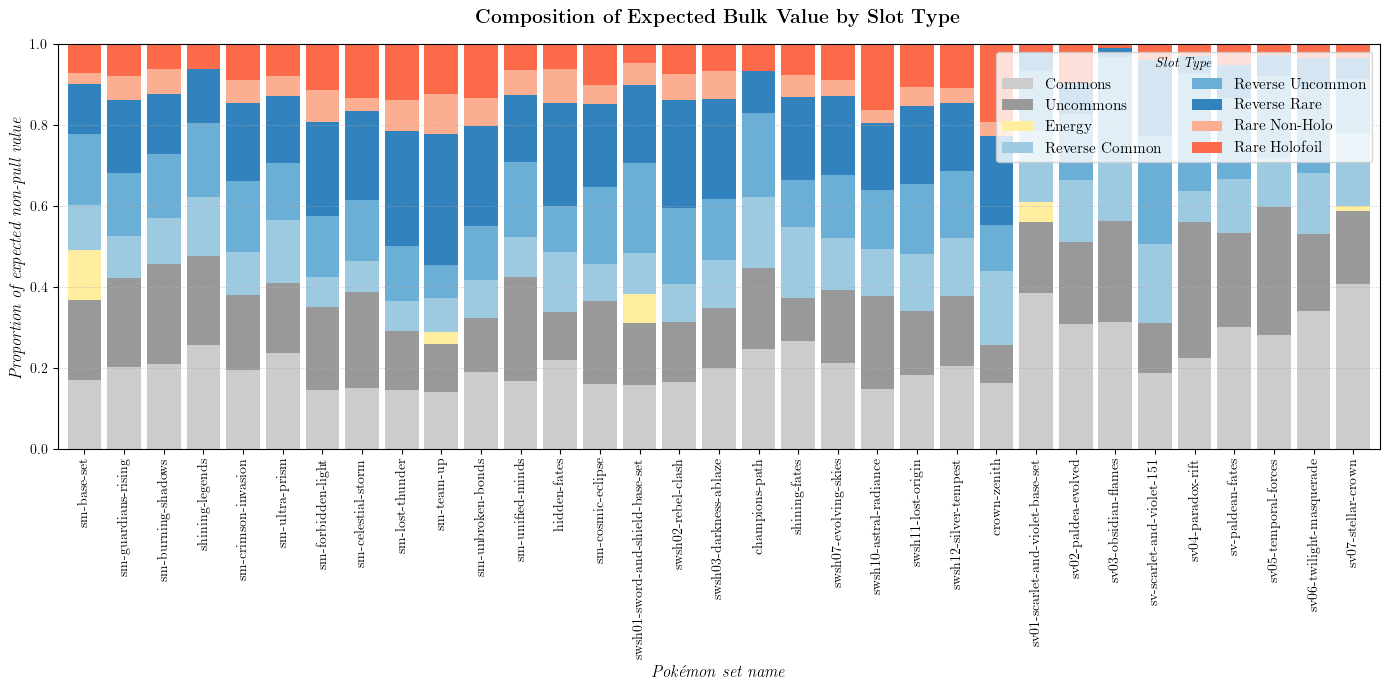

In [26]:
# Extract per-card-type contribution columns from your EV dataframe
cols = [
    'contribution_common', 'contribution_uncommon', 'contribution_energy',
    'contribution_rare_non_holo', 'contribution_holo_rare',
    'contribution_reverse_common', 'contribution_reverse_uncommon', 'contribution_reverse_rare'
]

# Ensure all columns are present
df_slot = booster_pack_values_detailed_final2[['set_name_grouped'] + cols].copy()
df_slot.set_index('set_name_grouped', inplace=True)

# Multiply each slot by its frequency per pack (based on SV or pre-SV rules)
def adjust_slots(row):
    is_sv = row.get('is_sv_era', False)
    return pd.Series({
        'Commons': 4 * row['contribution_common'] if is_sv else 5 * row['contribution_common'],
        'Uncommons': 3 * row['contribution_uncommon'],
        'Energy': row['contribution_energy'],
        'Reverse Common': 1 * row['contribution_reverse_common'] if not is_sv else 2 * row['contribution_reverse_common'],
        'Reverse Uncommon': 1 * row['contribution_reverse_uncommon'] if not is_sv else 2 * row['contribution_reverse_uncommon'],
        'Reverse Rare': 1 * row['contribution_reverse_rare'] if not is_sv else 2 * row['contribution_reverse_rare'],
        'Rare Non-Holo': row['contribution_rare_non_holo'],
        'Rare Holofoil': row['contribution_holo_rare']
    })

df_plot = df_slot.apply(adjust_slots, axis=1)

# Normalize per set (row-wise)
df_normalized = df_plot.div(df_plot.sum(axis=1), axis=0)

# Get sorted index based on original EV dataframe
# Make sure release_date is datetime
booster_pack_values_detailed_final2['release_date'] = pd.to_datetime(booster_pack_values_detailed_final2['release_date'])

# Sort by release date
sorted_index = booster_pack_values_detailed_final2.sort_values(by='release_date')['set_name_grouped']

df_normalized = df_normalized.loc[sorted_index]

# Define soft color palette
colors = [
    '#cccccc',  # Commons
    '#999999',  # Uncommons
    '#ffeda0',  # Energy
    '#9ecae1',  # RH Common
    '#6baed6',  # RH Uncommon
    '#3182bd',  # RH Rare
    '#fcae91',  # Rare Non-Holo
    '#fb6a4a',  # Rare Holofoil
]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
df_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.85)

ax.set_title(r'\textbf{Composition of Expected Bulk Value by Slot Type}', pad=15)
ax.set_ylabel(r'\textit{Proportion of expected non-pull value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.set_ylim(0, 1)
ax.legend(title=r'\textit{Slot Type}', loc='upper right', ncol=2)
ax.grid(axis='y', linestyle=':', linewidth=0.5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
df_normalized

Commons  Uncommons    Energy  \
set_name_grouped                                                  
sm-base-set                       0.170613   0.198907  0.121554   
sm-guardians-rising               0.202088   0.219939  0.000000   
sm-burning-shadows                0.210688   0.246965  0.000000   
shining-legends                   0.257857   0.218267  0.000000   
sm-crimson-invasion               0.196759   0.183415  0.000000   
sm-ultra-prism                    0.236727   0.173233  0.000000   
sm-forbidden-light                0.146268   0.204976  0.000000   
sm-celestial-storm                0.151054   0.236541  0.000000   
sm-lost-thunder                   0.146918   0.144431  0.000000   
sm-team-up                        0.142200   0.117998  0.030445   
sm-unbroken-bonds                 0.191725   0.133369  0.000000   
sm-unified-minds                  0.167557   0.258516  0.000000   
hidden-fates                      0.220135   0.119753  0.000000   
sm-cosmic-eclipse                 0.160870   0.204348  0.000000   
swsh01-sword-and-shield-base-set  0.158371   0.152646  0.071290   
swsh02-rebel-clash                0.165369   0.148969  0.000000   
swsh03-darkness-ablaze            0.199348   0.148510  0.000000   
champions-path                    0.246725   0.200437  0.000000   
shining-fates                     0.266134   0.107784  0.000000   
swsh07-evolving-skies             0.212006   0.180086  0.000000   
swsh10-astral-radiance            0.149435   0.229086  0.000000   
swsh11-lost-origin                0.183218   0.159320  0.000000   
swsh12-silver-tempest             0.206130   0.173149  0.000000   
crown-zenith                      0.163488   0.094320  0.000000   
sv01-scarlet-and-violet-base-set  0.385265   0.176377  0.049082   
sv02-paldea-evolved               0.308976   0.201640  0.000000   
sv03-obsidian-flames              0.314872   0.249407  0.000000   
sv-scarlet-and-violet-151         0.188271   0.123773  0.000000   
sv04-paradox-rift                 0.226292   0.333703  0.000000   
sv-paldean-fates                  0.300975   0.233997  0.000000   
sv05-temporal-forces              0.281023   0.317284  0.000000   
sv06-twilight-masquerade          0.341210   0.191475  0.000000   
sv07-stellar-crown                0.406900   0.182513  0.010535   

                                  Reverse Common  Reverse Uncommon  \
set_name_grouped                                                     
sm-base-set                             0.111111          0.176563   
sm-guardians-rising                     0.105086          0.154485   
sm-burning-shadows                      0.113018          0.157667   
shining-legends                         0.147248          0.182844   
sm-crimson-invasion                     0.105937          0.176607   
sm-ultra-prism                          0.157086          0.139323   
sm-forbidden-light                      0.075050          0.150101   
sm-celestial-storm                      0.077685          0.149007   
sm-lost-thunder                         0.075608          0.134660   
sm-team-up                              0.083998          0.080306   
sm-unbroken-bonds                       0.091996          0.133640   
sm-unified-minds                        0.098601          0.184128   
hidden-fates                            0.148224          0.113590   
sm-cosmic-eclipse                       0.092919          0.190228   
swsh01-sword-and-shield-base-set        0.101948          0.222828   
swsh02-rebel-clash                      0.093449          0.187265   
swsh03-darkness-ablaze                  0.118275          0.152216   
champions-path                          0.174672          0.208734   
shining-fates                           0.174983          0.117099   
swsh07-evolving-skies                   0.129347          0.155550   
swsh10-astral-radiance                  0.115973          0.146861   
swsh11-lost-origin                      0.139848          0.172951   
swsh12-si

In [52]:
# expected value from bulk vs pulls - normalised chart:

'''
df = booster_pack_values_detailed_final.copy()

# Total formula EV 
df['total_ev'] = df['expected_value_formula']
df['pull_proportion'] = df['pull_rate_value'] / df['total_ev']
df['bulk_proportion'] = 1 - df['pull_proportion']

# Create proportion DataFrame
proportion_df = df[['set_name_grouped', 'pull_proportion', 'bulk_proportion']].set_index('set_name_grouped')
proportion_df = proportion_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

proportion_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)

ax.set_title(r'\textbf{Proportion of Expected Value from Pulls vs. Bulk}', pad=15)
ax.set_ylabel(r'\textit{Share of Expected Value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
'''

"\ndf = booster_pack_values_detailed_final.copy()\n\n# Total formula EV \ndf['total_ev'] = df['expected_value_formula']\ndf['pull_proportion'] = df['pull_rate_value'] / df['total_ev']\ndf['bulk_proportion'] = 1 - df['pull_proportion']\n\n# Create proportion DataFrame\nproportion_df = df[['set_name_grouped', 'pull_proportion', 'bulk_proportion']].set_index('set_name_grouped')\nproportion_df = proportion_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]\n\n# Plot\nfig, ax = plt.subplots(figsize=(14, 7))\n\nproportion_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)\n\nax.set_title(r'\textbf{Proportion of Expected Value from Pulls vs. Bulk}', pad=15)\nax.set_ylabel(r'\textit{Share of Expected Value}')\nax.set_xlabel(r'\textit{Pok'emon set name}')\nax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')\nax.grid(axis='y', linestyle=':', linewidth=0.5)\nplt.xticks(rotation=90)\nplt.tight_lay

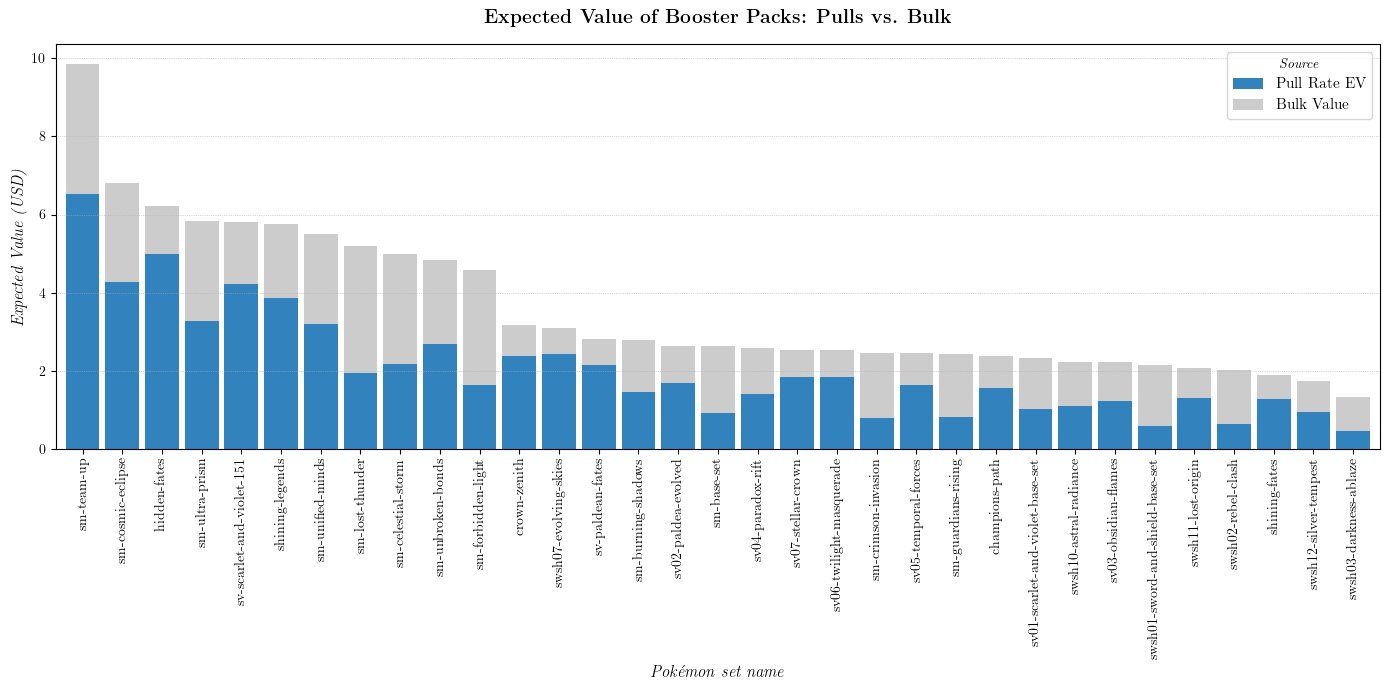

In [28]:
# Create value DataFrame

df = booster_pack_values_detailed_final2.copy()
value_df = df[['set_name_grouped', 'pull_rate_value', 'bulk_value_formula']].set_index('set_name_grouped')
value_df = value_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

value_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)

ax.set_title(r'\textbf{Expected Value of Booster Packs: Pulls vs. Bulk}', pad=15)
ax.set_ylabel(r'\textit{Expected Value (USD)}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## now check the variability of total pull rates probability for the sets:

In [59]:
# Group by set and sum the pull probabilities
pull_prob_summary = (
    filtered_df[filtered_df['precise_pull'].notna()]
    .groupby('set_name_grouped')['precise_pull']
    .sum()
    .reset_index()
    .rename(columns={'precise_pull': 'total_pull_probability'})
)

# Subtract 1 from each set to remove code card effect
pull_prob_summary['total_pull_probability'] = pull_prob_summary['total_pull_probability'] - 1

# Optional: sort by release date if you already merged that
if 'release_date' in booster_pack_values_detailed_final2.columns:
    pull_prob_summary = pull_prob_summary.merge(
        booster_pack_values_detailed_final2[['set_name_grouped', 'release_date']],
        on='set_name_grouped',
        how='left'
    ).sort_values('release_date')


pull_prob_summary = pull_prob_summary.rename(columns={'set_name_grouped': 'set_name'})



cross_section_original_df = pd.read_excel('cross_section_final.xlsx')


merged_df = pull_prob_summary.merge(cross_section_original_df, on='set_name', how='left')
merged_df


set_name  total_pull_probability release_date_x  \
0                        sm-base-set                  0.1765     2017-02-03   
1                sm-guardians-rising                  0.1680     2017-05-05   
2                 sm-burning-shadows                  0.1742     2017-08-04   
3                    shining-legends                  0.2695     2017-10-06   
4                sm-crimson-invasion                  0.1497     2017-11-03   
5                     sm-ultra-prism                  0.2329     2018-02-02   
6                 sm-forbidden-light                  0.2096     2018-05-04   
7                 sm-celestial-storm                  0.2169     2018-08-03   
8                    sm-lost-thunder                  0.2920     2018-11-02   
9                         sm-team-up                  0.2179     2019-02-01   
10                 sm-unbroken-bonds                  0.1628     2019-05-03   
11                  sm-unified-minds                  0.1942     2019-08-02   
12                      hidden-fates                  0.5481     2019-08-23   
13                 sm-cosmic-eclipse                  0.2810     2019-11-01   
14  swsh01-sword-and-shield-base-set                  0.2207     2020-02-07   
15                swsh02-rebel-clash                  0.2226     2020-05-01   
16            swsh03-darkness-ablaze                  0.2235     2020-08-14   
17                    champions-path                  0.2756     2020-09-25   
18                     shining-fates                  0.5907     2021-02-19   
19             swsh07-evolving-skies                  0.2209     2021-08-27   
20            swsh10-astral-radiance                  0.3481     2022-05-27   
21                swsh11-lost-origin                  0.3431     2022-09-09   
22             swsh12-silver-tempest                  0.3341     2022-11-11   
23                      crown-zenith                  0.5645     2023-01-20   
24  sv01-scarlet-and-violet-base-set                  0.3300     2023-03-31   
25               sv02-paldea-evolved                  0.3299     2023-06-09   
26              sv03-obsidian-flames                  0.3289     2023-08-11   
27         sv-scarlet-and-violet-151                  0.3327     2023-09-22   
28                 sv04-paradox-rift                  0.3324     2023-11-03   
29                  sv-paldean-fates                  0.6621     2024-01-26   
30              sv05-temporal-forces                  0.3811     2024-03-22   
31          sv06-twilight-masquerade                  0.3818     2024-05-24   
32                sv07-stellar-crown                  0.3822     2024-09-13   

                        product_name  booster_price  expected_value  \
0            Sun & Moon Booster Pack           6.45        3.150060   
1      Guardians Rising Booster Pack          10.39        3.433556   
2       Burning Shadows Booster Pack           9.68        3.524877   
3       Shining Legends Booster Pack          30.44        6.988347   
4      Crimson Invasion Booster Pack           6.42        3.673729   
5           Ultra Prism Booster Pack          18.33        7.587501   
6       Forbidden Light Booster Pack          15.49        6.922504   
7       Celestial Storm Booster Pack          18.29        6.941998   
8          Lost Thunder Booster Pack          14.96        8.315090   
9               Team Up Booster Pack          53.27       12.365701   
10       Unbroken Bonds Booster Pack          18.36        6.673253   
11        Unified Minds Booster Pack          18.69        7.051222   
12         Hidden Fates Booster Pack          19.96        7.267429   
13       Cosmic Eclipse Booster Pack          19.53        8.871870   
14       Sword & Shield Booster Pack           4.48        2.983361   
15          Rebel Clash Booster Pack           4.24        3.418704   
16      Darkness Ablaze Booster Pack           3.61        2.088103   
17      Champion's Path Booster Pack           8.56        2.98

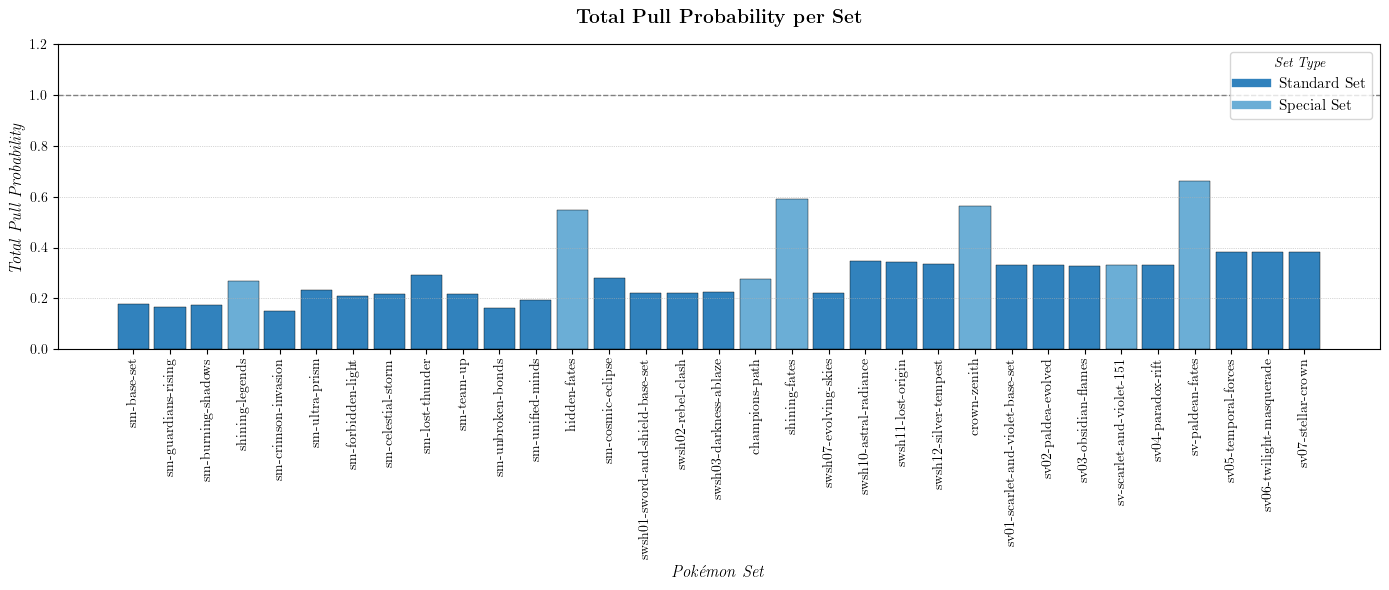

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# LaTeX-friendly style
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Make sure your DataFrame has 'is_special_set' and is sorted by release
df = merged_df.copy()
df = df.sort_values('release_date_x')

# Create colors (slightly different for special sets)
colors = df['is_special_set'].map(lambda x: '#6baed6' if x == 1 else '#3182bd')  # lighter blue for special sets

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(
    df['set_name'],
    df['total_pull_probability'],
    color=colors,
    width=0.85,
    edgecolor='black',
    linewidth=0.3
)

# Title and labels
ax.set_title(r'\textbf{Total Pull Probability per Set}', pad=15)
ax.set_ylabel(r'\textit{Total Pull Probability}')
ax.set_xlabel(r'\textit{Pok\'emon Set}')
ax.set_ylim(0, 1.2)
ax.axhline(1, color='gray', linestyle='--', linewidth=1, label=r'\textit{Max Probability = 1}')
ax.legend(handles=[
    plt.Line2D([0], [0], color='#3182bd', lw=6, label='Standard Set'),
    plt.Line2D([0], [0], color='#6baed6', lw=6, label='Special Set')
], loc='upper right', title=r'\textit{Set Type}')

# Grid and layout
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



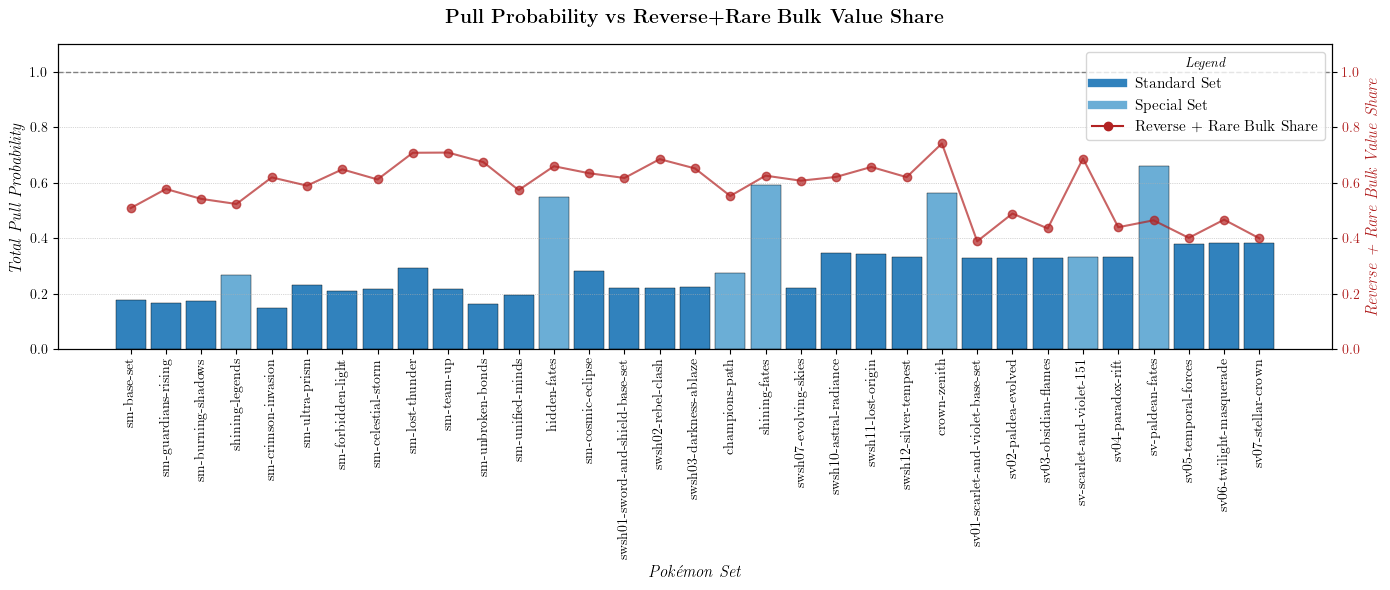

In [60]:
# STEP 1: Compute reverse + rare contributions
reverse_plus_rare = (
    df_normalized[['Reverse Common', 'Reverse Uncommon', 'Reverse Rare',
                   'Rare Non-Holo', 'Rare Holofoil']].sum(axis=1)
)

# STEP 2: Make sure it's a column in your main plotting df (merged_df)
merged_df = merged_df.set_index('set_name')
merged_df['reverse_plus_rare_share'] = reverse_plus_rare
merged_df = merged_df.reset_index()

# Sort again if needed
merged_df = merged_df.sort_values('release_date_x')


fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary y-axis: Bar chart for total pull probability
colors = merged_df['is_special_set'].map(lambda x: '#6baed6' if x == 1 else '#3182bd')
bars = ax1.bar(
    merged_df['set_name'],
    merged_df['total_pull_probability'],
    color=colors,
    width=0.85,
    edgecolor='black',
    linewidth=0.3
)

# X-axis positioning
x = range(len(df))
x_labels = df['set_name']

# Primary axis settings
ax1.set_ylabel(r'\textit{Total Pull Probability}', color='black')
ax1.set_xlabel(r'\textit{Pok\'emon Set}')
ax1.set_ylim(0, 1.1)
ax1.axhline(1, color='gray', linestyle='--', linewidth=1, label=r'\textit{Max Probability = 1}')
ax1.tick_params(axis='y', labelcolor='black')


# Secondary y-axis: Line chart for reverse + rare bulk share
ax2 = ax1.twinx()
ax2.plot(
    merged_df['set_name'],
    merged_df['reverse_plus_rare_share'],
    color='firebrick',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    alpha=0.7,
    label=r'\textit{Reverse + Rare Bulk Share}'
)
ax2.set_ylabel(r'\textit{Reverse + Rare Bulk Value Share}', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')
ax2.set_ylim(0, 1.1)

# Title
ax1.set_title(r'\textbf{Pull Probability vs Reverse+Rare Bulk Value Share}', pad=15)

# Legend
lines1 = [
    plt.Line2D([0], [0], color='#3182bd', lw=6, label='Standard Set'),
    plt.Line2D([0], [0], color='#6baed6', lw=6, label='Special Set')
]
lines2 = [
    plt.Line2D([0], [0], color='firebrick', marker='o', label='Reverse + Rare Bulk Share', linestyle='-')
]
ax2.legend(handles=lines1 + lines2, loc='upper right', title=r'\textit{Legend}')


# X-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=90)

# Grid, ticks, layout
ax1.grid(axis='y', linestyle=':', linewidth=0.5)


plt.tight_layout()
plt.show()


Pearson correlation: -0.1332 (p = 4.5983e-01)
Spearman correlation: -0.1096 (p = 5.4365e-01)


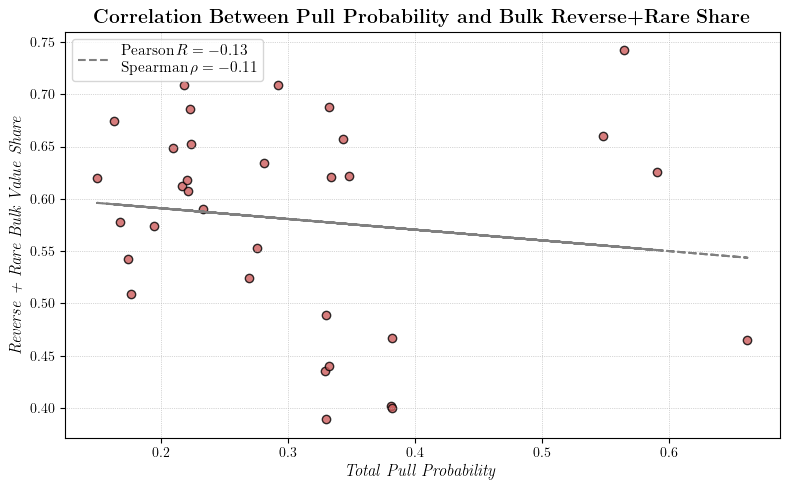

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Extract data
x = merged_df['total_pull_probability']
y = merged_df['reverse_plus_rare_share']

# Pearson correlation
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman correlation
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.4f} (p = {pearson_p:.4e})")
print(f"Spearman correlation: {spearman_corr:.4f} (p = {spearman_p:.4e})")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='indianred', edgecolor='black', alpha=0.8)
plt.title(r'\textbf{Correlation Between Pull Probability and Bulk Reverse+Rare Share}')
plt.xlabel(r'\textit{Total Pull Probability}')
plt.ylabel(r'\textit{Reverse + Rare Bulk Value Share}')
plt.grid(True, linestyle=':', linewidth=0.5)

# Regression line (based on Pearson correlation / linear fit)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='gray', linestyle='--',
         label=fr'$\mathrm{{Pearson}}\, R = {pearson_corr:.2f}$' + '\n' +
               fr'$\mathrm{{Spearman}}\, \rho = {spearman_corr:.2f}$')

plt.legend()
plt.tight_layout()
plt.show()


Correlation Results:
All Sets:     Pearson R = -0.1332 (p = 4.5983e-01), Spearman ρ = -0.1096 (p = 5.4365e-01)
Standard Sets: Pearson R = -0.5326 (p = 5.0964e-03), Spearman ρ = -0.3231 (p = 1.0743e-01)
Special Sets:  Pearson R = 0.0832 (p = 8.5917e-01), Spearman ρ = 0.0000 (p = 1.0000e+00)


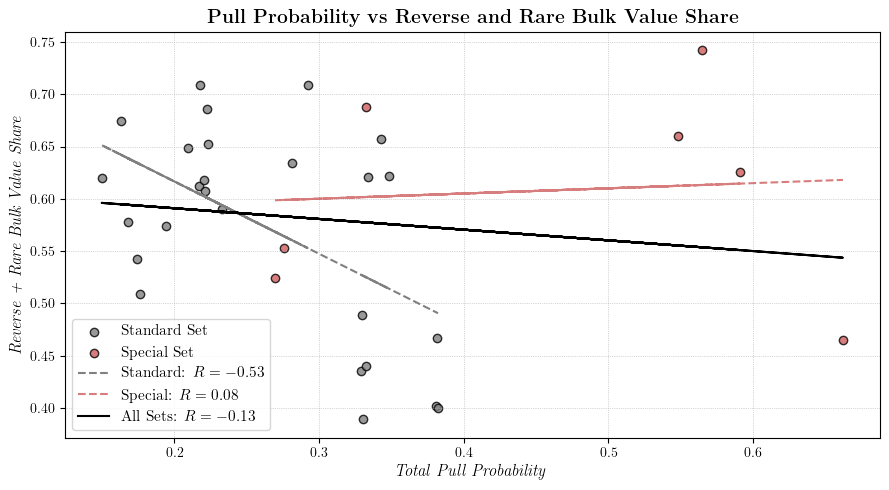

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Separate into standard and special sets
standard = merged_df[merged_df['is_special_set'] == 0]
special = merged_df[merged_df['is_special_set'] == 1]

# Extract combined data
x_all = merged_df['total_pull_probability']
y_all = merged_df['reverse_plus_rare_share']

# Pearson and Spearman correlations
pearson_all, p_all = pearsonr(x_all, y_all)
spearman_all, sp_all = spearmanr(x_all, y_all)

pearson_std, p_std = pearsonr(standard['total_pull_probability'], standard['reverse_plus_rare_share'])
spearman_std, sp_std = spearmanr(standard['total_pull_probability'], standard['reverse_plus_rare_share'])

pearson_spec, p_spec = pearsonr(special['total_pull_probability'], special['reverse_plus_rare_share'])
spearman_spec, sp_spec = spearmanr(special['total_pull_probability'], special['reverse_plus_rare_share'])

# ---- PRINT RESULTS ----
print("Correlation Results:")
print(f"All Sets:     Pearson R = {pearson_all:.4f} (p = {p_all:.4e}), Spearman ρ = {spearman_all:.4f} (p = {sp_all:.4e})")
print(f"Standard Sets: Pearson R = {pearson_std:.4f} (p = {p_std:.4e}), Spearman ρ = {spearman_std:.4f} (p = {sp_std:.4e})")
print(f"Special Sets:  Pearson R = {pearson_spec:.4f} (p = {p_spec:.4e}), Spearman ρ = {spearman_spec:.4f} (p = {sp_spec:.4e})")

# ---- PLOT ----
plt.figure(figsize=(9, 5))

# Scatter plot – red for standard, blue for special
plt.scatter(standard['total_pull_probability'], standard['reverse_plus_rare_share'],
            color='gray', edgecolor='black', alpha=0.8, label='Standard Set')
plt.scatter(special['total_pull_probability'], special['reverse_plus_rare_share'],
            color='indianred', edgecolor='black', alpha=0.8, label='Special Set')

# Regression line – standard sets
m_std, b_std = np.polyfit(standard['total_pull_probability'], standard['reverse_plus_rare_share'], 1)
plt.plot(standard['total_pull_probability'],
         m_std * standard['total_pull_probability'] + b_std,
         color='gray', linestyle='--',
         label=fr'Standard: $R={pearson_std:.2f}$')

# Regression line – special sets
m_spec, b_spec = np.polyfit(special['total_pull_probability'], special['reverse_plus_rare_share'], 1)
plt.plot(special['total_pull_probability'],
         m_spec * special['total_pull_probability'] + b_spec,
         color='indianred', linestyle='--',
         alpha=0.8,
         label=fr'Special: $R={pearson_spec:.2f}$')

# Regression line – all sets
m_all, b_all = np.polyfit(x_all, y_all, 1)
plt.plot(x_all, m_all * x_all + b_all, color='black', linestyle='-', linewidth=1.5,
         label=fr'All Sets: $R={pearson_all:.2f}$')

# Aesthetics
plt.title(r'\textbf{Pull Probability vs Reverse and Rare Bulk Value Share}')
plt.xlabel(r'\textit{Total Pull Probability}')
plt.ylabel(r'\textit{Reverse + Rare Bulk Value Share}')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#### regression as a final check:

In [34]:
import statsmodels.api as sm

# Prepare the data
df_reg = merged_df[['reverse_plus_rare_share', 'total_pull_probability', 'is_special_set']].dropna()

# Define dependent and independent variables
X = df_reg[['total_pull_probability', 'is_special_set']]
X = sm.add_constant(X)  # adds intercept (constant term)
y = df_reg['reverse_plus_rare_share']

# Fit the model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     reverse_plus_rare_share   R-squared:                       0.113
Model:                                 OLS   Adj. R-squared:                  0.053
Method:                      Least Squares   F-statistic:                     1.904
Date:                     Sun, 06 Apr 2025   Prob (F-statistic):              0.167
Time:                             11:51:17   Log-Likelihood:                 32.021
No. Observations:                       33   AIC:                            -58.04
Df Residuals:                           30   BIC:                            -53.55
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [36]:
df_reg['interaction'] = df_reg['total_pull_probability'] * df_reg['is_special_set']
X = df_reg[['total_pull_probability', 'is_special_set', 'interaction']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.display import display, Latex

stargazer = Stargazer([model])
print(stargazer.render_latex())



                               OLS Regression Results                              
Dep. Variable:     reverse_plus_rare_share   R-squared:                       0.248
Model:                                 OLS   Adj. R-squared:                  0.171
Method:                      Least Squares   F-statistic:                     3.194
Date:                     Sun, 06 Apr 2025   Prob (F-statistic):             0.0381
Time:                             11:51:59   Log-Likelihood:                 34.760
No. Observations:                       33   AIC:                            -61.52
Df Residuals:                           29   BIC:                            -55.53
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### final analysis  
(including the correct set_age, and selected figures and models)

In [37]:
!pip install statsmodels

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
cross_section_final1 = pd.read_excel('cross_section_final.xlsx')


### Correct the set_age:

#### use the reference_date when the data was scraped (both cards and booster prices):

(! using 365.25 to account for leap years!)

In [57]:
import pandas as pd
from datetime import datetime


# Convert 'release_date' to datetime format
cross_section_final1["release_date"] = pd.to_datetime(cross_section_final1["release_date"], errors="coerce")


# Set the dataset creation date (October 7, 2024)
reference_date = pd.to_datetime("07.10.2024", dayfirst=True)
print(reference_date)

# Calculate age of the set in years
cross_section_final1["set_age"] = (reference_date - cross_section_final1["release_date"]).dt.days / 365.25  # Convert days to years

cross_section_final1 = cross_section_final1.rename(columns={'expected_value': 'expected_value_original'})


cross_section_final1

2024-10-07 00:00:00


product_name  booster_price  \
0       Champion's Path Booster Pack           8.56   
1          Crown Zenith Booster Pack           3.98   
2          Hidden Fates Booster Pack          19.96   
3         Shining Fates Booster Pack           4.88   
4       Shining Legends Booster Pack          30.44   
5            Sun & Moon Booster Pack           6.45   
6       Burning Shadows Booster Pack           9.68   
7       Celestial Storm Booster Pack          18.29   
8        Cosmic Eclipse Booster Pack          19.53   
9      Crimson Invasion Booster Pack           6.42   
10      Forbidden Light Booster Pack          15.49   
11     Guardians Rising Booster Pack          10.39   
12         Lost Thunder Booster Pack          14.96   
13              Team Up Booster Pack          53.27   
14          Ultra Prism Booster Pack          18.33   
15       Unbroken Bonds Booster Pack          18.36   
16        Unified Minds Booster Pack          18.69   
17        Paldean Fates Booster Pack           4.63   
18                  151 Booster Pack           7.17   
19     Scarlet & Violet Booster Pack           2.80   
20       Paldea Evolved Booster Pack           3.53   
21      Obsidian Flames Booster Pack           3.28   
22         Paradox Rift Booster Pack           2.99   
23      Temporal Forces Booster Pack           2.96   
24  Twilight Masquerade Booster Pack           3.54   
25        Stellar Crown Booster Pack           3.17   
26       Sword & Shield Booster Pack           4.48   
27          Rebel Clash Booster Pack           4.24   
28      Darkness Ablaze Booster Pack           3.61   
29       Evolving Skies Booster Pack          14.16   
30      Astral Radiance Booster Pack           3.75   
31          Lost Origin Booster Pack           4.74   
32       Silver Tempest Booster Pack           3.19   

                            set_name  expected_value_original  \
0                     champions-path                 2.987305   
1                       crown-zenith                 4.064795   
2                       hidden-fates                 7.267429   
3                      shining-fates                 2.439886   
4                    shining-legends                 6.988347   
5                        sm-base-set                 3.150060   
6                 sm-burning-shadows                 3.524877   
7                 sm-celestial-storm                 6.941998   
8                  sm-cosmic-eclipse                 8.871870   
9                sm-crimson-invasion                 3.673729   
10                sm-forbidden-light                 6.922504   
11               sm-guardians-rising                 3.433556   
12                   sm-lost-thunder                 8.315090   
13                        sm-team-up                12.365701   
14                    sm-ultra-prism                 7.587501   
15                 sm-unbroken-bonds                 6.673253   
16                  sm-unified-minds                 7.051222   
17                  sv-paldean-fates                 3.031262   
18         sv-scarlet-and-violet-151                 7.002061   
19  sv01-scarlet-and-violet-base-set                 2.423782   
20               sv02-paldea-evolved                 2.949948   
21              sv03-obsidian-flames                 2.620933   
22                 sv04-paradox-rift                 2.912214   
23              sv05-temporal-forces                 2.648177   
24          sv06-twilight-masquerade                 2.771828   
25                sv07-stellar-crown                 2.649019   
26  swsh01-sword-and-shield-base-set                 2.983361   
27                swsh02-rebel-clash                 3.418704   
28            swsh03-darkness-ablaze                 2.088103   
29             swsh07-evolving-skies                 3.566549   
30            swsh10-astral-radiance                 3.059803   
31                swsh11-lost-origin                 2.722884   
32      

### now, merge with the correct dataframes (from the  correct EV calculation analysis above) so far:

In [61]:
merged_df ## no no, new dataframe needs to be created including the decomposition of the EV into pulls and bulk, and correct EV... and correct set_age!
merged_df1 = merged_df.copy()
merged_df1 = merged_df1.drop(columns=[
    'release_date_x', 'product_name', 'booster_price', 'expected_value',
    'avg_top_5_price', 'release_date_y', 'set_age', 'is_special_set',
    'reverse_plus_rare_share'
])
merged_df1

set_name  total_pull_probability
0                        sm-base-set                  0.1765
1                sm-guardians-rising                  0.1680
2                 sm-burning-shadows                  0.1742
3                    shining-legends                  0.2695
4                sm-crimson-invasion                  0.1497
5                     sm-ultra-prism                  0.2329
6                 sm-forbidden-light                  0.2096
7                 sm-celestial-storm                  0.2169
8                    sm-lost-thunder                  0.2920
9                         sm-team-up                  0.2179
10                 sm-unbroken-bonds                  0.1628
11                  sm-unified-minds                  0.1942
12                      hidden-fates                  0.5481
13                 sm-cosmic-eclipse                  0.2810
14  swsh01-sword-and-shield-base-set                  0.2207
15                swsh02-rebel-clash                  0.2226
16            swsh03-darkness-ablaze                  0.2235
17                    champions-path                  0.2756
18                     shining-fates                  0.5907
19             swsh07-evolving-skies                  0.2209
20            swsh10-astral-radiance                  0.3481
21                swsh11-lost-origin                  0.3431
22             swsh12-silver-tempest                  0.3341
23                      crown-zenith                  0.5645
24  sv01-scarlet-and-violet-base-set                  0.3300
25               sv02-paldea-evolved                  0.3299
26              sv03-obsidian-flames                  0.3289
27         sv-scarlet-and-violet-151                  0.3327
28                 sv04-paradox-rift                  0.3324
29                  sv-paldean-fates                  0.6621
30              sv05-temporal-forces                  0.3811
31          sv06-twilight-masquerade                  0.3818
32                sv07-stellar-crown                  0.3822

In [56]:
df1 = booster_pack_values_detailed_final2.copy()
value_df1 = df1[['set_name_grouped', 'pull_rate_value', 'bulk_value_formula']]
value_df1 = value_df1.rename(columns={'set_name_grouped': 'set_name'})
value_df1

set_name  pull_rate_value  bulk_value_formula
0                     champions-path         1.568787            0.827724
1                       crown-zenith         2.377514            0.800752
2                       hidden-fates         5.004036            1.204702
3                      shining-fates         1.271408            0.638562
4                    shining-legends         3.877514            1.889286
5                        sm-base-set         0.920801            1.721937
6                 sm-burning-shadows         1.464964            1.331298
7                 sm-celestial-storm         2.183239            2.812959
8                  sm-cosmic-eclipse         4.272906            2.533168
9                sm-crimson-invasion         0.798729            1.655115
10                sm-forbidden-light         1.637742            2.946583
11               sm-guardians-rising         0.822962            1.605556
12                   sm-lost-thunder         1.956756            3.246994
13                        sm-team-up         6.537083            3.325261
14                    sm-ultra-prism         3.282701            2.544017
15                 sm-unbroken-bonds         2.693139            2.143814
16                  sm-unified-minds         3.207344            2.300970
17                  sv-paldean-fates         2.152867            0.678278
18         sv-scarlet-and-violet-151         4.220034            1.586614
19  sv01-scarlet-and-violet-base-set         1.021721            1.321199
20               sv02-paldea-evolved         1.695300            0.950476
21              sv03-obsidian-flames         1.227183            0.998150
22                 sv04-paradox-rift         1.419312            1.180617
23              sv05-temporal-forces         1.648892            0.803832
24          sv06-twilight-masquerade         1.848699            0.684924
25                sv07-stellar-crown         1.835453            0.708657
26  swsh01-sword-and-shield-base-set         0.582499            1.572114
27                swsh02-rebel-clash         0.650717            1.371401
28            swsh03-darkness-ablaze         0.474232            0.854335
29             swsh07-evolving-skies         2.437003            0.650484
30            swsh10-astral-radiance         1.094938            1.143578
31                swsh11-lost-origin         1.320559            0.745032
32             swsh12-silver-tempest         0.953203            0.788506

### merge all three datasets and create new expected_value column:

In [66]:
# Step 1: Merge cross_section_final1 with merged_df
merged_all = pd.merge(cross_section_final1, merged_df1, on='set_name', how='inner')

# Step 2: Merge the result with value_df1
merged_dataset = pd.merge(merged_all, value_df1, on='set_name', how='inner')


merged_dataset = merged_dataset.rename(columns={'bulk_value_formula': 'bulk_value'})

merged_dataset['expected_value'] = merged_dataset['pull_rate_value'] + merged_dataset['bulk_value']



merged_dataset.to_excel('cross_section_final_CORRECT_with_original_EV.xlsx')

merged_dataset

product_name  booster_price  \
0       Champion's Path Booster Pack           8.56   
1          Crown Zenith Booster Pack           3.98   
2          Hidden Fates Booster Pack          19.96   
3         Shining Fates Booster Pack           4.88   
4       Shining Legends Booster Pack          30.44   
5            Sun & Moon Booster Pack           6.45   
6       Burning Shadows Booster Pack           9.68   
7       Celestial Storm Booster Pack          18.29   
8        Cosmic Eclipse Booster Pack          19.53   
9      Crimson Invasion Booster Pack           6.42   
10      Forbidden Light Booster Pack          15.49   
11     Guardians Rising Booster Pack          10.39   
12         Lost Thunder Booster Pack          14.96   
13              Team Up Booster Pack          53.27   
14          Ultra Prism Booster Pack          18.33   
15       Unbroken Bonds Booster Pack          18.36   
16        Unified Minds Booster Pack          18.69   
17        Paldean Fates Booster Pack           4.63   
18                  151 Booster Pack           7.17   
19     Scarlet & Violet Booster Pack           2.80   
20       Paldea Evolved Booster Pack           3.53   
21      Obsidian Flames Booster Pack           3.28   
22         Paradox Rift Booster Pack           2.99   
23      Temporal Forces Booster Pack           2.96   
24  Twilight Masquerade Booster Pack           3.54   
25        Stellar Crown Booster Pack           3.17   
26       Sword & Shield Booster Pack           4.48   
27          Rebel Clash Booster Pack           4.24   
28      Darkness Ablaze Booster Pack           3.61   
29       Evolving Skies Booster Pack          14.16   
30      Astral Radiance Booster Pack           3.75   
31          Lost Origin Booster Pack           4.74   
32       Silver Tempest Booster Pack           3.19   

                            set_name  expected_value_original  \
0                     champions-path                 2.987305   
1                       crown-zenith                 4.064795   
2                       hidden-fates                 7.267429   
3                      shining-fates                 2.439886   
4                    shining-legends                 6.988347   
5                        sm-base-set                 3.150060   
6                 sm-burning-shadows                 3.524877   
7                 sm-celestial-storm                 6.941998   
8                  sm-cosmic-eclipse                 8.871870   
9                sm-crimson-invasion                 3.673729   
10                sm-forbidden-light                 6.922504   
11               sm-guardians-rising                 3.433556   
12                   sm-lost-thunder                 8.315090   
13                        sm-team-up                12.365701   
14                    sm-ultra-prism                 7.587501   
15                 sm-unbroken-bonds                 6.673253   
16                  sm-unified-minds                 7.051222   
17                  sv-paldean-fates                 3.031262   
18         sv-scarlet-and-violet-151                 7.002061   
19  sv01-scarlet-and-violet-base-set                 2.423782   
20               sv02-paldea-evolved                 2.949948   
21              sv03-obsidian-flames                 2.620933   
22                 sv04-paradox-rift                 2.912214   
23              sv05-temporal-forces                 2.648177   
24          sv06-twilight-masquerade                 2.771828   
25                sv07-stellar-crown                 2.649019   
26  swsh01-sword-and-shield-base-set                 2.983361   
27                swsh02-rebel-clash                 3.418704   
28            swsh03-darkness-ablaze                 2.088103   
29             swsh07-evolving-skies                 3.566549   
30            swsh10-astral-radiance                 3.059803   
31                swsh11-lost-origin                 2.722884   
32      

### Save the FINAL DATASET used for the cross section analysis:

In [68]:
cross_section_final_correct = merged_dataset.drop(columns='expected_value_original')

cross_section_final_correct.to_excel('cross_section_final_correct.xlsx')

cross_section_final_correct


product_name  booster_price  \
0       Champion's Path Booster Pack           8.56   
1          Crown Zenith Booster Pack           3.98   
2          Hidden Fates Booster Pack          19.96   
3         Shining Fates Booster Pack           4.88   
4       Shining Legends Booster Pack          30.44   
5            Sun & Moon Booster Pack           6.45   
6       Burning Shadows Booster Pack           9.68   
7       Celestial Storm Booster Pack          18.29   
8        Cosmic Eclipse Booster Pack          19.53   
9      Crimson Invasion Booster Pack           6.42   
10      Forbidden Light Booster Pack          15.49   
11     Guardians Rising Booster Pack          10.39   
12         Lost Thunder Booster Pack          14.96   
13              Team Up Booster Pack          53.27   
14          Ultra Prism Booster Pack          18.33   
15       Unbroken Bonds Booster Pack          18.36   
16        Unified Minds Booster Pack          18.69   
17        Paldean Fates Booster Pack           4.63   
18                  151 Booster Pack           7.17   
19     Scarlet & Violet Booster Pack           2.80   
20       Paldea Evolved Booster Pack           3.53   
21      Obsidian Flames Booster Pack           3.28   
22         Paradox Rift Booster Pack           2.99   
23      Temporal Forces Booster Pack           2.96   
24  Twilight Masquerade Booster Pack           3.54   
25        Stellar Crown Booster Pack           3.17   
26       Sword & Shield Booster Pack           4.48   
27          Rebel Clash Booster Pack           4.24   
28      Darkness Ablaze Booster Pack           3.61   
29       Evolving Skies Booster Pack          14.16   
30      Astral Radiance Booster Pack           3.75   
31          Lost Origin Booster Pack           4.74   
32       Silver Tempest Booster Pack           3.19   

                            set_name  avg_top_5_price release_date   set_age  \
0                     champions-path           65.884   2020-09-25  4.032854   
1                       crown-zenith           59.564   2023-01-20  1.713895   
2                       hidden-fates          161.866   2019-08-23  5.125257   
3                      shining-fates           21.472   2021-02-19  3.630390   
4                    shining-legends           59.372   2017-10-06  7.003422   
5                        sm-base-set           34.336   2017-02-03  7.674196   
6                 sm-burning-shadows          118.276   2017-08-04  7.175907   
7                 sm-celestial-storm          100.690   2018-08-03  6.179329   
8                  sm-cosmic-eclipse          148.622   2019-11-01  4.933607   
9                sm-crimson-invasion           23.544   2017-11-03  6.926762   
10                sm-forbidden-light           42.276   2018-05-04  6.428474   
11               sm-guardians-rising           33.190   2017-05-05  7.425051   
12                   sm-lost-thunder           80.544   2018-11-02  5.930185   
13                        sm-team-up          344.944   2019-02-01  5.681040   
14                    sm-ultra-prism          161.272   2018-02-02  6.677618   
15                 sm-unbroken-bonds          125.244   2019-05-03  5.431896   
16                  sm-unified-minds          148.648   2019-08-02  5.182752   
17                  sv-paldean-fates           58.466   2024-01-26  0.698152   
18         sv-scarlet-and-violet-151           64.132   2023-09-22  1.043121   
19  sv01-scarlet-and-violet-base-set           17.874   2023-03-31  1.522245   
20               sv02-paldea-evolved           53.366   2023-06-09  1.330595   
21              sv03-obsidian-flames           19.674   2023-08-11  1.158111   
22                 sv04-paradox-rift           32.414   2023-11-03  0.928131   
23              sv05-temporal-forces           50.848   2024-03-22  0.544832   
24          sv06-twilight-masquerade          101.176   2024-05-24  0.372348   
25                sv07-stellar-crown           51.142   2024-09-13  0.065

## now check for the top5average variable:

In [102]:
filtered_df1 = filtered_df.copy()

filtered_df1

card_name  \
0      Code Card - Champion's Path Booster Pack   
1                                        Weedle   
2                                        Weedle   
3                                        Kakuna   
4                                        Kakuna   
...                                         ...   
11280                                    Worker   
11281                       Regenerative Energy   
11282                       Regenerative Energy   
11283                            V Guard Energy   
11284                            V Guard Energy   

                                               card_link  \
0      /product/251544/pokemon-champion-s-path-code-c...   
1         /product/222995/pokemon-champion-s-path-weedle   
2         /product/222995/pokemon-champion-s-path-weedle   
3         /product/222997/pokemon-champion-s-path-kakuna   
4         /product/222997/pokemon-champion-s-path-kakuna   
...                                                  ...   
11280  /product/451815/pokemon-swsh12-silver-tempest-...   
11281  /product/451816/pokemon-swsh12-silver-tempest-...   
11282  /product/451816/pokemon-swsh12-silver-tempest-...   
11283  /product/451817/pokemon-swsh12-silver-tempest-...   
11284  /product/451817/pokemon-swsh12-silver-tempest-...   

                                              image_link          printing  \
0      https://tcgplayer-cdn.tcgplayer.com/product/25...            Normal   
1      https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
2      https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
3      https://tcgplayer-cdn.tcgplayer.com/product/22...            Normal   
4      https://tcgplayer-cdn.tcgplayer.com/product/22...  Reverse Holofoil   
...                                                  ...               ...   
11280  https://tcgplayer-cdn.tcgplayer.com/product/45...  Reverse Holofoil   
11281  https://tcgplayer-cdn.tcgplayer.com/product/45...            Normal   
11282  https://tcgplayer-cdn.tcgplayer.com/product/45...  Reverse Holofoil   
11283  https://tcgplayer-cdn.tcgplayer.com/product/45...            Normal   
11284  https://tcgplayer-cdn.tcgplayer.com/product/45...  Reverse Holofoil   

       condition     rarity card_number  price               set_name  \
0      Near Mint  Code Card         NaN   0.06         champions-path   
1      Near Mint     Common       02/73   0.07         champions-path   
2      Near Mint     Common       02/73   0.22         champions-path   
3      Near Mint     Common       03/73   0.04         champions-path   
4      Near Mint     Common       03/73   0.17         champions-path   
...          ...        ...         ...    ...                    ...   
11280  Near Mint   Uncommon     167/195   0.26  swsh12-silver-tempest   
11281  Near Mint   Uncommon     168/195   0.09  swsh12-silver-tempest   
11282  Near Mint   Uncommon     168/195   0.10  swsh12-silver-tempest   
11283  Near Mint   Uncommon     169/195   0.09  swsh12-silver-tempest   
11284  Near Mint   Uncommon     169/195   0.31  swsh12-silver-tempest   

       imprecise_pull  precise_pull       set_name_grouped release_date  
0                 1.0           1.0         champions-path   2020-09-25  
1                 NaN           NaN         champions-path   2020-09-25  
2                 NaN           NaN         champions-path   2020-09-25  
3                 NaN           NaN         champions-path   2020-09-25  
4                 NaN           NaN         champions-path   2020-09-25  
...               ...           ...                    ...          ...  
11280             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11281             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11282             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11283             NaN           NaN  swsh12-silver-tempest   2022-11-11  
11284             NaN           NaN  swsh12-silver-tempest   2022-11-11  

[

#### just check the relationship between the pull probability of a card and its price:
##### (likely ommit completely...)

In [71]:
df_corr = filtered_df1[
    (filtered_df1['precise_pull'].notna()) &
    (filtered_df1['precise_pull'] != 1)
]

df_corr

card_name  \
63     Charizard VMAX (Secret)   
64       Drednaw VMAX (Secret)   
65     Gardevoir VMAX (Secret)   
66               Kabu (Secret)   
67              Piers (Secret)   
...                        ...   
11168   Gym Trainer (Full Art)   
11169         Lance (Full Art)   
11170        Serena (Full Art)   
11171       Wallace (Full Art)   
11172        Worker (Full Art)   

                                               card_link  \
63     /product/223073/pokemon-champion-s-path-chariz...   
64     /product/223074/pokemon-champion-s-path-dredna...   
65     /product/223075/pokemon-champion-s-path-gardev...   
66     /product/223076/pokemon-champion-s-path-kabu-s...   
67     /product/223077/pokemon-champion-s-path-piers-...   
...                                                  ...   
11168  /product/451839/pokemon-swsh12-silver-tempest-...   
11169  /product/451840/pokemon-swsh12-silver-tempest-...   
11170  /product/451841/pokemon-swsh12-silver-tempest-...   
11171  /product/451842/pokemon-swsh12-silver-tempest-...   
11172  /product/451843/pokemon-swsh12-silver-tempest-...   

                                              image_link  printing  condition  \
63     https://tcgplayer-cdn.tcgplayer.com/product/22...  Holofoil  Near Mint   
64     https://tcgplayer-cdn.tcgplayer.com/product/22...  Holofoil  Near Mint   
65     https://tcgplayer-cdn.tcgplayer.com/product/22...  Holofoil  Near Mint   
66     https://tcgplayer-cdn.tcgplayer.com/product/22...  Holofoil  Near Mint   
67     https://tcgplayer-cdn.tcgplayer.com/product/22...  Holofoil  Near Mint   
...                                                  ...       ...        ...   
11168  https://tcgplayer-cdn.tcgplayer.com/product/45...  Holofoil  Near Mint   
11169  https://tcgplayer-cdn.tcgplayer.com/product/45...  Holofoil  Near Mint   
11170  https://tcgplayer-cdn.tcgplayer.com/product/45...  Holofoil  Near Mint   
11171  https://tcgplayer-cdn.tcgplayer.com/product/45...  Holofoil  Near Mint   
11172  https://tcgplayer-cdn.tcgplayer.com/product/45...  Holofoil  Near Mint   

            rarity card_number   price               set_name  imprecise_pull  \
63     Secret Rare       74/73  151.29         champions-path             NaN   
64     Secret Rare       75/73    6.33         champions-path             NaN   
65     Secret Rare       76/73    7.16         champions-path             NaN   
66     Secret Rare       77/73    2.85         champions-path             NaN   
67     Secret Rare       78/73    2.95         champions-path             NaN   
...            ...         ...     ...                    ...             ...   
11168   Ultra Rare     191/195    0.93  swsh12-silver-tempest             NaN   
11169   Ultra Rare     192/195    2.50  swsh12-silver-tempest             NaN   
11170   Ultra Rare     193/195    7.88  swsh12-silver-tempest             NaN   
11171   Ultra Rare     194/195    4.18  swsh12-silver-tempest             NaN   
11172   Ultra Rare     195/195    1.25  swsh12-silver-tempest             NaN   

       precise_pull       set_name_grouped release_date  
63         0.003140         champions-path   2020-09-25  
64         0.003140         champions-path   2020-09-25  
65         0.003140         champions-path   2020-09-25  
66         0.003140         champions-path   2020-09-25  
67         0.003140         champions-path   2020-09-25  
...             ...                    ...          ...  
11168      0.001414  swsh12-silver-tempest   2022-11-11  
11169      0.001414  swsh12-silver-tempest   2022-11-11  
11170      0.001414  swsh12-silver-tempest   2022-11-11  
11171      0.001414  swsh12-silver-tempest   2022-11-11  
11172      0.001414  swsh12-silver-tempest   2022-11-11  

[2361 rows x 13 columns]

In [72]:
from scipy.stats import pearsonr, spearmanr

x = df_corr['precise_pull']
y = df_corr['price']

pearson_corr, pearson_p = pearsonr(x, y)
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.4f} (p = {pearson_p:.4e})")
print(f"Spearman correlation: {spearman_corr:.4f} (p = {spearman_p:.4e})")


Pearson correlation: -0.1565 (p = 2.0692e-14)
Spearman correlation: -0.5683 (p = 4.4497e-202)


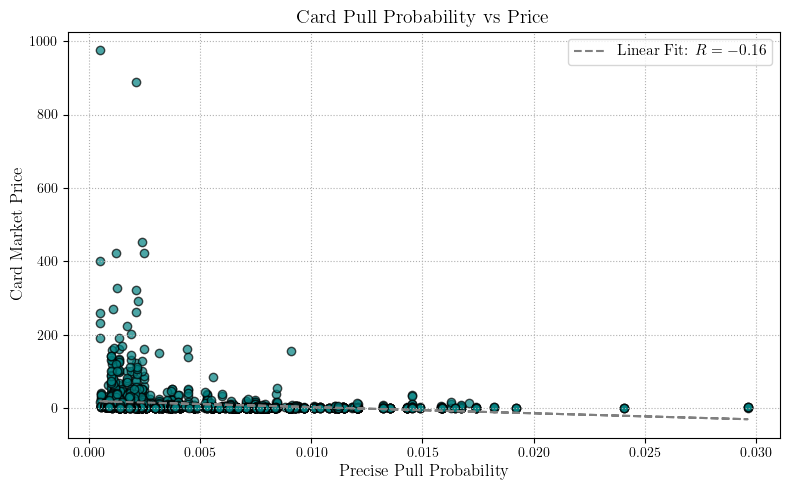

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='teal', edgecolor='black', alpha=0.7)
plt.title('Card Pull Probability vs Price')
plt.xlabel('Precise Pull Probability')
plt.ylabel('Card Market Price')
plt.grid(True, linestyle=':')

# Add regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='gray', linestyle='--', label=f'Linear Fit: $R={pearson_corr:.2f}$')
plt.legend()
plt.tight_layout()
plt.show()


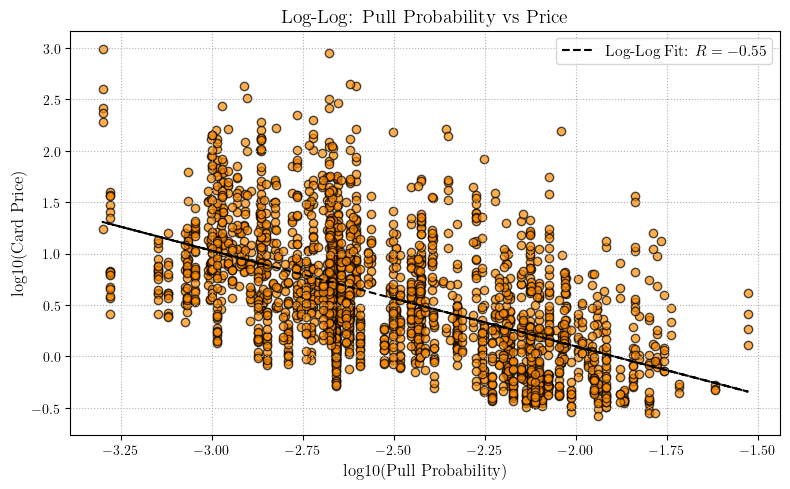

Log-Log Slope = -0.93, Intercept = -1.77


In [76]:
##log-log:

log_x = np.log10(x[x > 0])  # avoid log(0)
log_y = np.log10(y[x > 0])  # only take log of matching y

slope, intercept = np.polyfit(log_x, log_y, 1)
r_log, _ = pearsonr(log_x, log_y)

plt.figure(figsize=(8, 5))
plt.scatter(log_x, log_y, color='darkorange', edgecolor='black', alpha=0.7)
plt.plot(log_x, slope * log_x + intercept, '--', color='black', label=f'Log-Log Fit: $R={r_log:.2f}$')
plt.title('Log-Log: Pull Probability vs Price')
plt.xlabel('log10(Pull Probability)')
plt.ylabel('log10(Card Price)')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

print(f"Log-Log Slope = {slope:.2f}, Intercept = {intercept:.2f}")


In [ ]:
# regression of what determines the price of a card...:
# not working with precise pull - multicollinearity possibly with the rarities - not important - just for maybe interesting insights
import pandas as pd
import statsmodels.api as sm


# Step 0: Remove Code Cards from the dataset
df_model = filtered_df1[filtered_df1['rarity'] != 'Code Card'].copy()

# Step 2: Merge in set-level attributes
df_model = df_model.merge(
    cross_section_final_correct[['set_name', 'set_age', 'is_special_set']],
    on='set_name',
    how='left'
)

# Step 3: Keep valid observations
df_model = df_model[
    #df_model['precise_pull'].notna() &
    df_model['price'].notna() &
    df_model['rarity'].notna() &
    df_model['set_age'].notna() &
    df_model['is_special_set'].notna()
].copy()

# Step 4: Convert boolean column to int
df_model['is_special_set'] = df_model['is_special_set'].astype(int)


# Step 4: Create dummy variables for rarity (excluding Code Card)
df_model = df_model[df_model['rarity'] != 'Code Card']
df_model = pd.get_dummies(df_model, columns=['rarity'], drop_first=True)


# Step 5: Create dummy variables for rarity
#df_model = pd.get_dummies(df_model, columns=['rarity'], drop_first=True)

# Step 6: Define X and y
X_cols = [ 'set_age', 'is_special_set'] + [col for col in df_model.columns if col.startswith('rarity_')]
X = df_model[X_cols]
y = df_model['price']

# Step 7: Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Step 8: Convert any boolean columns in X to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Step 9: Combine X and y, drop any remaining NaNs
combined = pd.concat([X, y], axis=1).dropna()
X = combined[X.columns]
y = combined[y.name]

# Step 10: Debugging check
print("\nX dtypes:")
print(X.dtypes)
print("\ny dtype:")
print(y.dtypes)

# Step 11: Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Step 12: Show results
print(model.summary())



X dtypes:
set_age                             float64
is_special_set                        int64
rarity_Amazing Rare                   int64
rarity_Common                         int64
rarity_Double Rare                    int64
rarity_Holo Rare                      int64
rarity_Hyper Rare                     int64
rarity_Illustration Rare              int64
rarity_Prism Rare                     int64
rarity_Radiant Rare                   int64
rarity_Rare                           int64
rarity_Secret Rare                    int64
rarity_Shiny Holo Rare                int64
rarity_Shiny Rare                     int64
rarity_Shiny Ultra Rare               int64
rarity_Special Illustration Rare      int64
rarity_Ultra Rare                     int64
rarity_Uncommon                       int64
dtype: object

y dtype:
float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.096
Model: 

## ...now check if pull probability is correlated with pull rate EV... 

##### (likely ommit completely)

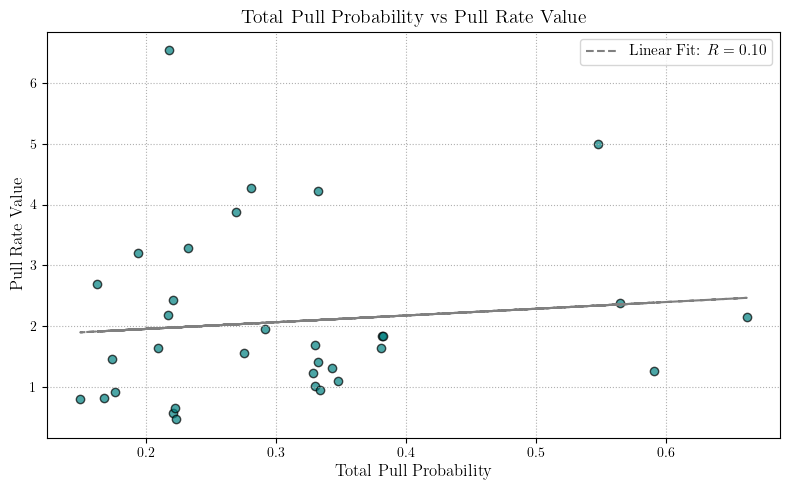

In [82]:
cross_section_final_correct

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Define your variables
x = cross_section_final_correct['total_pull_probability']
y = cross_section_final_correct['pull_rate_value']

# Calculate Pearson correlation and regression line
pearson_corr, _ = pearsonr(x, y)
m, b = np.polyfit(x, y, 1)

# Plot in your style
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='teal', edgecolor='black', alpha=0.7)
plt.title('Total Pull Probability vs Pull Rate Value')
plt.xlabel('Total Pull Probability')
plt.ylabel('Pull Rate Value')
plt.grid(True, linestyle=':')

# Regression line
plt.plot(x, m * x + b, color='gray', linestyle='--', label=f'Linear Fit: $R={pearson_corr:.2f}$')
plt.legend()
plt.tight_layout()
plt.show()



Log-Log Slope = 0.33, Intercept = 0.41


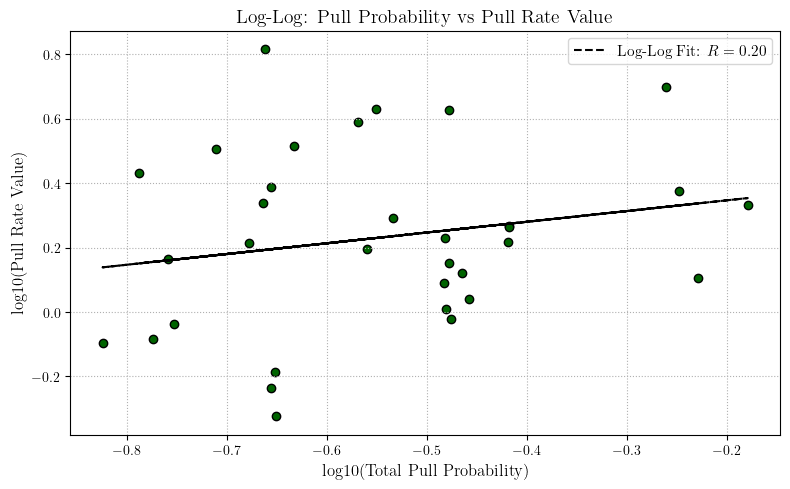

In [83]:
import numpy as np

# Only use positive values
log_x = np.log10(x[x > 0])
log_y = np.log10(y[x > 0])

slope, intercept = np.polyfit(log_x, log_y, 1)
print(f"Log-Log Slope = {slope:.2f}, Intercept = {intercept:.2f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(log_x, log_y, color='darkgreen', edgecolor='black')
plt.plot(log_x, slope * log_x + intercept, '--', color='black', label=f'Log-Log Fit: $R={pearsonr(log_x, log_y)[0]:.2f}$')
plt.xlabel('log10(Total Pull Probability)')
plt.ylabel('log10(Pull Rate Value)')
plt.title('Log-Log: Pull Probability vs Pull Rate Value')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## Now, definitely check the averagetop5price:

In [136]:
#cross_section_final_correct

In [137]:
filtered_df2 = filtered_df.copy()

import pandas as pd
import re

# Copy input dataset
df = filtered_df2.copy()

# Remove 'Code Card' entries (case-insensitive)
df_cleaned = df[~df['card_name'].str.lower().str.contains("code card")].copy()

# Define energy keywords and create pattern
energy_keywords = [
    'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Darkness Energy',
    'Grass Energy', 'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
]
energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

# Exclude energy cards only if their rarity is 'Common'
mask_energy_common = (
    df_cleaned['rarity'].str.lower().eq('common') &
    df_cleaned['card_name'].str.contains(energy_pattern, case=False, regex=True)
)
df_cleaned = df_cleaned[~mask_energy_common]

# Calculate Set Size (based on unique card_number per set_name_grouped)
set_size_df = df_cleaned.groupby('set_name_grouped')['card_number'].nunique().reset_index()
set_size_df.columns = ['set_name_grouped', 'set_size']

# Compute Top 1 to Top 10 average prices per set_name_grouped
top_avg_list = []

for n in range(1, 11):
    # Sort cards by price within each set and take top-n
    top_n = df_cleaned.sort_values(['set_name_grouped', 'price'], ascending=[True, False])
    top_n = top_n.groupby('set_name_grouped').head(n)

    # Compute average of top-n prices
    avg_price_n = top_n.groupby('set_name_grouped')['price'].mean().reset_index()
    avg_price_n.columns = ['set_name_grouped', f'avg_top_{n}_price']
    
    top_avg_list.append(avg_price_n)

# Merge all Top-N averages
top_avg_df = top_avg_list[0]
for i in range(1, 10):
    top_avg_df = top_avg_df.merge(top_avg_list[i], on='set_name_grouped')

# Merge with set size
set_metrics_df = top_avg_df.merge(set_size_df, on='set_name_grouped')

# Preview
set_metrics_df


set_name_grouped  avg_top_1_price  avg_top_2_price  \
0                     champions-path           161.69          156.490   
1                       crown-zenith            94.74           76.650   
2                       hidden-fates           422.52          291.845   
3                      shining-fates            83.59           45.710   
4                    shining-legends           155.22          102.975   
5                        sm-base-set            47.61           46.025   
6                 sm-burning-shadows           422.33          238.985   
7                 sm-celestial-storm           290.47          195.640   
8                  sm-cosmic-eclipse           191.70          175.890   
9                sm-crimson-invasion            34.65           34.020   
10                sm-forbidden-light            52.27           50.905   
11               sm-guardians-rising            62.77           47.440   
12                   sm-lost-thunder           159.62          114.950   
13                        sm-team-up           887.72          604.810   
14                    sm-ultra-prism           451.30          290.145   
15                 sm-unbroken-bonds           223.31          176.830   
16                  sm-unified-minds           200.90          182.690   
17                  sv-paldean-fates           106.24           99.055   
18         sv-scarlet-and-violet-151           139.57           96.000   
19  sv01-scarlet-and-violet-base-set            25.85           22.555   
20               sv02-paldea-evolved           112.35           84.820   
21              sv03-obsidian-flames            44.13           32.070   
22                 sv04-paradox-rift            51.82           49.585   
23              sv05-temporal-forces            71.06           63.120   
24          sv06-twilight-masquerade           271.15          176.790   
25                sv07-stellar-crown           113.16           76.805   
26  swsh01-sword-and-shield-base-set            40.52           36.050   
27                swsh02-rebel-clash            39.38           31.930   
28            swsh03-darkness-ablaze            22.58           15.845   
29             swsh07-evolving-skies           975.13          687.305   
30            swsh10-astral-radiance           120.80           86.665   
31                swsh11-lost-origin           326.95          213.475   
32             swsh12-silver-tempest           167.86           99.090   

    avg_top_3_price  avg_top_4_price  avg_top_5_price  avg_top_6_price  \
0        106.713333          81.6175           65.884        55.378333   
1         68.700000          63.2700           59.564        53.661667   
2        223.370000         187.6000          161.866       143.316667   
3         32.686667          25.7275           21.472        18.611667   
4         80.773333          68.5675           59.372        52.928333   
5         40.996667          37.3025           34.336        31.811667   
6        175.823333         140.1700          118.276       102.826667   
7        145.880000         118.0750          100.690        88.811667   
8        161.530000         154.0825          148.622       144.975000   
9         28.740000          25.6975           23.544        21.896667   
10        47.923333          44.9275           42.276        40.503333   
11        40.863333          36.9025           33.190        30.671667   
12        97.233333          87.0750           80.544        75.943333   
13       490.860000         400.4700          344.944       307.460000   
14       227.270000         188.4275          161.272       142.880000   
15       151.900000         136.2325          125.244       117.111667   
16       170.156667         160.5600          148.648       134.498333   
17        79.443333          67.5675           58.466        52.258333   
18        80.593333          70.8075           64.132        59.311667   
19        20.290000    

In [140]:
#merge the datasets: 
cross_section_final_correct2 = cross_section_final_correct.copy()


set_metrics_df_renamed = set_metrics_df.rename(columns={
    'set_name_grouped': 'set_name',
    'avg_top_5_price': 'avg_top_5_price_check'
})

merged_final = cross_section_final_correct2.merge(set_metrics_df_renamed, on='set_name', how='left')


diff = (merged_final['avg_top_5_price'] - merged_final['avg_top_5_price_check']).abs()
max_diff = diff.max()

if max_diff < 1e-6:
    print(" avg_top_5_price values match exactly (within numerical tolerance). Keeping only one column.")
    merged_final.drop(columns=['avg_top_5_price_check'], inplace=True)
else:
    print(f" WARNING: avg_top_5_price values differ! Max difference: {max_diff:.4f}")
    # Optional: keep both columns or investigate further

merged_final

 avg_top_5_price values match exactly (within numerical tolerance). Keeping only one column.


product_name  booster_price  \
0       Champion's Path Booster Pack           8.56   
1          Crown Zenith Booster Pack           3.98   
2          Hidden Fates Booster Pack          19.96   
3         Shining Fates Booster Pack           4.88   
4       Shining Legends Booster Pack          30.44   
5            Sun & Moon Booster Pack           6.45   
6       Burning Shadows Booster Pack           9.68   
7       Celestial Storm Booster Pack          18.29   
8        Cosmic Eclipse Booster Pack          19.53   
9      Crimson Invasion Booster Pack           6.42   
10      Forbidden Light Booster Pack          15.49   
11     Guardians Rising Booster Pack          10.39   
12         Lost Thunder Booster Pack          14.96   
13              Team Up Booster Pack          53.27   
14          Ultra Prism Booster Pack          18.33   
15       Unbroken Bonds Booster Pack          18.36   
16        Unified Minds Booster Pack          18.69   
17        Paldean Fates Booster Pack           4.63   
18                  151 Booster Pack           7.17   
19     Scarlet & Violet Booster Pack           2.80   
20       Paldea Evolved Booster Pack           3.53   
21      Obsidian Flames Booster Pack           3.28   
22         Paradox Rift Booster Pack           2.99   
23      Temporal Forces Booster Pack           2.96   
24  Twilight Masquerade Booster Pack           3.54   
25        Stellar Crown Booster Pack           3.17   
26       Sword & Shield Booster Pack           4.48   
27          Rebel Clash Booster Pack           4.24   
28      Darkness Ablaze Booster Pack           3.61   
29       Evolving Skies Booster Pack          14.16   
30      Astral Radiance Booster Pack           3.75   
31          Lost Origin Booster Pack           4.74   
32       Silver Tempest Booster Pack           3.19   

                            set_name  avg_top_5_price release_date   set_age  \
0                     champions-path           65.884   2020-09-25  4.032854   
1                       crown-zenith           59.564   2023-01-20  1.713895   
2                       hidden-fates          161.866   2019-08-23  5.125257   
3                      shining-fates           21.472   2021-02-19  3.630390   
4                    shining-legends           59.372   2017-10-06  7.003422   
5                        sm-base-set           34.336   2017-02-03  7.674196   
6                 sm-burning-shadows          118.276   2017-08-04  7.175907   
7                 sm-celestial-storm          100.690   2018-08-03  6.179329   
8                  sm-cosmic-eclipse          148.622   2019-11-01  4.933607   
9                sm-crimson-invasion           23.544   2017-11-03  6.926762   
10                sm-forbidden-light           42.276   2018-05-04  6.428474   
11               sm-guardians-rising           33.190   2017-05-05  7.425051   
12                   sm-lost-thunder           80.544   2018-11-02  5.930185   
13                        sm-team-up          344.944   2019-02-01  5.681040   
14                    sm-ultra-prism          161.272   2018-02-02  6.677618   
15                 sm-unbroken-bonds          125.244   2019-05-03  5.431896   
16                  sm-unified-minds          148.648   2019-08-02  5.182752   
17                  sv-paldean-fates           58.466   2024-01-26  0.698152   
18         sv-scarlet-and-violet-151           64.132   2023-09-22  1.043121   
19  sv01-scarlet-and-violet-base-set           17.874   2023-03-31  1.522245   
20               sv02-paldea-evolved           53.366   2023-06-09  1.330595   
21              sv03-obsidian-flames           19.674   2023-08-11  1.158111   
22                 sv04-paradox-rift           32.414   2023-11-03  0.928131   
23              sv05-temporal-forces           50.848   2024-03-22  0.544832   
24          sv06-twilight-masquerade          101.176   2024-05-24  0.372348   
25                sv07-stellar-crown           51.142   2024-09-13  0.065

In [142]:
merged_final.columns

Index(['product_name', 'booster_price', 'set_name', 'avg_top_5_price',
       'release_date', 'set_age', 'is_special_set', 'total_pull_probability',
       'pull_rate_value', 'bulk_value', 'expected_value', 'avg_top_1_price',
       'avg_top_2_price', 'avg_top_3_price', 'avg_top_4_price',
       'avg_top_6_price', 'avg_top_7_price', 'avg_top_8_price',
       'avg_top_9_price', 'avg_top_10_price', 'set_size'],
      dtype='object')

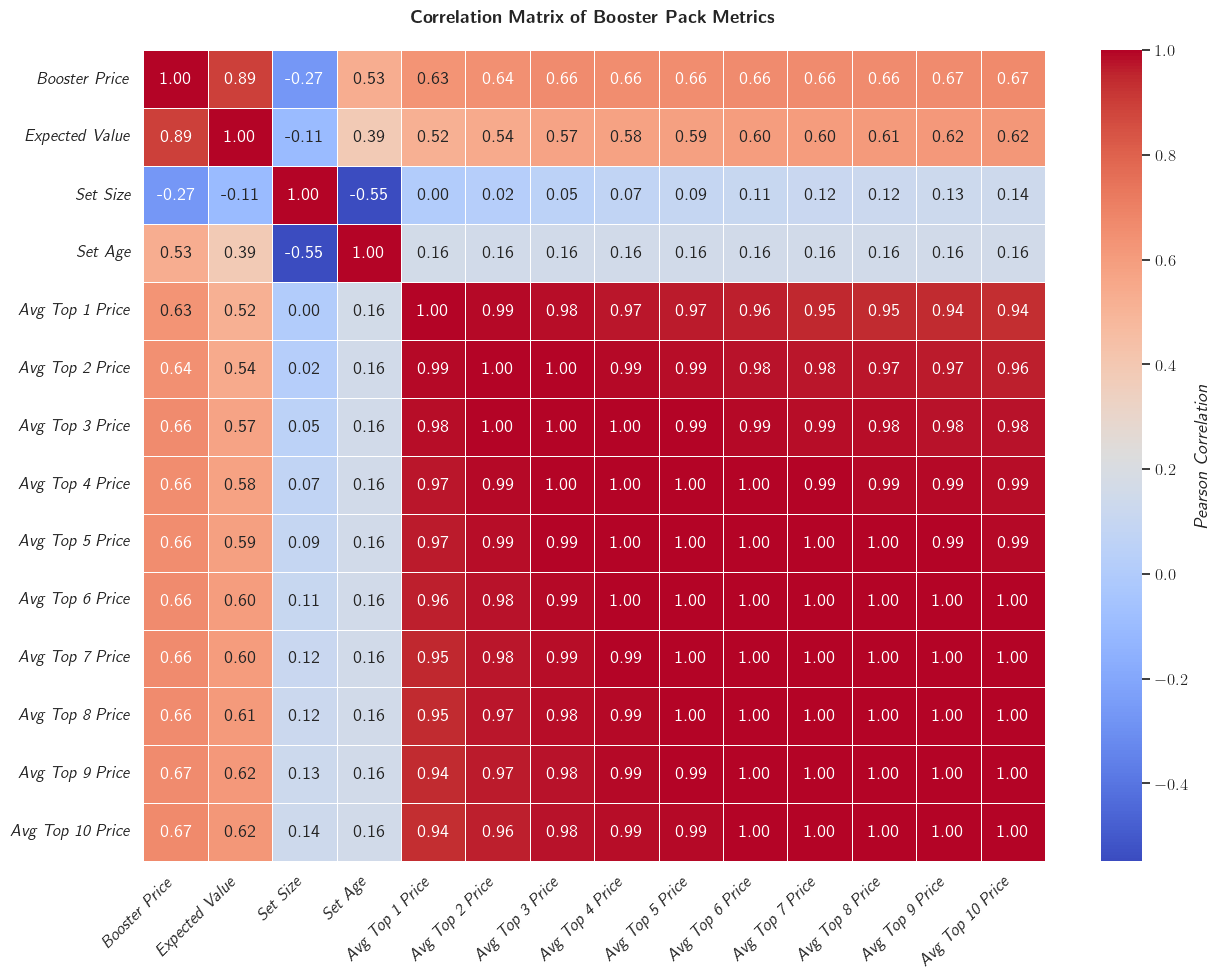

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# --- LaTeX-friendly style ---
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# --- Select the relevant columns ---
correlation_cols = [
    'booster_price', 'expected_value', 'set_size', 'set_age',
    'avg_top_1_price', 'avg_top_2_price', 'avg_top_3_price', 'avg_top_4_price',
    'avg_top_5_price', 'avg_top_6_price', 'avg_top_7_price', 'avg_top_8_price',
    'avg_top_9_price', 'avg_top_10_price'
]

# Replace this with your DataFrame
df = merged_final.copy()
corr = df[correlation_cols].corr()

# --- Set up plot ---
plt.figure(figsize=(13, 10))
sns.set(style="white", font_scale=1.1)

# --- Plot heatmap ---
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': r'\textit{Pearson Correlation}'},
    linewidths=0.4,
    linecolor='white'
)

# --- LaTeX-style title and ticks ---
ax.set_title(r"\textbf{Correlation Matrix of Booster Pack Metrics}", pad=20)

# Tweak tick labels
ax.set_xticklabels(
    [r"\textit{" + label.get_text().replace("_", " ").title() + "}" for label in ax.get_xticklabels()],
    rotation=45,
    ha='right'
)
ax.set_yticklabels(
    [r"\textit{" + label.get_text().replace("_", " ").title() + "}" for label in ax.get_yticklabels()],
    rotation=0
)

plt.tight_layout()
plt.show()


#### -> the sets are getting bigger..

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

# --- Base and loop variables ---
core_vars = ['expected_value', 'set_size', 'is_special_set', 'set_age']
avg_top_price_cols = [f'avg_top_{i}_price' for i in range(1, 11)]

# --- Storage for all VIFs ---
all_vifs = []

# --- Loop through each avg_top_X_price variable ---
for col in avg_top_price_cols:
    # Define current model variables
    model_vars = [col] + core_vars
    df_subset = merged_final[model_vars].dropna()

    # Add constant term
    X = add_constant(df_subset)

    # Compute VIFs
    vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_names = X.columns

    # Store as a dict
    vif_row = {"included_avg_top_price": col}
    for name, val in zip(vif_names, vif_values):
        if name != 'const':
            vif_row[f"VIF {name}"] = val

    all_vifs.append(vif_row)

# --- Convert to DataFrame ---
vif_table = pd.DataFrame(all_vifs)

# Optional: Rename the included column for better display
vif_table['included_avg_top_price'] = vif_table['included_avg_top_price'].str.replace("_", " ").str.title()
vif_table

included_avg_top_price  VIF avg_top_1_price  VIF expected_value  \
0        Avg Top 1 Price             1.418778            1.782716   
1        Avg Top 2 Price                  NaN            1.835829   
2        Avg Top 3 Price                  NaN            1.930666   
3        Avg Top 4 Price                  NaN            1.949829   
4        Avg Top 5 Price                  NaN            1.974621   
5        Avg Top 6 Price                  NaN            2.020255   
6        Avg Top 7 Price                  NaN            2.045772   
7        Avg Top 8 Price                  NaN            2.088908   
8        Avg Top 9 Price                  NaN            2.123012   
9       Avg Top 10 Price                  NaN            2.154705   

   VIF set_size  VIF is_special_set  VIF set_age  VIF avg_top_2_price  \
0      2.082109            1.540197     2.206809                  NaN   
1      2.078421            1.531280     2.206529             1.464213   
2      2.076628            1.538503     2.205625                  NaN   
3      2.078818            1.535371     2.199753                  NaN   
4      2.083188            1.535206     2.196914                  NaN   
5      2.086912            1.538460     2.195957                  NaN   
6      2.089797            1.541879     2.196004                  NaN   
7      2.092099            1.546157     2.196507                  NaN   
8      2.095084            1.548884     2.196312                  NaN   
9      2.097925            1.551472     2.195926                  NaN   

   VIF avg_top_3_price  VIF avg_top_4_price  VIF avg_top_5_price  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2             1.557741                  NaN                  NaN   
3                  NaN             1.590823                  NaN   
4                  NaN                  NaN             1.626188   
5                  NaN                  NaN                  NaN   
6                  NaN                  NaN                  NaN   
7                  NaN                  NaN                  NaN   
8                  NaN                  NaN                  NaN   
9                  NaN                  NaN                  NaN   

   VIF avg_top_6_price  VIF avg_top_7_price  VIF avg_top_8_price  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5             1.677303                  NaN                  NaN   
6                  NaN             1.706636                  NaN   
7                  NaN                  NaN             1.750845   
8                  NaN                  NaN                  NaN   
9                  NaN                  NaN                  NaN   

   VIF avg_top_9_price  VIF avg_top_10_price  
0                  NaN                   NaN  
1                  NaN                   NaN  
2                  NaN                   NaN  
3                  NaN                   NaN  
4                  NaN                   NaN  
5                  NaN                   NaN  
6                  NaN                   NaN  
7                  NaN                   NaN  
8             1.788182                   NaN  
9                  NaN              1.823464

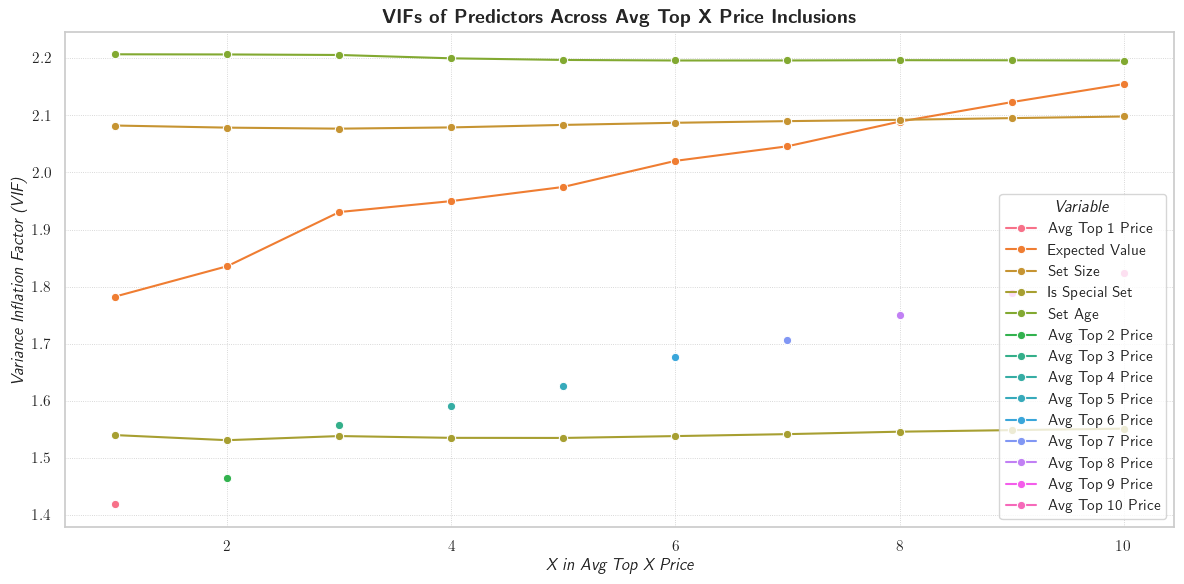

In [150]:
# Reshape the wide vif_table into long format
vif_long = vif_table.copy()
vif_long['X'] = vif_long['included_avg_top_price'].str.extract(r'(\d+)').astype(int)

vif_long_melted = vif_long.melt(id_vars='X', value_vars=[col for col in vif_table.columns if col.startswith("VIF ")],
                                var_name="Variable", value_name="VIF")
vif_long_melted['Variable'] = vif_long_melted['Variable'].str.replace("VIF ", "").str.replace("_", " ").str.title()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=vif_long_melted, x="X", y="VIF", hue="Variable", marker="o")

plt.title(r"\textbf{VIFs of Predictors Across Avg Top X Price Inclusions}", fontsize=14)
plt.xlabel(r"\textit{X in Avg Top X Price}")
plt.ylabel(r"\textit{Variance Inflation Factor (VIF)}")
plt.legend(title=r"\textit{Variable}")
plt.grid(True, linestyle=":", linewidth=0.6)
plt.tight_layout()
plt.show()


In [154]:
merged_final_final = merged_final.copy()

#merged_final_final

### drop the unneeded columns:

In [ ]:
# List of columns to keep
columns_to_keep = ['avg_top_3_price', 'avg_top_4_price', 'avg_top_5_price']

# Drop all avg_top_X_price columns except top 3/4/5
cols_to_drop = [col for col in merged_final_final.columns 
                if col.startswith('avg_top_') and col not in columns_to_keep]

# Drop them
merged_final_final = merged_final_final.drop(columns=cols_to_drop)

merged_final_final.to_excel('cross_section_final_correct_FINAL_duplicate1.xlsx', index=False) #prevent overwriting the old file

merged_final_final


product_name  booster_price  \
0       Champion's Path Booster Pack           8.56   
1          Crown Zenith Booster Pack           3.98   
2          Hidden Fates Booster Pack          19.96   
3         Shining Fates Booster Pack           4.88   
4       Shining Legends Booster Pack          30.44   
5            Sun & Moon Booster Pack           6.45   
6       Burning Shadows Booster Pack           9.68   
7       Celestial Storm Booster Pack          18.29   
8        Cosmic Eclipse Booster Pack          19.53   
9      Crimson Invasion Booster Pack           6.42   
10      Forbidden Light Booster Pack          15.49   
11     Guardians Rising Booster Pack          10.39   
12         Lost Thunder Booster Pack          14.96   
13              Team Up Booster Pack          53.27   
14          Ultra Prism Booster Pack          18.33   
15       Unbroken Bonds Booster Pack          18.36   
16        Unified Minds Booster Pack          18.69   
17        Paldean Fates Booster Pack           4.63   
18                  151 Booster Pack           7.17   
19     Scarlet & Violet Booster Pack           2.80   
20       Paldea Evolved Booster Pack           3.53   
21      Obsidian Flames Booster Pack           3.28   
22         Paradox Rift Booster Pack           2.99   
23      Temporal Forces Booster Pack           2.96   
24  Twilight Masquerade Booster Pack           3.54   
25        Stellar Crown Booster Pack           3.17   
26       Sword & Shield Booster Pack           4.48   
27          Rebel Clash Booster Pack           4.24   
28      Darkness Ablaze Booster Pack           3.61   
29       Evolving Skies Booster Pack          14.16   
30      Astral Radiance Booster Pack           3.75   
31          Lost Origin Booster Pack           4.74   
32       Silver Tempest Booster Pack           3.19   

                            set_name  avg_top_5_price release_date   set_age  \
0                     champions-path           65.884   2020-09-25  4.032854   
1                       crown-zenith           59.564   2023-01-20  1.713895   
2                       hidden-fates          161.866   2019-08-23  5.125257   
3                      shining-fates           21.472   2021-02-19  3.630390   
4                    shining-legends           59.372   2017-10-06  7.003422   
5                        sm-base-set           34.336   2017-02-03  7.674196   
6                 sm-burning-shadows          118.276   2017-08-04  7.175907   
7                 sm-celestial-storm          100.690   2018-08-03  6.179329   
8                  sm-cosmic-eclipse          148.622   2019-11-01  4.933607   
9                sm-crimson-invasion           23.544   2017-11-03  6.926762   
10                sm-forbidden-light           42.276   2018-05-04  6.428474   
11               sm-guardians-rising           33.190   2017-05-05  7.425051   
12                   sm-lost-thunder           80.544   2018-11-02  5.930185   
13                        sm-team-up          344.944   2019-02-01  5.681040   
14                    sm-ultra-prism          161.272   2018-02-02  6.677618   
15                 sm-unbroken-bonds          125.244   2019-05-03  5.431896   
16                  sm-unified-minds          148.648   2019-08-02  5.182752   
17                  sv-paldean-fates           58.466   2024-01-26  0.698152   
18         sv-scarlet-and-violet-151           64.132   2023-09-22  1.043121   
19  sv01-scarlet-and-violet-base-set           17.874   2023-03-31  1.522245   
20               sv02-paldea-evolved           53.366   2023-06-09  1.330595   
21              sv03-obsidian-flames           19.674   2023-08-11  1.158111   
22                 sv04-paradox-rift           32.414   2023-11-03  0.928131   
23              sv05-temporal-forces           50.848   2024-03-22  0.544832   
24          sv06-twilight-masquerade          101.176   2024-05-24  0.372348   
25                sv07-stellar-crown           51.142   2024-09-13  0.065

-------------

### Divide this file into what is above here (the dataset & variables formation)
### & what is below here: the final analysis only:

------------------------

## FINAL ANALYSIS:

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

cross_section_final = pd.read_excel('cross_section_final_correct_FINAL.xlsx')

#cross_section_final

### Summary stats: 

In [2]:
summary_stats = cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]].describe()
print(summary_stats)


       booster_price  expected_value  avg_top_5_price    set_age    set_size  \
count      33.000000       33.000000        33.000000  33.000000   33.000000   
mean       10.603636        3.576580        86.482545   3.864435  205.242424   
std        10.449620        1.915406        87.591944   2.441881   50.361835   
min         2.800000        1.328567        10.484000   0.065708   78.000000   
25%         3.610000        2.342919        33.190000   1.522245  173.000000   
50%         6.420000        2.642738        58.466000   4.147844  216.000000   
75%        15.490000        4.996197       104.150000   5.930185  245.000000   
max        53.270000        9.862344       411.256000   7.674196  279.000000   

       is_special_set  
count       33.000000  
mean         0.212121  
std          0.415149  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


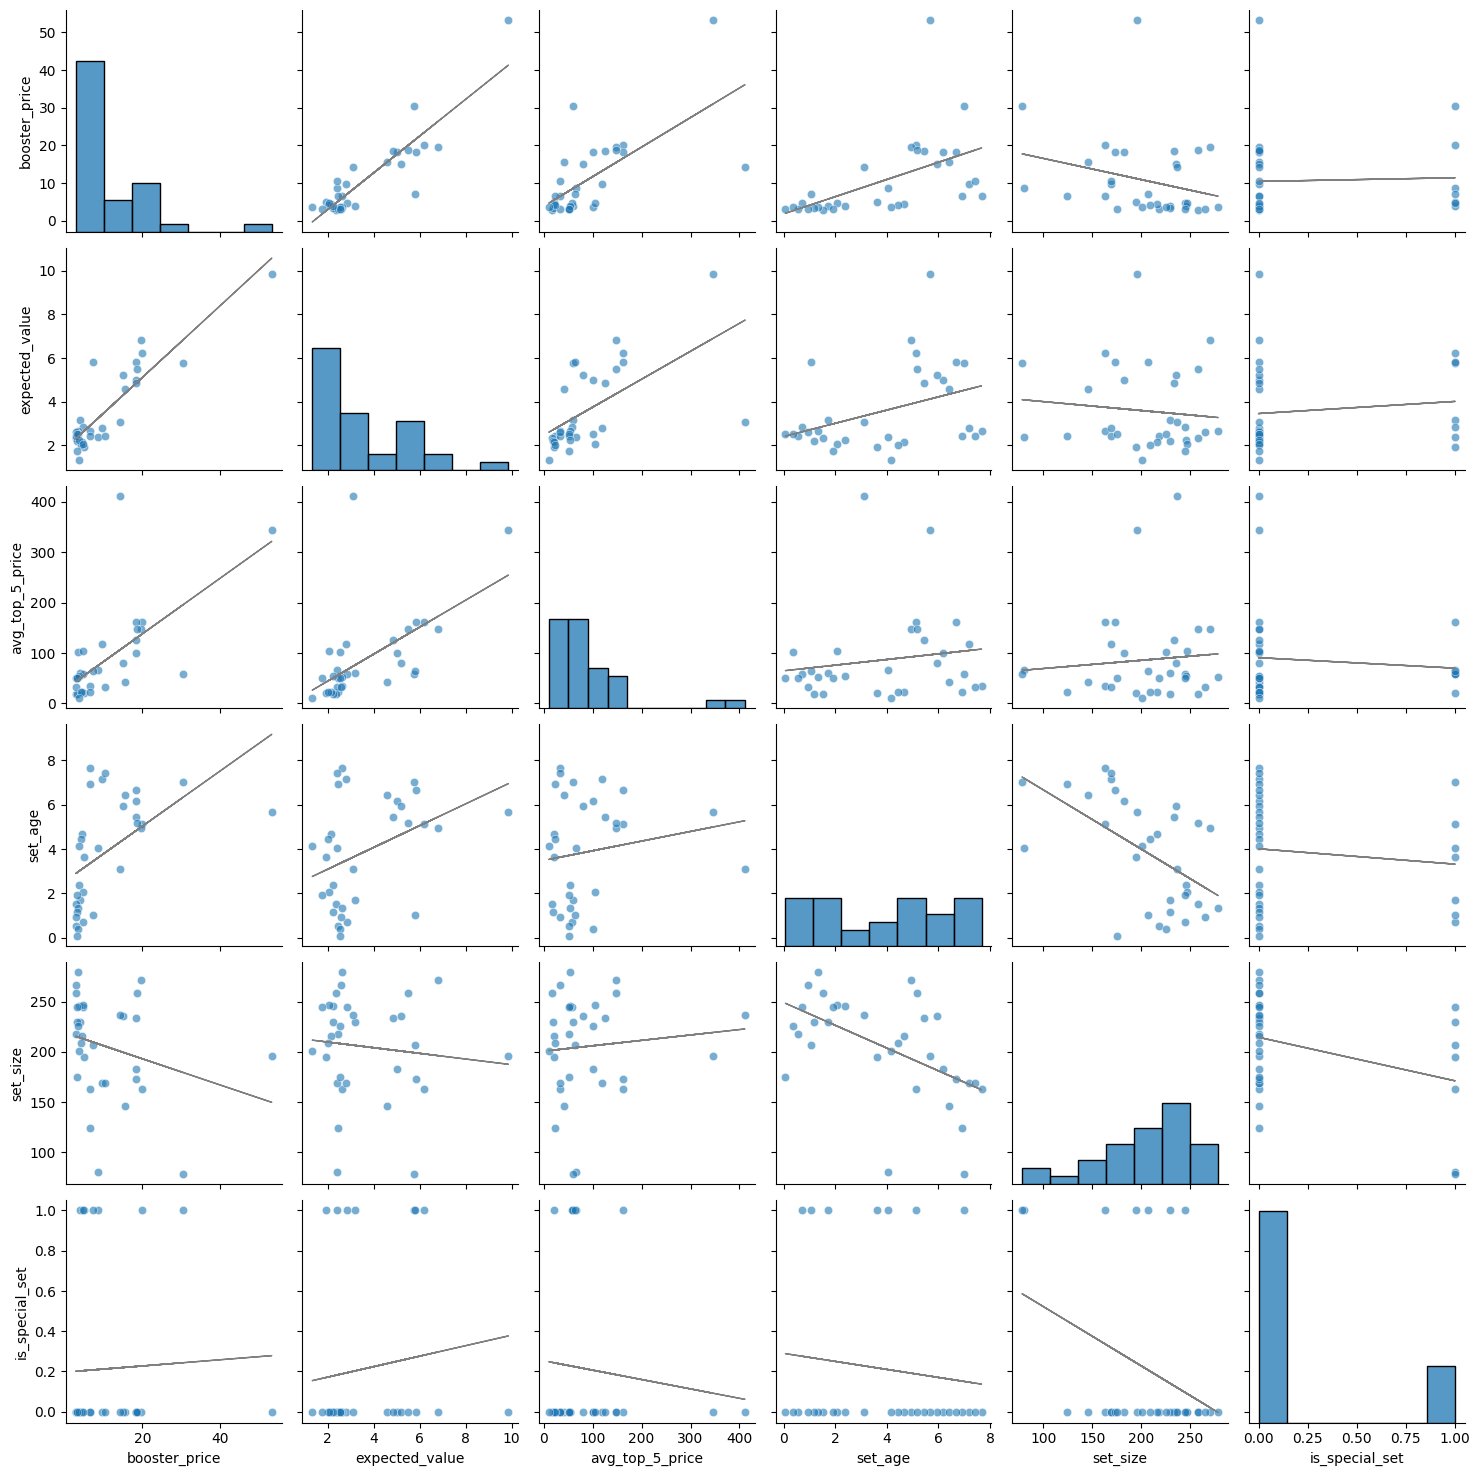

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll  # Correct import for PathCollection

# Create the pairplot (without trendlines initially)
g = sns.pairplot(
    cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]],
    plot_kws={'alpha': 0.6}  # Keeps the original look
)

# Add trendlines manually with a more subtle appearance
for ax in g.axes.flat:
    if ax is not None:
        # Extract scatter plot points
        scatter_points = [p for p in ax.collections if isinstance(p, mcoll.PathCollection)]
        if scatter_points:
            x_values, y_values = scatter_points[0].get_offsets().T  # Get X and Y data points

            if len(x_values) > 1:  # Ensure enough points for a trendline
                # Fit a simple linear regression (trendline)
                m, b = np.polyfit(x_values, y_values, 1)
                ax.plot(x_values, m * x_values + b, color='gray', linestyle='-', linewidth=1)  # Thin, solid gray line

# Show the modified pairplot
plt.show()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


# Define independent variables
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for VIF calculation

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif_data)


          Variable        VIF
0            const  59.355207
1   expected_value   1.974621
2  avg_top_5_price   1.626188
3          set_age   2.196914
4         set_size   2.083188
5   is_special_set   1.535206


-> set age with the set size introduce slight collinearity increase of these variables.. (but not significant)

                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     44.37
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.46e-12
Time:                        08:26:33   Log-Likelihood:                -87.108
No. Observations:                  33   AIC:                             186.2
Df Residuals:                      27   BIC:                             195.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3891      5.026     

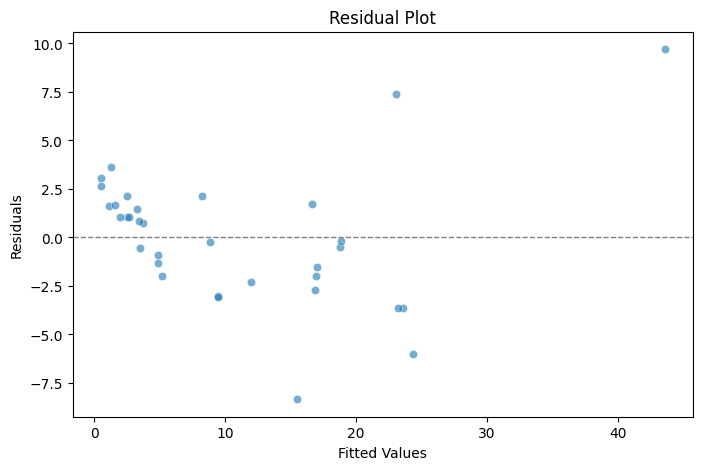

Test  LM Statistic   p-value
0  Breusch-Pagan     19.432594  0.001596
0          White     31.955077  0.031621

In [5]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression model

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

# 1. Residual Plot (Visual Check)
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Breusch-Pagan Test
bp_test = sms.het_breuschpagan(residuals, X)
bp_test_results = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test[0]],
    "p-value": [bp_test[1]]
})

# 3. White's Test
white_test = sms.het_white(residuals, X)
white_test_results = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test[0]],
    "p-value": [white_test[1]]
})

# Combine results
heteroskedasticity_results = pd.concat([bp_test_results, white_test_results])

heteroskedasticity_results

## -> so there is heteroskedasticity

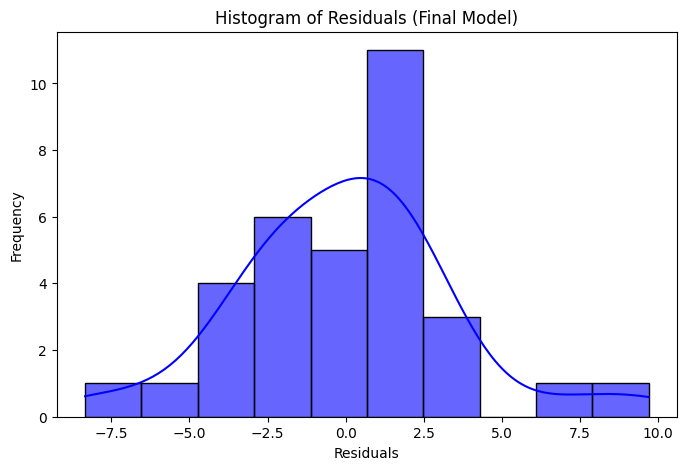

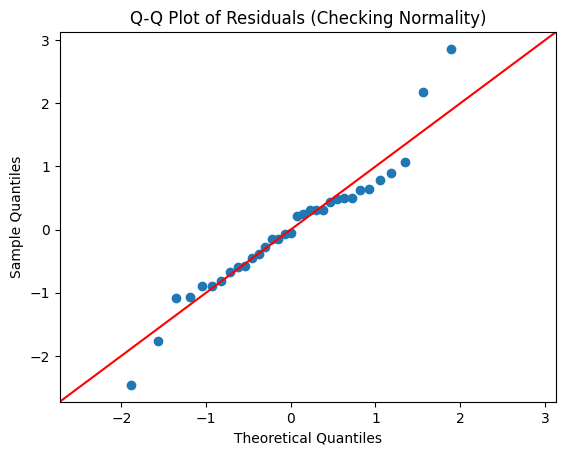


### Shapiro-Wilk Test for Normality ###
Statistic: 0.958110857452219, p-value: 0.2284352835290986

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.11427531153793746, p-value: 0.7394764556907252

### Jarque-Bera Test for Normality ###
Statistic: 3.218023202435175, p-value: 0.20008528042001084


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


# Define dependent and independent variables
y = cross_section_final["booster_price"]
X_filtered = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the final regression model
final_model = sm.OLS(y, X_filtered).fit()

# Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot for Normality Check
sm.qqplot(final_model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model.resid, 'norm', args=(final_model.resid.mean(), final_model.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


## surprisingly seems almost normal, however the histogram and qq plot show some deviations.. 

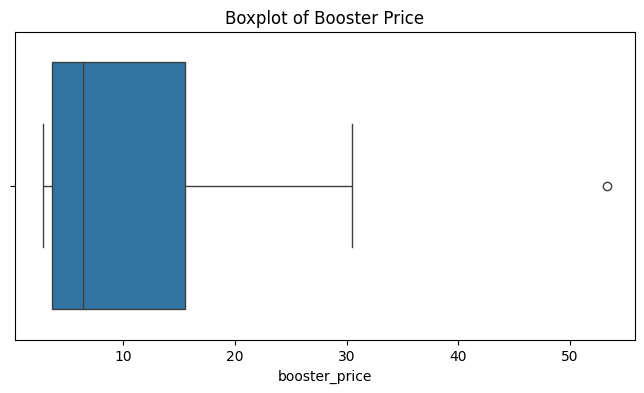

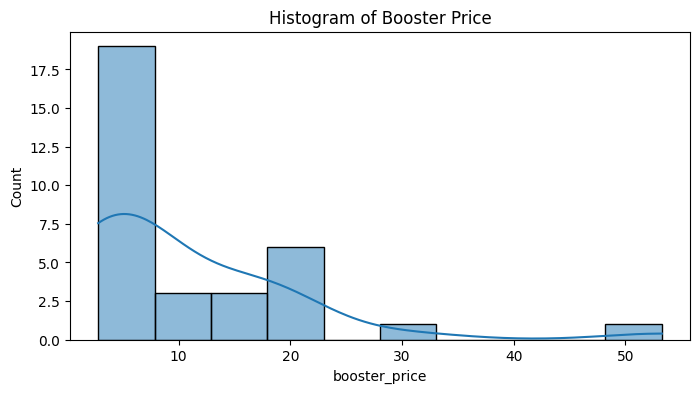


### Z-Score Outliers (booster_price) ###
    booster_price
13          53.27

### IQR Outliers (booster_price) ###
    booster_price
13          53.27

### Cook’s Distance Outliers (booster_price) ###
    booster_price
4           30.44
13          53.27
18           7.17
29          14.16


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Boxplot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=cross_section_final["booster_price"])
plt.title("Boxplot of Booster Price")
plt.show()

# Histogram to check distribution
plt.figure(figsize=(8, 4))
sns.histplot(cross_section_final["booster_price"], bins=10, kde=True)
plt.title("Histogram of Booster Price")
plt.show()

# Z-Score Method (Values > 3 or < -3 are Outliers)
cross_section_final["z_score"] = (cross_section_final["booster_price"] - cross_section_final["booster_price"].mean()) / cross_section_final["booster_price"].std()
z_outliers = cross_section_final[abs(cross_section_final["z_score"]) > 3]

# IQR Method (Values outside 1.5 * IQR are Outliers)
Q1 = cross_section_final["booster_price"].quantile(0.25)
Q3 = cross_section_final["booster_price"].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = cross_section_final[
    (cross_section_final["booster_price"] < (Q1 - 1.5 * IQR)) | 
    (cross_section_final["booster_price"] > (Q3 + 1.5 * IQR))
]

#  Cook’s Distance (Regression Influence)
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential points (Cook’s Distance > 4/n)
cooks_threshold = 4 / len(cross_section_final)
cooks_outliers = cross_section_final[cooks_d > cooks_threshold]

# Print Outlier Results
print("\n### Z-Score Outliers (booster_price) ###")
print(z_outliers[["booster_price"]])

print("\n### IQR Outliers (booster_price) ###")
print(iqr_outliers[["booster_price"]])

print("\n### Cook’s Distance Outliers (booster_price) ###")
print(cooks_outliers[["booster_price"]])


##### purely the booster price outlier is one, for the regression influence there are 4 -- team up (53), P151 (7.17), Shining Legends (30.44), & Evolving Skies (14.16).

#### wo outlier:

In [8]:
# Remove identified outlier
cross_section_final_wo_outlier = cross_section_final[cross_section_final["booster_price"] != 53.27]

# Define dependent and independent variables again
y2 = cross_section_final_wo_outlier["booster_price"]
X2 = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X2 = sm.add_constant(X2)  # Add constant for regression

# Fit OLS model again
filtered_model = sm.OLS(y2, X2).fit()
residuals_filtered = filtered_model.resid
fitted_values_filtered = filtered_model.fittedvalues

print(filtered_model.summary())

                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     36.46
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           5.99e-11
Time:                        08:26:58   Log-Likelihood:                -74.871
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      26   BIC:                             170.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0504      3.748     

## -> not much better, thus log-transform:

### log-linear model (5 dep. vars):

In [9]:
# Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
model_log = sm.OLS(y_log, X).fit()

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           6.52e-17
Time:                        08:27:01   Log-Likelihood:                 10.562
No. Observations:                  33   AIC:                            -9.124
Df Residuals:                      27   BIC:                           -0.1450
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera


# For log-transformed dependent variable
residuals_log = model_log.resid
bp_test_log = het_breuschpagan(residuals_log, X)
jb_test_log = jarque_bera(residuals_log)

print("\nLog-Transformed Booster Price Model:")
print(f"  - Breusch-Pagan p-value (heteroskedasticity): {bp_test_log[1]:.4f}")
print(f"  - Jarque-Bera p-value (normality): {jb_test_log[1]:.4f}")


Log-Transformed Booster Price Model:
  - Breusch-Pagan p-value (heteroskedasticity): 0.0378
  - Jarque-Bera p-value (normality): 0.7547


### better, but still some issues..:
#### -> log-log & log-log-log with the set-size variable and then drop it.

##### & ACCOUNT FOR HETEROSKEDASTICITY!!:

#### log-log:

In [11]:
cross_section_final["log_avg_top_5_price"] = np.log(cross_section_final["avg_top_5_price"])

X_log_top5 = cross_section_final[["expected_value", "log_avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X_log_top5 = sm.add_constant(X_log_top5)

model_log_top5 = sm.OLS(y_log, X_log_top5).fit()
print("\n### Log Booster Price + Log Avg Top 5 Price ###")
print(model_log_top5.summary())



### Log Booster Price + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     104.5
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           8.53e-17
Time:                        08:27:07   Log-Likelihood:                 10.233
No. Observations:                  33   AIC:                            -8.466
Df Residuals:                      27   BIC:                            0.5130
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

## and log-log-log:

In [12]:
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])

X_log_both = cross_section_final[["log_expected_value", "log_avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X_log_both = sm.add_constant(X_log_both)

model_log_both = sm.OLS(y_log, X_log_both).fit()
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###")
print(model_log_both.summary())



### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     81.42
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.03e-15
Time:                        08:27:11   Log-Likelihood:                 6.3370
No. Observations:                  33   AIC:                           -0.6739
Df Residuals:                      27   BIC:                             8.305
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

### the best is the log log log, but we drop the set_size, since its CONSISTENTLY the worst variable - minimal effect, and no significance:


### however, first, we try the log booster price ~ log expected value:

In [13]:
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])

X_log_exp_val_only = cross_section_final[["log_expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]]
X_log_exp_val_only= sm.add_constant(X_log_exp_val_only)

model_log_exp_val_only = sm.OLS(y_log, X_log_exp_val_only).fit()
print("\n### Log Booster Price + Log Expected Value (5 Vars) ###")
print(model_log_exp_val_only.summary())



### Log Booster Price + Log Expected Value (5 Vars) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.49e-17
Time:                        08:27:14   Log-Likelihood:                 11.747
No. Observations:                  33   AIC:                            -11.49
Df Residuals:                      27   BIC:                            -2.515
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

### check of heteroskedasticity:

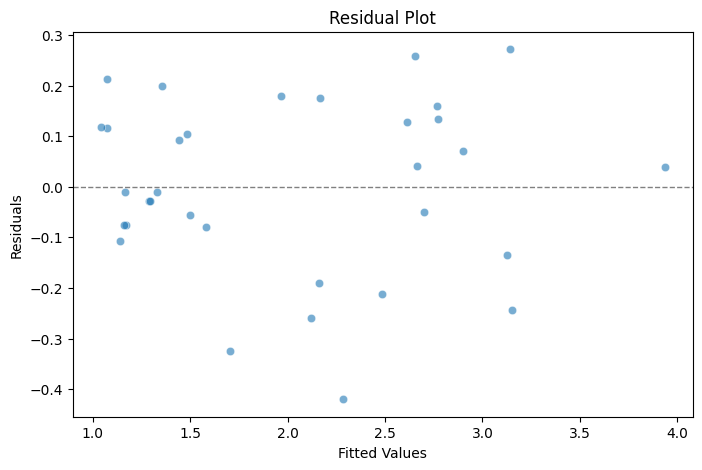

Test  LM Statistic   p-value
0  Breusch-Pagan      9.850239  0.079592
0          White     17.847836  0.532623

In [14]:
# 1. Residual Plot (Visual Check)
residuals2 = model_log_exp_val_only.resid
fitted_values2 = model_log_exp_val_only.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values2, y=residuals2, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Breusch-Pagan Test
bp_test2 = sms.het_breuschpagan(residuals2, X)
bp_test_results2 = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test2[0]],
    "p-value": [bp_test2[1]]
})

# 3. White's Test
white_test2 = sms.het_white(residuals2, X)
white_test_results2 = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test2[0]],
    "p-value": [white_test2[1]]
})

# Combine results
heteroskedasticity_results2 = pd.concat([bp_test_results2, white_test_results2])

heteroskedasticity_results2

#### VIF check again:

In [15]:

# Compute VIF
vif_data2 = pd.DataFrame()
vif_data2["Variable"] = X_log_exp_val_only.columns
vif_data2["VIF"] = [variance_inflation_factor(X_log_exp_val_only.values, i) for i in range(X_log_exp_val_only.shape[1])]

# Print VIF values
print(vif_data2)


             Variable        VIF
0               const  59.274316
1  log_expected_value   1.905768
2     avg_top_5_price   1.535094
3             set_age   2.223773
4            set_size   2.094605
5      is_special_set   1.572448


#### The influence of the *outliers* after the log transform: 

In [16]:
influence2 = model_log_exp_val_only.get_influence()
cooks_d2 = influence2.cooks_distance[0]

# Identify influential points (Cook’s Distance > 4/n)
cooks_threshold2 = 4 / len(cross_section_final)
cooks_outliers2 = cross_section_final[cooks_d2 > cooks_threshold2]

print(cooks_outliers2[["log_booster_price"]])
print(cooks_outliers2[["set_name"]])


# Z-Score Method (Values > 3 or < -3 are Outliers)
cross_section_final["z_score"] = (cross_section_final["log_booster_price"] - cross_section_final["log_booster_price"].mean()) / cross_section_final["log_booster_price"].std()
z_outliers2 = cross_section_final[abs(cross_section_final["z_score"]) > 3]

# IQR Method (Values outside 1.5 * IQR are Outliers)
Q1 = cross_section_final["log_booster_price"].quantile(0.25)
Q3 = cross_section_final["log_booster_price"].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers2 = cross_section_final[
    (cross_section_final["log_booster_price"] < (Q1 - 1.5 * IQR)) | 
    (cross_section_final["log_booster_price"] > (Q3 + 1.5 * IQR))
]


print(z_outliers2[["log_booster_price"]])
print(iqr_outliers2[["log_booster_price"]])

   log_booster_price
1           1.381282
4           3.415758
5           1.864080
          set_name
1     crown-zenith
4  shining-legends
5      sm-base-set
Empty DataFrame
Columns: [log_booster_price]
Index: []
Empty DataFrame
Columns: [log_booster_price]
Index: []


##### no longer outliers among the dep. var., still some influential to the regression (changed except SL)

#### -> the best so far (& no significant heteroskedasticity..).. so we **drop** the 'set_size' variable since it does not bring any value to the adj. R2, only 0.955-0.953 = 0.002 in (non-adjusted) R2. (log_booster_price ~ log_ev  + ...) - & no change in the adj. R2 - 0.947.

------------------------------------

### REGRESSION AFTER DROPPING SET_SIZE:

------------------------

#### log-linear:

In [17]:
# Define independent variables
X6 = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X6 = sm.add_constant(X6)

# Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log6 = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
model_log_4vars = sm.OLS(y_log6, X6).fit()

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(model_log_4vars.summary())


### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           7.35e-18
Time:                        08:27:26   Log-Likelihood:                 10.143
No. Observations:                  33   AIC:                            -10.29
Df Residuals:                      28   BIC:                            -2.803
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### -> even better adj. R2 than the same model but with the set_size variable!

#### now, the same model just with HC3:

In [18]:
# Define independent variables
X6 = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X6 = sm.add_constant(X6)

# Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log6 = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
model_log_4vars_robust = sm.OLS(y_log6, X6).fit(cov_type="HC3")

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(model_log_4vars_robust.summary())


### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     72.50
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.32e-14
Time:                        08:27:43   Log-Likelihood:                 10.143
No. Observations:                  33   AIC:                            -10.29
Df Residuals:                      28   BIC:                            -2.803
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

### -> very good, now, the same with the log-log and log-log-log:

In [19]:
cross_section_final["log_avg_top_5_price"] = np.log(cross_section_final["avg_top_5_price"])

X_log_top5_4vars = cross_section_final[["expected_value", "log_avg_top_5_price", "set_age", "is_special_set"]]
X_log_top5_4vars = sm.add_constant(X_log_top5_4vars)

model_log_top5_4vars = sm.OLS(y_log, X_log_top5_4vars).fit()
print("\n### Log Booster Price + Log Avg Top 5 Price ###")
print(model_log_top5_4vars.summary())



### Log Booster Price + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.02e-17
Time:                        08:27:46   Log-Likelihood:                 9.7606
No. Observations:                  33   AIC:                            -9.521
Df Residuals:                      28   BIC:                            -2.039
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

#### hc3:

In [20]:
cross_section_final["log_avg_top_5_price"] = np.log(cross_section_final["avg_top_5_price"])

X_log_top5_4vars = cross_section_final[["expected_value", "log_avg_top_5_price", "set_age", "is_special_set"]]
X_log_top5_4vars = sm.add_constant(X_log_top5_4vars)

model_log_top5_4vars_robust = sm.OLS(y_log, X_log_top5_4vars).fit(cov_type="HC3")
print("\n### Log Booster Price + Log Avg Top 5 Price ###")
print(model_log_top5_4vars_robust.summary())


### Log Booster Price + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     189.7
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           7.60e-20
Time:                        08:27:49   Log-Likelihood:                 9.7606
No. Observations:                  33   AIC:                            -9.521
Df Residuals:                      28   BIC:                            -2.039
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

#### finally, the log-log-log:

In [21]:
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])

X_log_both_4vars= cross_section_final[["log_expected_value", "log_avg_top_5_price", "set_age", "is_special_set"]]
X_log_both_4vars = sm.add_constant(X_log_both_4vars)

model_log_both_4vars = sm.OLS(y_log, X_log_both_4vars).fit()
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###")
print(model_log_both_4vars.summary())


### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.47e-16
Time:                        08:27:52   Log-Likelihood:                 5.9817
No. Observations:                  33   AIC:                            -1.963
Df Residuals:                      28   BIC:                             5.519
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

#### hc3:

In [22]:
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])

X_log_both_4vars = cross_section_final[["log_expected_value", "log_avg_top_5_price", "set_age", "is_special_set"]]
X_log_both_4vars = sm.add_constant(X_log_both_4vars)

model_log_both_4vars_robust = sm.OLS(y_log, X_log_both_4vars).fit(cov_type="HC3")
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price Robust ###")
print(model_log_both_4vars_robust.summary())


### Log Booster Price + Log Expected Value + Log Avg Top 5 Price Robust ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     70.23
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.47e-14
Time:                        08:27:55   Log-Likelihood:                 5.9817
No. Observations:                  33   AIC:                            -1.963
Df Residuals:                      28   BIC:                             5.519
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

### -> the best one - normal errors (Prob(Jarque-Bera)) & heteroskedasticity robust.

### even though adjusted R2 dropped from 0.944 (log-linear) to 0.927 (log-log-log)

### but! looking at the AIC and BIC the log-linear seems the best as well... ... 



# ... now we can try to drop the is_special_set_var and see what happens, and then FINALLY, the Elastic Net, and compare using LOOCV:::

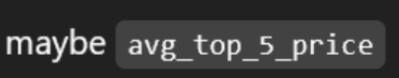    -> try model with only log of booster price and log of expected value.. including the other vars but not transformed..

### ...try it now:

In [23]:
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])

X_log_4vars_log_EV = cross_section_final[["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_log_4vars_log_EV = sm.add_constant(X_log_4vars_log_EV)

model_log_4vars_log_EV = sm.OLS(y_log, X_log_4vars_log_EV).fit()
print("\n### Log Booster Price + Log Expected Value  ###")
print(model_log_4vars_log_EV.summary())


### Log Booster Price + Log Expected Value  ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.18e-18
Time:                        08:28:00   Log-Likelihood:                 11.135
No. Observations:                  33   AIC:                            -12.27
Df Residuals:                      28   BIC:                            -4.788
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### final heteroskedasticity check:

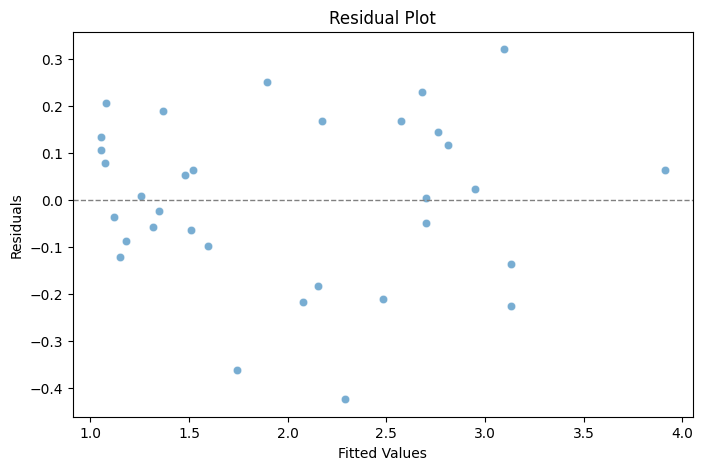

Test  LM Statistic   p-value
0  Breusch-Pagan     10.663440  0.058477
0          White     16.323441  0.635601

In [24]:
# 1. Residual Plot (Visual Check)
residuals3 = model_log_4vars_log_EV.resid
fitted_values3 = model_log_4vars_log_EV.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values3, y=residuals3, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Breusch-Pagan Test
bp_test3 = sms.het_breuschpagan(residuals3, X)
bp_test_results3 = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test3[0]],
    "p-value": [bp_test3[1]]
})

# 3. White's Test
white_test3 = sms.het_white(residuals3, X)
white_test_results3 = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test3[0]],
    "p-value": [white_test3[1]]
})

# Combine results
heteroskedasticity_results3 = pd.concat([bp_test_results3, white_test_results3])

heteroskedasticity_results3

#### hc3:

In [25]:
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])

X_log_4vars_log_EV = cross_section_final[["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_log_4vars_log_EV = sm.add_constant(X_log_4vars_log_EV)

model_log_4vars_log_EV_robust = sm.OLS(y_log, X_log_4vars_log_EV).fit(cov_type="HC3")
print("\n### Log Booster Price + Log Expected Value Robust ###")
print(model_log_4vars_log_EV_robust.summary())


### Log Booster Price + Log Expected Value Robust ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           6.03e-20
Time:                        08:28:06   Log-Likelihood:                 11.135
No. Observations:                  33   AIC:                            -12.27
Df Residuals:                      28   BIC:                            -4.788
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

#### final normality check:

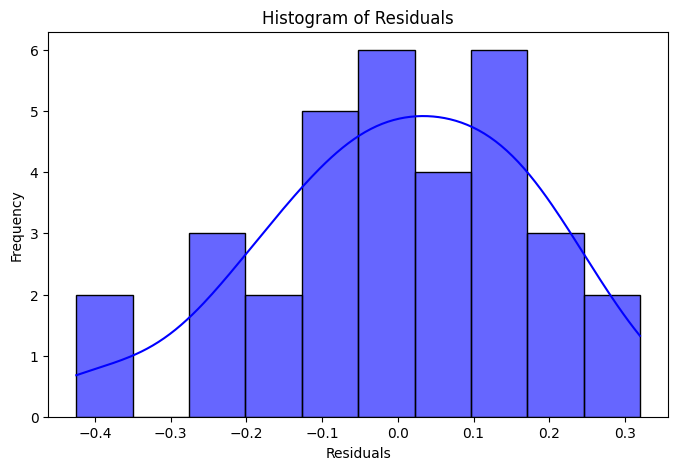

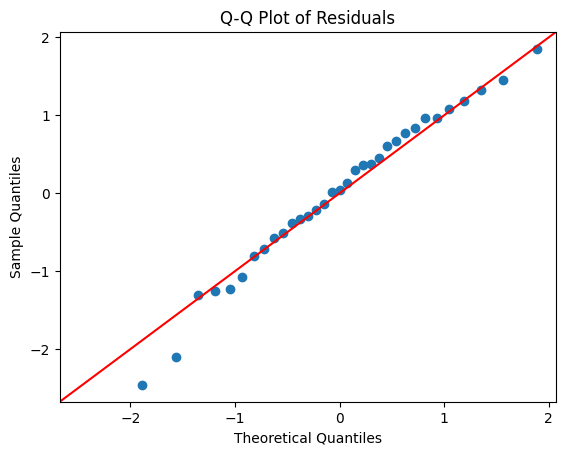


### Shapiro-Wilk Test for Normality ###
Statistic: 0.9797974224430521, p-value: 0.7801515248711702

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.07204693660469241, p-value: 0.9906657981593552

### Jarque-Bera Test for Normality ###
Statistic: 1.1317444074751115, p-value: 0.5678646370373885


In [26]:
# Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(model_log_4vars_log_EV_robust.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot for Normality Check
sm.qqplot(model_log_4vars_log_EV_robust.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(model_log_4vars_log_EV_robust.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(model_log_4vars_log_EV_robust.resid, 'norm', args=(model_log_4vars_log_EV_robust.resid.mean(), model_log_4vars_log_EV_robust.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(model_log_4vars_log_EV_robust.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


### two observations at the left tail.. -> use cooks d and see which these are:

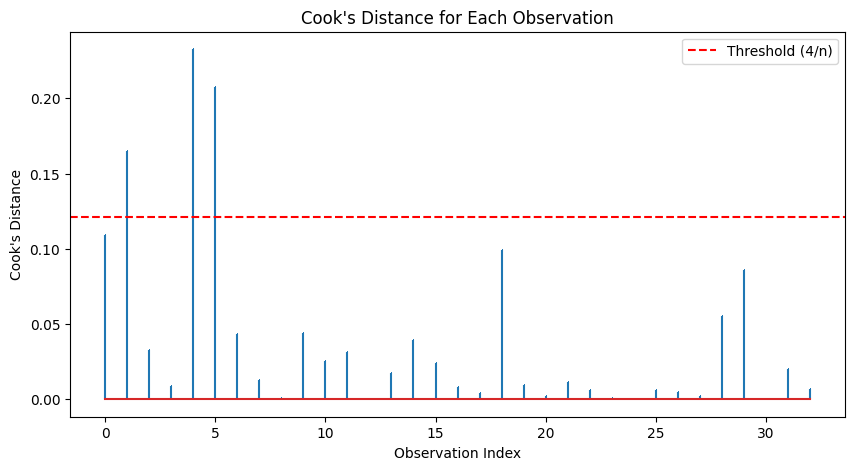


Top 3 Most Influential Observations:
   observation   cooks_d  residual
4            4  0.232603  0.319796
5            5  0.207508 -0.424715
1            1  0.164753 -0.362604

Top 3 Most Influential Observations with Set Names:
   observation         set_name   cooks_d  residual
4            4  shining-legends  0.232603  0.319796
5            5      sm-base-set  0.207508 -0.424715
1            1     crown-zenith  0.164753 -0.362604


In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get influence data from your fitted model
influence = model_log_4vars_log_EV_robust.get_influence()

# Get Cook's distance
cooks_d, _ = influence.cooks_distance

# Plot Cook’s distance
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(4 / len(cooks_d), color='red', linestyle='--', label="Threshold (4/n)")
plt.legend()
plt.show()


# Show top 3 most influential observations
cooks_df = pd.DataFrame({
    "observation": np.arange(len(cooks_d)),
    "cooks_d": cooks_d,
    "residual": model_log_4vars_log_EV_robust.resid.values
})
top_influential = cooks_df.sort_values("cooks_d", ascending=False).head(3)
print("\nTop 3 Most Influential Observations:")
print(top_influential)

# Add set_name to the cooks_df DataFrame
cooks_df["set_name"] = cross_section_final["set_name"].values

# Sort and show the top 3 most influential observations
top_influential = cooks_df.sort_values("cooks_d", ascending=False).head(3)
print("\nTop 3 Most Influential Observations with Set Names:")
print(top_influential[["observation", "set_name", "cooks_d", "residual"]])



#### and collinearity, just to be sure:

In [28]:
# Compute VIF
vif_data3 = pd.DataFrame()
vif_data3["Variable"] = X_log_4vars_log_EV.columns
vif_data3["VIF"] = [variance_inflation_factor(X_log_4vars_log_EV.values, i) for i in range(X_log_4vars_log_EV.shape[1])]

# Print VIF values
print(vif_data3)

             Variable       VIF
0               const  7.771247
1  log_expected_value  1.830443
2     avg_top_5_price  1.529672
3             set_age  1.242028
4      is_special_set  1.127855


# !-> THE ULTIMATE MODEL - robust, the most significant, normal residuals (j-b, check the others..), !the highest adj. R2, and the highest significance of all models.. & lowest AIC and BIC.

--------------------

## Final -> check a **model with log set_age and log set_size** - there might be non-linear - exponential & 1/x relationships..:

In [29]:
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])
cross_section_final["log_set_size"] = np.log(cross_section_final["set_size"])

X_log_all = cross_section_final[["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]]
X_log_all = sm.add_constant(X_log_all)

model_log_all = sm.OLS(y_log, X_log_all).fit()
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###")
print(model_log_all.summary())



### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     85.32
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.12e-15
Time:                        08:28:19   Log-Likelihood:                 7.0622
No. Observations:                  33   AIC:                            -2.124
Df Residuals:                      27   BIC:                             6.855
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

## the above model seems OK...  added.

##### the heteroskedasticity check:

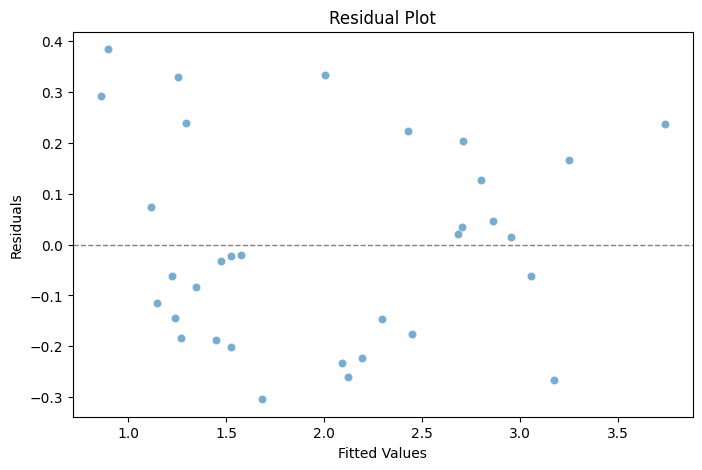

Test  LM Statistic   p-value
0  Breusch-Pagan      3.805002  0.577819
0          White     22.761379  0.248016

In [30]:
# 1. Residual Plot (Visual Check)
residuals_model_all = model_log_all.resid
fitted_values_model_all = model_log_all.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_model_all, y=residuals_model_all, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Breusch-Pagan Test
bp_test_model_all = sms.het_breuschpagan(residuals_model_all, X_log_all)
bp_test_results_model_all = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test_model_all[0]],
    "p-value": [bp_test_model_all[1]]
})

# 3. White's Test
white_test_model_all = sms.het_white(residuals_model_all, X_log_all)
white_test_results_model_all = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test_model_all[0]],
    "p-value": [white_test_model_all[1]]
})

# Combine results
heteroskedasticity_results_model_all = pd.concat([bp_test_results_model_all, white_test_results_model_all])

heteroskedasticity_results_model_all

#### -> no significant heteroskedasticity

### next, the normality check:

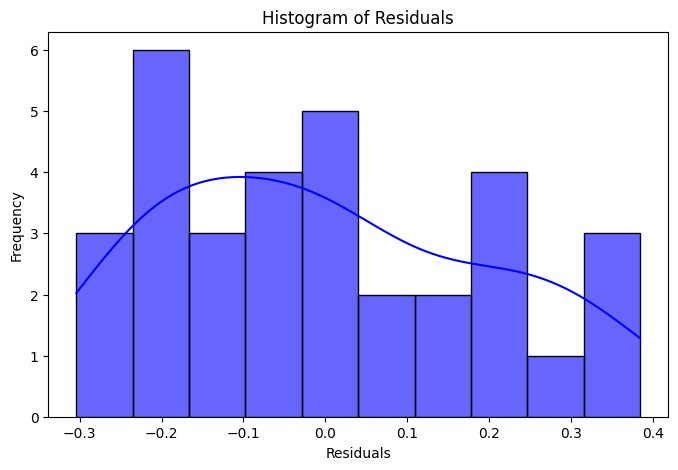

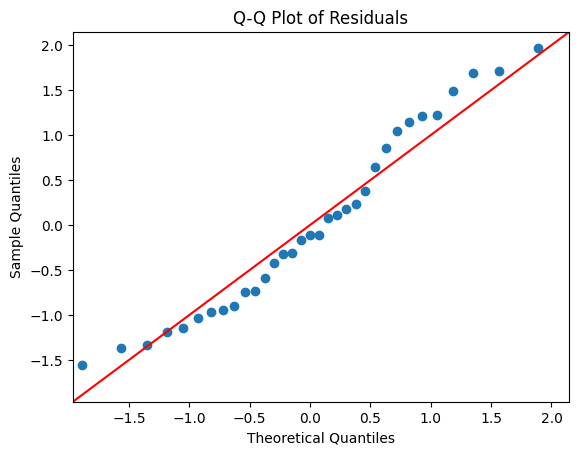


### Shapiro-Wilk Test for Normality ###
Statistic: 0.949256916853456, p-value: 0.12655409513579363

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.09928417922388516, p-value: 0.8692418582271675

### Jarque-Bera Test for Normality ###
Statistic: 2.097839616228321, p-value: 0.3503159532580451


In [31]:
# Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(model_log_all.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot for Normality Check
sm.qqplot(model_log_all.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(model_log_all.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(model_log_all.resid, 'norm', args=(model_log_all.resid.mean(), model_log_all.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(model_log_all.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


#### -> roughly normal, the tests ok, but the plots..

### Finally, check outliers:

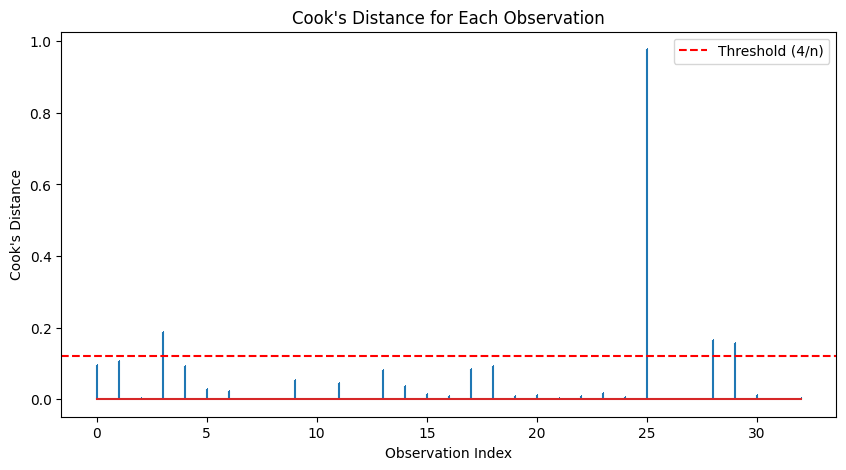


Top 3 Most Influential Observations:
    observation   cooks_d  residual
25           25  0.977569  0.292076
3             3  0.189121  0.330132
28           28  0.165814  0.384487

Top 4 Most Influential Observations with Set Names:
    observation                set_name   cooks_d  residual
25           25      sv07-stellar-crown  0.977569  0.292076
3             3           shining-fates  0.189121  0.330132
28           28  swsh03-darkness-ablaze  0.165814  0.384487
29           29   swsh07-evolving-skies  0.156877  0.222916


In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get influence data from your fitted model
influence2 = model_log_all.get_influence()

# Get Cook's distance
cooks_d, _ = influence2.cooks_distance

# Plot Cook’s distance
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(4 / len(cooks_d), color='red', linestyle='--', label="Threshold (4/n)")
plt.legend()
plt.show()


# Show top 3 most influential observations
cooks_df2 = pd.DataFrame({
    "observation": np.arange(len(cooks_d)),
    "cooks_d": cooks_d,
    "residual": model_log_all.resid.values
})
top_influential2 = cooks_df2.sort_values("cooks_d", ascending=False).head(3)
print("\nTop 3 Most Influential Observations:")
print(top_influential2)

# Add set_name to the cooks_df DataFrame
cooks_df2["set_name"] = cross_section_final["set_name"].values

# Sort and show the top 3 most influential observations
top_influential2 = cooks_df2.sort_values("cooks_d", ascending=False).head(4)
print("\nTop 4 Most Influential Observations with Set Names:")
print(top_influential2[["observation", "set_name", "cooks_d", "residual"]])



#### vif, just to be sure:

In [33]:
# Compute VIF
vif_data4 = pd.DataFrame()
vif_data4["Variable"] = X_log_all.columns
vif_data4["VIF"] = [variance_inflation_factor(X_log_all.values, i) for i in range(X_log_all.shape[1])]

# Print VIF values
print(vif_data4)

              Variable         VIF
0                const  462.084714
1   log_expected_value    2.261185
2  log_avg_top_5_price    2.038893
3          log_set_age    1.304616
4         log_set_size    1.405493
5       is_special_set    1.285762


-------------

---------------

##### the below model is all logs, except avg top 5 price and the dummy

In [34]:
X_log_both3 = cross_section_final[["log_expected_value", "avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]]
X_log_both3 = sm.add_constant(X_log_both3)

model_log_both3 = sm.OLS(y_log, X_log_both3).fit()
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###")
print(model_log_both3.summary())


### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           9.17e-17
Time:                        08:28:36   Log-Likelihood:                 10.144
No. Observations:                  33   AIC:                            -8.288
Df Residuals:                      27   BIC:                            0.6915
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

##### -> the above model ok, but the cond. number..


### Just check the final possibility - wo the set_size but all other vars in log():

In [35]:
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])

X_all_log_wo_setsize = cross_section_final[["log_expected_value", "log_avg_top_5_price", "log_set_age", "is_special_set"]]
X_all_log_wo_setsize = sm.add_constant(X_all_log_wo_setsize)

model_all_log_wo_setsize  = sm.OLS(y_log, X_all_log_wo_setsize).fit(cov_type="HC3")
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price + Log Set Age ###")
print(model_all_log_wo_setsize.summary())


### Log Booster Price + Log Expected Value + Log Avg Top 5 Price + Log Set Age ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     47.75
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           4.12e-12
Time:                        08:28:39   Log-Likelihood:               -0.37345
No. Observations:                  33   AIC:                             10.75
Df Residuals:                      28   BIC:                             18.23
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

#### not the best..

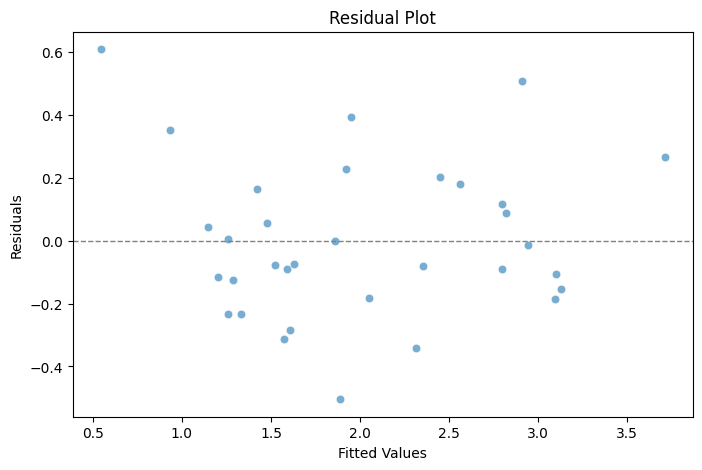

Test  LM Statistic   p-value
0  Breusch-Pagan      8.066366  0.089177
0          White     18.124645  0.152844

In [36]:
# 1. Residual Plot (Visual Check)
residuals_model_all_log_wo_setsize = model_all_log_wo_setsize.resid
fitted_values_model_all_log_wo_setsize = model_all_log_wo_setsize.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_model_all_log_wo_setsize, y=residuals_model_all_log_wo_setsize, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Breusch-Pagan Test
bp_test_model_all_log_wo_setsize = sms.het_breuschpagan(residuals_model_all_log_wo_setsize, X_all_log_wo_setsize)
bp_test_results_model_all_log_wo_setsize = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test_model_all_log_wo_setsize[0]],
    "p-value": [bp_test_model_all_log_wo_setsize[1]]
})

# 3. White's Test
white_test_model_all_log_wo_setsize = sms.het_white(residuals_model_all_log_wo_setsize, X_all_log_wo_setsize)
white_test_results_model_all_log_wo_setsize = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test_model_all_log_wo_setsize[0]],
    "p-value": [white_test_model_all_log_wo_setsize[1]]
})

# Combine results
heteroskedasticity_results_model_all_log_wo_setsize = pd.concat([bp_test_results_model_all_log_wo_setsize, white_test_results_model_all_log_wo_setsize])

heteroskedasticity_results_model_all_log_wo_setsize

### ...not the best... (lower R2 - but just by 3.6%... e.g.) keep just the two good ones. the one with dropped set_size and log(EV), and one with set_size and all logged vars.
#### either way, the EV and top5avg are ***ALWAYS*** significant and positive and have consistent coefficients..

-------

## Bootstrap of the two selected models to compare and get CIs:

#### first model:

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Number of bootstrap iterations
n_bootstraps = 1000

# Store coefficients and R² values
bootstrap_coefs = []
bootstrap_r2 = []

# Define target and predictors
y_log = cross_section_final["log_booster_price"]
X_full = cross_section_final[["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_full = sm.add_constant(X_full)

# Bootstrap loop
for _ in range(n_bootstraps):
    sample_indices = np.random.choice(X_full.index, size=len(X_full), replace=True)
    X_sample = X_full.loc[sample_indices]
    y_sample = y_log.loc[sample_indices]
    
    model_bs = sm.OLS(y_sample, X_sample).fit()
    bootstrap_coefs.append(model_bs.params.values)
    bootstrap_r2.append(model_bs.rsquared)

# Convert to DataFrame
bootstrap_df = pd.DataFrame(bootstrap_coefs, columns=X_full.columns)

# Summary stats + bootstrap p-values
def bootstrap_pval(series):
    # Two-tailed: count how many times the coefficient is as extreme or more extreme than 0
    return 2 * min(
        (series < 0).mean(),
        (series > 0).mean()
    )

summary_table = bootstrap_df.describe(percentiles=[0.025, 0.975]).T[
    ["mean", "std", "2.5%", "97.5%"]
]
summary_table.columns = ["Mean", "Std. Dev.", "2.5% CI", "97.5% CI"]
summary_table["Bootstrap p-value"] = bootstrap_df.apply(bootstrap_pval)

# Add R² summary as a new row
r2_mean = np.mean(bootstrap_r2)
r2_std = np.std(bootstrap_r2)
r2_ci = np.percentile(bootstrap_r2, [2.5, 97.5])

summary_table.loc["R-squared"] = [r2_mean, r2_std, r2_ci[0], r2_ci[1], "–"]

summary_table


Mean  Std. Dev.   2.5% CI  97.5% CI Bootstrap p-value
const               0.149884   0.080128 -0.010691  0.305013             0.066
log_expected_value  0.835648   0.099509  0.628119  1.030603               0.0
avg_top_5_price     0.002771   0.000563  0.001768  0.004244               0.0
set_age             0.159532   0.017155  0.127489  0.195336               0.0
is_special_set      0.186437   0.102120 -0.031221  0.373248             0.078
R-squared           0.958655   0.014301  0.925126  0.981400                 –

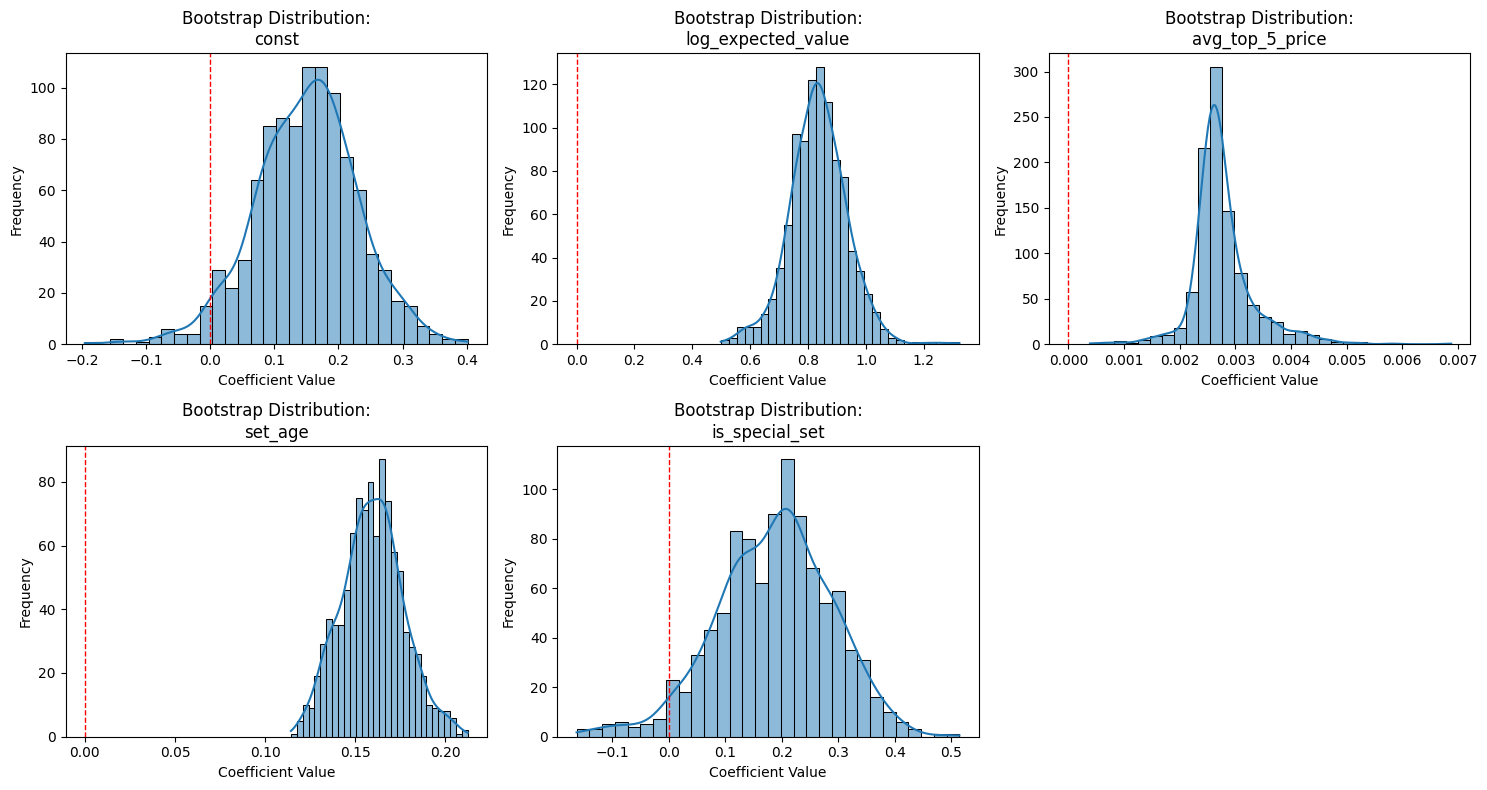

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(bootstrap_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(bootstrap_df[col], bins=30, kde=True)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Bootstrap Distribution:\n{col}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### second model:

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Log transformations (if not already done)
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])
cross_section_final["log_set_size"] = np.log(cross_section_final["set_size"])

# Target and predictors
y_log = cross_section_final["log_booster_price"]
X_log_all = cross_section_final[[
    "log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"
]]
X_log_all = sm.add_constant(X_log_all)

# Bootstrap setup
n_bootstraps = 1000
bootstrap_coefs_all = []
bootstrap_r2_all = []

for _ in range(n_bootstraps):
    sample_idx = np.random.choice(X_log_all.index, size=len(X_log_all), replace=True)
    X_sample = X_log_all.loc[sample_idx]
    y_sample = y_log.loc[sample_idx]
    
    model = sm.OLS(y_sample, X_sample).fit()
    bootstrap_coefs_all.append(model.params.values)
    bootstrap_r2_all.append(model.rsquared)

# Convert to DataFrame
bootstrap_df_all = pd.DataFrame(bootstrap_coefs_all, columns=X_log_all.columns)

# Function to calculate bootstrap p-values
def bootstrap_pval(series):
    return 2 * min((series < 0).mean(), (series > 0).mean())

# Summary of coefficients
summary_table_all = bootstrap_df_all.describe(percentiles=[0.025, 0.975]).T[
    ["mean", "std", "2.5%", "97.5%"]
]
summary_table_all.columns = ["Mean", "Std. Dev.", "2.5% CI", "97.5% CI"]
summary_table_all["Bootstrap p-value"] = bootstrap_df_all.apply(bootstrap_pval)

# Add R² row
r2_mean = np.mean(bootstrap_r2_all)
r2_std = np.std(bootstrap_r2_all)
r2_ci = np.percentile(bootstrap_r2_all, [2.5, 97.5])
summary_table_all.loc["R-squared"] = [r2_mean, r2_std, r2_ci[0], r2_ci[1], "–"]

# Display result
summary_table_all



Mean  Std. Dev.   2.5% CI  97.5% CI Bootstrap p-value
const                2.549514   1.038806  0.463613  4.476180             0.018
log_expected_value   0.926203   0.117944  0.687455  1.155565               0.0
log_avg_top_5_price  0.245744   0.063009  0.116433  0.348042               0.0
log_set_age          0.288760   0.064783  0.203143  0.428017               0.0
log_set_size        -0.545823   0.186883 -0.894073 -0.170842             0.004
is_special_set      -0.117195   0.139689 -0.396633  0.146571              0.41
R-squared            0.950164   0.015887  0.916529  0.978049                 –

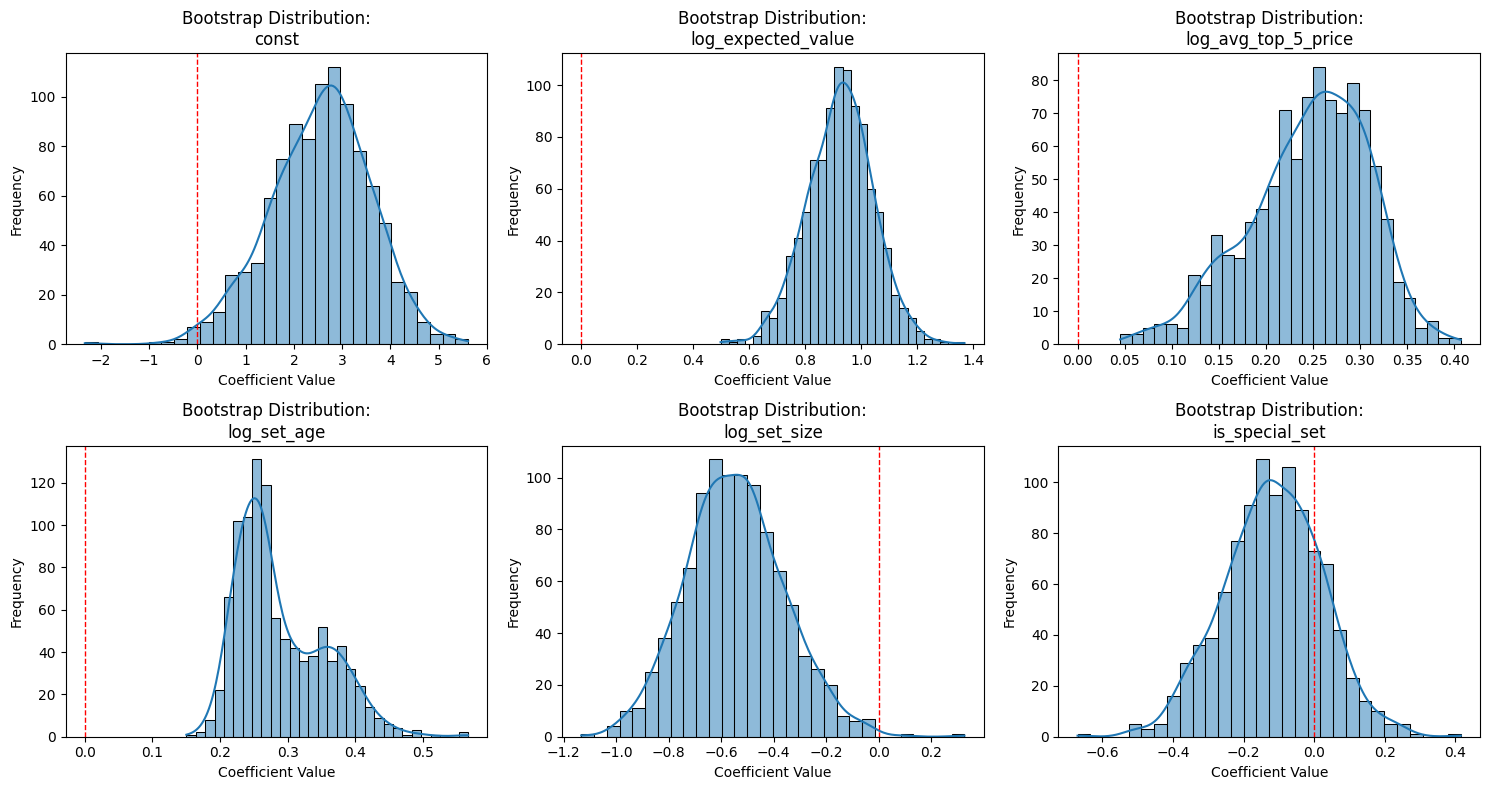

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(bootstrap_df_all.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(bootstrap_df_all[col], bins=30, kde=True)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Bootstrap Distribution:\n{col}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Interestingly, the bootstrapped coefficient distribution for \textit{log_set_age} appears slightly bimodal, which may suggest that the influence of set age varies across different subsets of the data — possibly indicating different strength of tht effect between newer and older expansions, or the influence of potential collinearity witht the log_set_size (which was added to the model, compared to the previous one).

### just try without the is_special_set:

In [41]:
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])
cross_section_final["log_set_size"] = np.log(cross_section_final["set_size"])

X_log_all_wo_is_special = cross_section_final[["log_expected_value", "log_avg_top_5_price", "log_set_size", "log_set_age"]]
X_log_all_wo_is_special = sm.add_constant(X_log_all_wo_is_special)

model_log_all_wo_is_special = sm.OLS(y_log, X_log_all_wo_is_special).fit()
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price (wo is_special_set dummy)###")
print(model_log_all_wo_is_special.summary())



### Log Booster Price + Log Expected Value + Log Avg Top 5 Price (wo is_special_set dummy)###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.54e-16
Time:                        08:28:59   Log-Likelihood:                 5.9500
No. Observations:                  33   AIC:                            -1.900
Df Residuals:                      28   BIC:                             5.583
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

#### -> interestingly - there is a drop of R2 of 0.004 and drop of adj. R2 of 0.002.. so, is_special_set indeed does not seem to play a role.. 

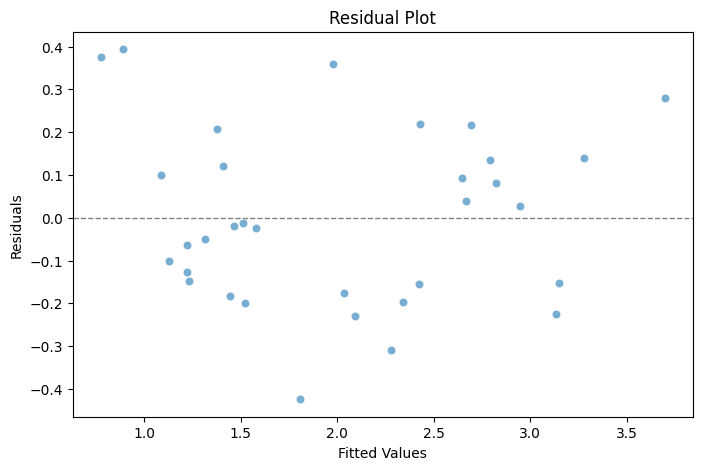

Test  LM Statistic   p-value
0  Breusch-Pagan      1.902167  0.753747
0          White     16.435919  0.287484

In [42]:
# 1. Residual Plot (Visual Check)
residuals_model_all_log_wo_is_special = model_log_all_wo_is_special.resid
fitted_values_model_all_log_wo_is_special = model_log_all_wo_is_special.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_model_all_log_wo_is_special, y=residuals_model_all_log_wo_is_special, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Breusch-Pagan Test
bp_test_model_all_log_wo_is_special = sms.het_breuschpagan(residuals_model_all_log_wo_is_special, X_log_all_wo_is_special)
bp_test_results_model_all_log_wo_is_special = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test_model_all_log_wo_is_special[0]],
    "p-value": [bp_test_model_all_log_wo_is_special[1]]
})

# 3. White's Test
white_test_model_all_log_wo_is_special = sms.het_white(residuals_model_all_log_wo_is_special, X_log_all_wo_is_special)
white_test_results_model_all_log_wo_is_special = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test_model_all_log_wo_is_special[0]],
    "p-value": [white_test_model_all_log_wo_is_special[1]]
})

# Combine results
heteroskedasticity_results_model_all_log_wo_is_special = pd.concat([bp_test_results_model_all_log_wo_is_special, white_test_results_model_all_log_wo_is_special])

heteroskedasticity_results_model_all_log_wo_is_special

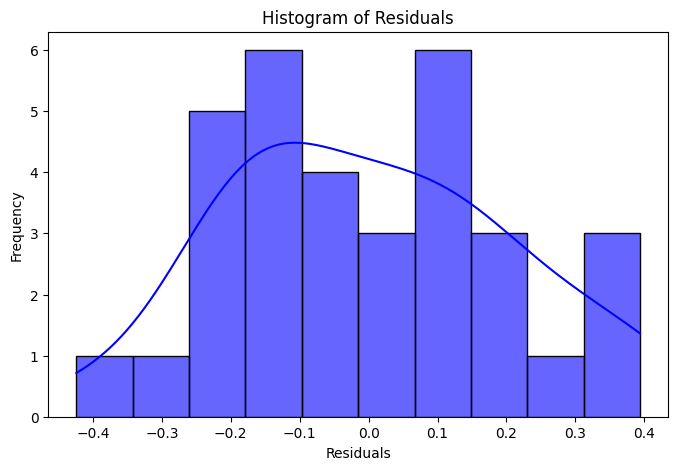

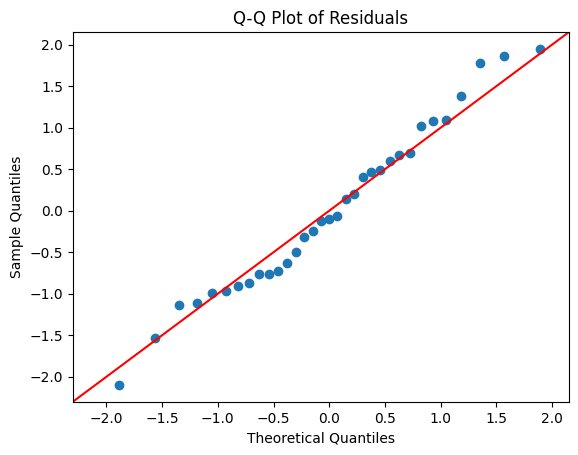


### Shapiro-Wilk Test for Normality ###
Statistic: 0.974611560323789, p-value: 0.6169485296327584

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.09777975898866759, p-value: 0.8803632550810202

### Jarque-Bera Test for Normality ###
Statistic: 0.8070297471387853, p-value: 0.667968091655341


In [43]:
# Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(model_log_all_wo_is_special.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot for Normality Check
sm.qqplot(model_log_all_wo_is_special.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test1 = stats.shapiro(model_log_all_wo_is_special.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test1.statistic}, p-value: {shapiro_test1.pvalue}")

# Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test1 = stats.kstest(model_log_all_wo_is_special.resid, 'norm', args=(model_log_all_wo_is_special.resid.mean(), model_log_all_wo_is_special.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test1.statistic}, p-value: {ks_test1.pvalue}")

# Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test1 = stats.jarque_bera(model_log_all_wo_is_special.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test1.statistic}, p-value: {jb_test1.pvalue}")


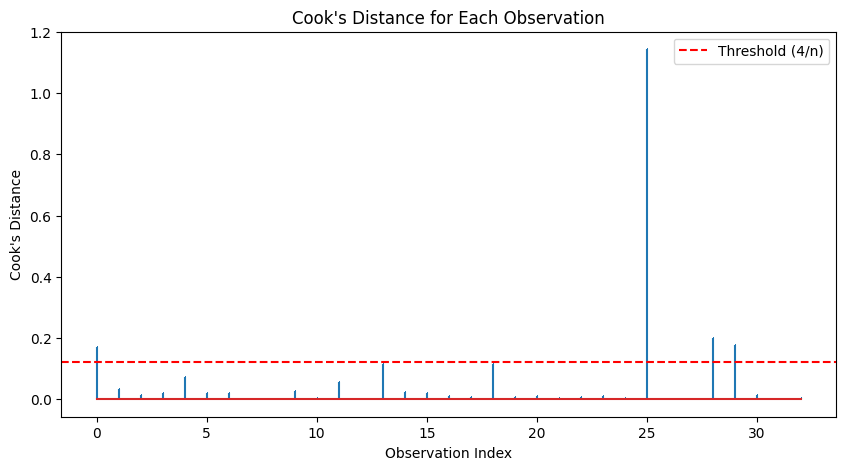


Top 3 Most Influential Observations:
    observation   cooks_d  residual
25           25  1.143541  0.376505
28           28  0.200826  0.393750
29           29  0.177813  0.220094

Top 4 Most Influential Observations with Set Names:
    observation                set_name   cooks_d  residual
25           25      sv07-stellar-crown  1.143541  0.376505
28           28  swsh03-darkness-ablaze  0.200826  0.393750
29           29   swsh07-evolving-skies  0.177813  0.220094
0             0          champions-path  0.171634 -0.195956


In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get influence data from your fitted model
influence3 = model_log_all_wo_is_special.get_influence()

# Get Cook's distance
cooks_d, _ = influence3.cooks_distance

# Plot Cook’s distance
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(4 / len(cooks_d), color='red', linestyle='--', label="Threshold (4/n)")
plt.legend()
plt.show()


# Show top 3 most influential observations
cooks_df3 = pd.DataFrame({
    "observation": np.arange(len(cooks_d)),
    "cooks_d": cooks_d,
    "residual": model_log_all_wo_is_special.resid.values
})
top_influential3 = cooks_df3.sort_values("cooks_d", ascending=False).head(3)
print("\nTop 3 Most Influential Observations:")
print(top_influential3)

# Add set_name to the cooks_df DataFrame
cooks_df3["set_name"] = cross_section_final["set_name"].values

# Sort and show the top 3 most influential observations
top_influential3 = cooks_df3.sort_values("cooks_d", ascending=False).head(4)
print("\nTop 4 Most Influential Observations with Set Names:")
print(top_influential3[["observation", "set_name", "cooks_d", "residual"]])



### bootstrap of the model3:

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Log transformations (if not already done)
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])
cross_section_final["log_set_size"] = np.log(cross_section_final["set_size"])

# Target and predictors
y_log = cross_section_final["log_booster_price"]
X_log_all_wo_is_special = cross_section_final[["log_expected_value", "log_avg_top_5_price", "log_set_size", "log_set_age"]]
X_log_all_wo_is_special = sm.add_constant(X_log_all_wo_is_special)

# Bootstrap setup
n_bootstraps = 1000
bootstrap_coefs_all2 = []
bootstrap_r2_all2 = []

for _ in range(n_bootstraps):
    sample_idx = np.random.choice(X_log_all_wo_is_special.index, size=len(X_log_all_wo_is_special), replace=True)
    X_sample = X_log_all_wo_is_special.loc[sample_idx]
    y_sample = y_log.loc[sample_idx]
    
    model = sm.OLS(y_sample, X_sample).fit()
    bootstrap_coefs_all2.append(model.params.values)
    bootstrap_r2_all2.append(model.rsquared)

# Convert to DataFrame
bootstrap_df_all2 = pd.DataFrame(bootstrap_coefs_all2, columns=X_log_all_wo_is_special.columns)

# Function to calculate bootstrap p-values
def bootstrap_pval(series):
    return 2 * min((series < 0).mean(), (series > 0).mean())

# Summary of coefficients
summary_table_all2 = bootstrap_df_all2.describe(percentiles=[0.025, 0.975]).T[
    ["mean", "std", "2.5%", "97.5%"]
]
summary_table_all2.columns = ["Mean", "Std. Dev.", "2.5% CI", "97.5% CI"]
summary_table_all2["Bootstrap p-value"] = bootstrap_df_all2.apply(bootstrap_pval)

# Add R² row
r2_mean2 = np.mean(bootstrap_r2_all2)
r2_std2 = np.std(bootstrap_r2_all2)
r2_ci2 = np.percentile(bootstrap_r2_all2, [2.5, 97.5])
summary_table_all2.loc["R-squared"] = [r2_mean2, r2_std2, r2_ci2[0], r2_ci2[1], "–"]

# Display result
summary_table_all2



Mean  Std. Dev.   2.5% CI  97.5% CI Bootstrap p-value
const                2.197243   0.898316  0.415356  3.987655             0.014
log_expected_value   0.893042   0.122593  0.643927  1.141413               0.0
log_avg_top_5_price  0.252281   0.065379  0.102510  0.367535               0.0
log_set_size        -0.483495   0.160086 -0.817127 -0.188998             0.008
log_set_age          0.299224   0.065496  0.209626  0.441381               0.0
R-squared            0.944517   0.017185  0.906459  0.973256                 –

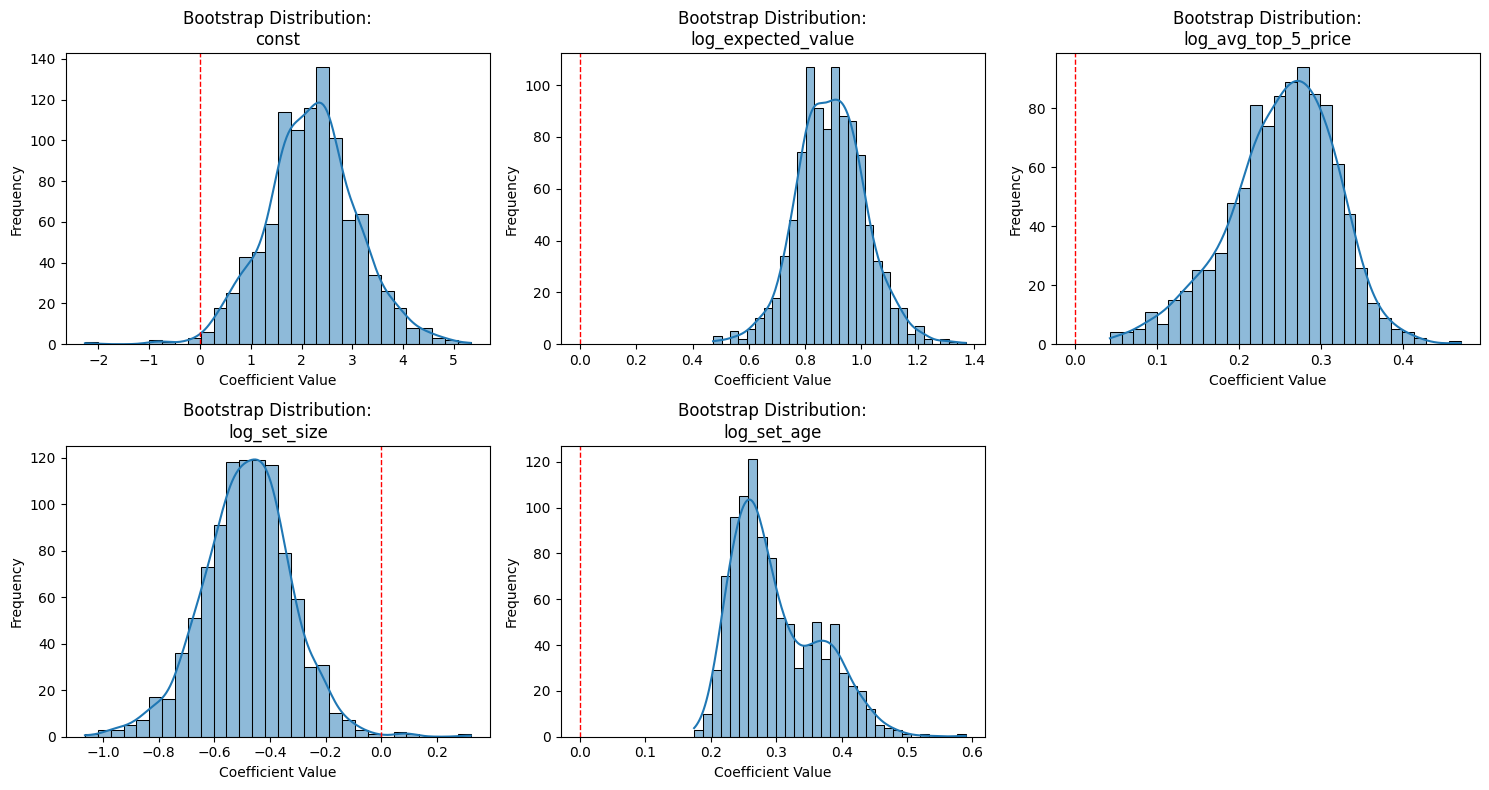

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(bootstrap_df_all2.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(bootstrap_df_all2[col], bins=30, kde=True)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Bootstrap Distribution:\n{col}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### what if...

In [47]:
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])
cross_section_final["log_set_size"] = np.log(cross_section_final["set_size"])

X_wo_is_special = cross_section_final[["log_expected_value", "avg_top_5_price", "set_size", "set_age"]]
X_wo_is_special = sm.add_constant(X_wo_is_special)

model_wo_is_special = sm.OLS(y_log, X_wo_is_special).fit()
print("\n### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###")
print(model_wo_is_special.summary())



### Log Booster Price + Log Expected Value + Log Avg Top 5 Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           4.92e-18
Time:                        08:29:16   Log-Likelihood:                 10.618
No. Observations:                  33   AIC:                            -11.24
Df Residuals:                      28   BIC:                            -3.754
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### -> no, still issues, probably due to the collinearity of set_age and set_size..

----------

## NOW, the ELASTIC NET:

#### 5-fold CV - model 1:

In [51]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define predictors and target for the selected model
features_enet = ["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]
X_enet = cross_section_final[features_enet]
y_enet = cross_section_final["log_booster_price"]

# Create pipeline: Standardize predictors + Elastic Net
elastic_net_model = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        cv=5,
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0],
        n_alphas=100,
        random_state=42
    )
)

# Fit the model
elastic_net_model.fit(X_enet, y_enet)

# Extract fitted ElasticNetCV from the pipeline
enet = elastic_net_model.named_steps['elasticnetcv']

# Output best parameters
print(f"Best alpha (regularization strength): {enet.alpha_}")
print(f"Best l1_ratio (balance Lasso:Ridge): {enet.l1_ratio_}\n")

# Output coefficients
print("Elastic Net Coefficients:")
for feature, coef in zip(["const"] + features_enet, [enet.intercept_] + list(enet.coef_)):
    print(f"{feature}: {coef:.4f}")

# Optional: Evaluate performance
y_pred_enet = elastic_net_model.predict(X_enet)
print("\nElastic Net R²:", r2_score(y_enet, y_pred_enet))
print("Elastic Net MAE:", mean_absolute_error(y_enet, y_pred_enet))
print("Elastic Net MSE:", mean_squared_error(y_enet, y_pred_enet))

Best alpha (regularization strength): 0.001368053139336664
Best l1_ratio (balance Lasso:Ridge): 0.5

Elastic Net Coefficients:
const: 2.0121
log_expected_value: 0.3938
avg_top_5_price: 0.2317
set_age: 0.3864
is_special_set: 0.0776

Elastic Net R²: 0.9534915730179917
Elastic Net MAE: 0.1402048193878679
Elastic Net MSE: 0.029817246610435416


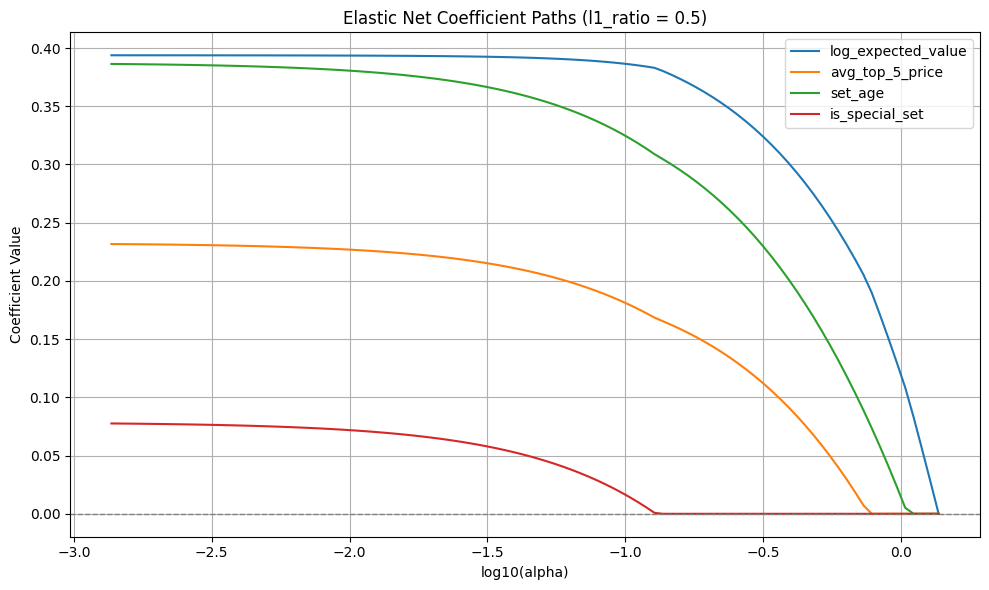

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler

# Define features and target
features_enet = ["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]
X_enet = cross_section_final[features_enet]
y_enet = cross_section_final["log_booster_price"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enet)

# Use best l1_ratio from ElasticNetCV
best_l1_ratio = enet.l1_ratio_

# Compute the regularization path WITHOUT fit_intercept (it's not accepted here!)
alphas_enet, coefs_enet, _ = enet_path(X_scaled, y_enet, l1_ratio=best_l1_ratio)

# Plot
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features_enet):
    plt.plot(np.log10(alphas_enet), coefs_enet[i], label=feature)

plt.xlabel("log10(alpha)")
plt.ylabel("Coefficient Value")
plt.title(f"Elastic Net Coefficient Paths (l1_ratio = {best_l1_ratio})")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### LOOCV - Model 1:

In [53]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import LeaveOneOut

# Define predictors and target
features_enet = ["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]
X_enet = cross_section_final[features_enet]
y_enet = cross_section_final["log_booster_price"]

# Create pipeline: Standardize predictors + Elastic Net with LOOCV
elastic_net_model_loocv = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        cv=LeaveOneOut(),
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0],
        n_alphas=100,
        random_state=42
    )
)

# Fit the model
elastic_net_model_loocv.fit(X_enet, y_enet)

# Extract fitted ElasticNetCV from the pipeline
enet_loocv = elastic_net_model_loocv.named_steps['elasticnetcv']

# Output best parameters
print(f"Best alpha (LOOCV): {enet_loocv.alpha_}")
print(f"Best l1_ratio (LOOCV): {enet_loocv.l1_ratio_}\n")

# Output coefficients
print("Elastic Net Coefficients (LOOCV):")
for feature, coef in zip(["const"] + features_enet, [enet_loocv.intercept_] + list(enet_loocv.coef_)):
    print(f"{feature}: {coef:.4f}")

# Evaluate performance on training data
y_pred_loocv = elastic_net_model_loocv.predict(X_enet)
print("\nElastic Net R² (LOOCV):", r2_score(y_enet, y_pred_loocv))
print("Elastic Net MAE (LOOCV):", mean_absolute_error(y_enet, y_pred_loocv))
print("Elastic Net MSE (LOOCV):", mean_squared_error(y_enet, y_pred_loocv))


Best alpha (LOOCV): 0.01816834614906988
Best l1_ratio (LOOCV): 0.1

Elastic Net Coefficients (LOOCV):
const: 2.0121
log_expected_value: 0.3904
avg_top_5_price: 0.2295
set_age: 0.3806
is_special_set: 0.0749

Elastic Net R² (LOOCV): 0.9533247012697376
Elastic Net MAE (LOOCV): 0.14143401028715633
Elastic Net MSE (LOOCV): 0.029924230578565216


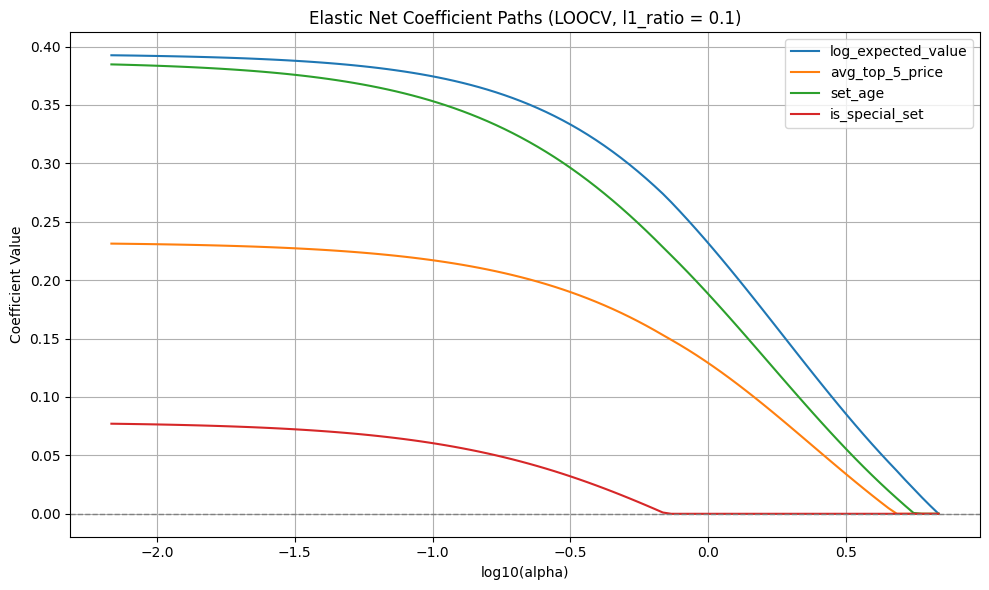

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler

# Define features and target
features_enet = ["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]
X_enet = cross_section_final[features_enet]
y_enet = cross_section_final["log_booster_price"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enet)

# Use best l1_ratio from the LOOCV-fitted model
best_l1_ratio = enet_loocv.l1_ratio_

# Compute the regularization path (no fit_intercept allowed!)
alphas_enet, coefs_enet, _ = enet_path(X_scaled, y_enet, l1_ratio=best_l1_ratio)

# Plot the coefficient paths
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features_enet):
    plt.plot(np.log10(alphas_enet), coefs_enet[i], label=feature)

plt.xlabel("log10(alpha)")
plt.ylabel("Coefficient Value")
plt.title(f"Elastic Net Coefficient Paths (LOOCV, l1_ratio = {best_l1_ratio})")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### visual comparison of the two methods:

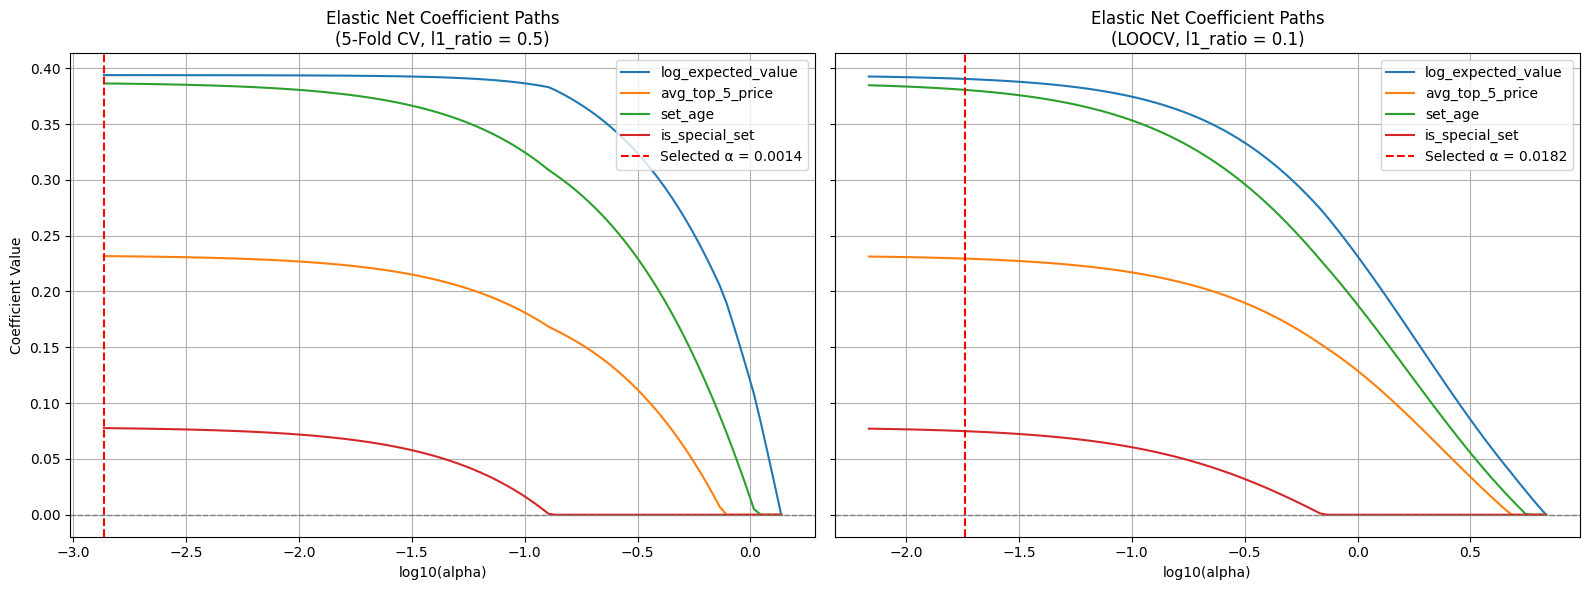

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler

# Features and target
features_enet = ["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]
X_enet = cross_section_final[features_enet]
y_enet = cross_section_final["log_booster_price"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enet)

# Best l1_ratios and alpha values
l1_ratio_5cv = enet.l1_ratio_
alpha_5cv = enet.alpha_

l1_ratio_loocv = enet_loocv.l1_ratio_
alpha_loocv = enet_loocv.alpha_

# Compute paths
alphas_5cv, coefs_5cv, _ = enet_path(X_scaled, y_enet, l1_ratio=l1_ratio_5cv)
alphas_loocv, coefs_loocv, _ = enet_path(X_scaled, y_enet, l1_ratio=l1_ratio_loocv)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 5-Fold CV
for i, feature in enumerate(features_enet):
    axs[0].plot(np.log10(alphas_5cv), coefs_5cv[i], label=feature)
axs[0].axvline(np.log10(alpha_5cv), color='red', linestyle='--', label=f"Selected α = {alpha_5cv:.4f}")
axs[0].set_title(f"Elastic Net Coefficient Paths\n(5-Fold CV, l1_ratio = {l1_ratio_5cv})")
axs[0].set_xlabel("log10(alpha)")
axs[0].set_ylabel("Coefficient Value")
axs[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[0].legend()
axs[0].grid(True)

# Plot for LOOCV
for i, feature in enumerate(features_enet):
    axs[1].plot(np.log10(alphas_loocv), coefs_loocv[i], label=feature)
axs[1].axvline(np.log10(alpha_loocv), color='red', linestyle='--', label=f"Selected α = {alpha_loocv:.4f}")
axs[1].set_title(f"Elastic Net Coefficient Paths\n(LOOCV, l1_ratio = {l1_ratio_loocv})")
axs[1].set_xlabel("log10(alpha)")
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


### El. Net for the second:

In [56]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define predictors and target for the selected model (log-log-log)
features_enet_log_all = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]
X_enet_log_all = cross_section_final[features_enet_log_all]
y_enet_log_all = cross_section_final["log_booster_price"]

# Create pipeline: Standardize predictors + Elastic Net
elastic_net_model_log_all = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        cv=5,
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0],
        n_alphas=100,
        random_state=42
    )
)

# Fit the model
elastic_net_model_log_all.fit(X_enet_log_all, y_enet_log_all)

# Extract fitted ElasticNetCV from the pipeline
enet_log_all = elastic_net_model_log_all.named_steps['elasticnetcv']

# Output best parameters
print(f"Best alpha (regularization strength): {enet_log_all.alpha_}")
print(f"Best l1_ratio (balance Lasso:Ridge): {enet_log_all.l1_ratio_}\n")

# Output coefficients
print("Elastic Net Coefficients:")
for feature, coef in zip(["const"] + features_enet_log_all, [enet_log_all.intercept_] + list(enet_log_all.coef_)):
    print(f"{feature}: {coef:.4f}")

# Optional: Evaluate performance
y_pred_enet_log_all = elastic_net_model_log_all.predict(X_enet_log_all)
print("\nElastic Net R²:", r2_score(y_enet_log_all, y_pred_enet_log_all))
print("Elastic Net MAE:", mean_absolute_error(y_enet_log_all, y_pred_enet_log_all))
print("Elastic Net MSE:", mean_squared_error(y_enet_log_all, y_pred_enet_log_all))


Best alpha (regularization strength): 0.08432999261073446
Best l1_ratio (balance Lasso:Ridge): 0.1

Elastic Net Coefficients:
const: 2.0121
log_expected_value: 0.3988
log_avg_top_5_price: 0.2112
log_set_age: 0.2767
log_set_size: -0.1524
is_special_set: -0.0332

Elastic Net R²: 0.9366738404328144
Elastic Net MAE: 0.17902513734141245
Elastic Net MSE: 0.040599345951584404


In [57]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define predictors and target for the selected model (log-log-log)
features_enet_log_all = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]
X_enet_log_all = cross_section_final[features_enet_log_all]
y_enet_log_all = cross_section_final["log_booster_price"]

# Create pipeline: Standardize predictors + Elastic Net using LOOCV
elastic_net_model_log_all_loocv = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        cv=LeaveOneOut(),
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0],
        n_alphas=100,
        random_state=42
    )
)

# Fit the model
elastic_net_model_log_all_loocv.fit(X_enet_log_all, y_enet_log_all)

# Extract fitted ElasticNetCV from the pipeline
enet_log_all_loocv = elastic_net_model_log_all_loocv.named_steps['elasticnetcv']

# Output best parameters
print(f"Best alpha (regularization strength): {enet_log_all_loocv.alpha_}")
print(f"Best l1_ratio (balance Lasso:Ridge): {enet_log_all_loocv.l1_ratio_}\n")

# Output coefficients
print("Elastic Net Coefficients (LOOCV):")
for feature, coef in zip(["const"] + features_enet_log_all, [enet_log_all_loocv.intercept_] + list(enet_log_all_loocv.coef_)):
    print(f"{feature}: {coef:.4f}")

# Optional: Evaluate performance
y_pred_enet_log_all_loocv = elastic_net_model_log_all_loocv.predict(X_enet_log_all)
print("\nElastic Net (LOOCV) R²:", r2_score(y_enet_log_all, y_pred_enet_log_all_loocv))
print("Elastic Net (LOOCV) MAE:", mean_absolute_error(y_enet_log_all, y_pred_enet_log_all_loocv))
print("Elastic Net (LOOCV) MSE:", mean_squared_error(y_enet_log_all, y_pred_enet_log_all_loocv))


Best alpha (regularization strength): 0.07334592696395134
Best l1_ratio (balance Lasso:Ridge): 0.1

Elastic Net Coefficients (LOOCV):
const: 2.0121
log_expected_value: 0.4031
log_avg_top_5_price: 0.2113
log_set_age: 0.2781
log_set_size: -0.1550
is_special_set: -0.0361

Elastic Net (LOOCV) R²: 0.9375440062740152
Elastic Net (LOOCV) MAE: 0.17736252868021918
Elastic Net (LOOCV) MSE: 0.04004146964480028


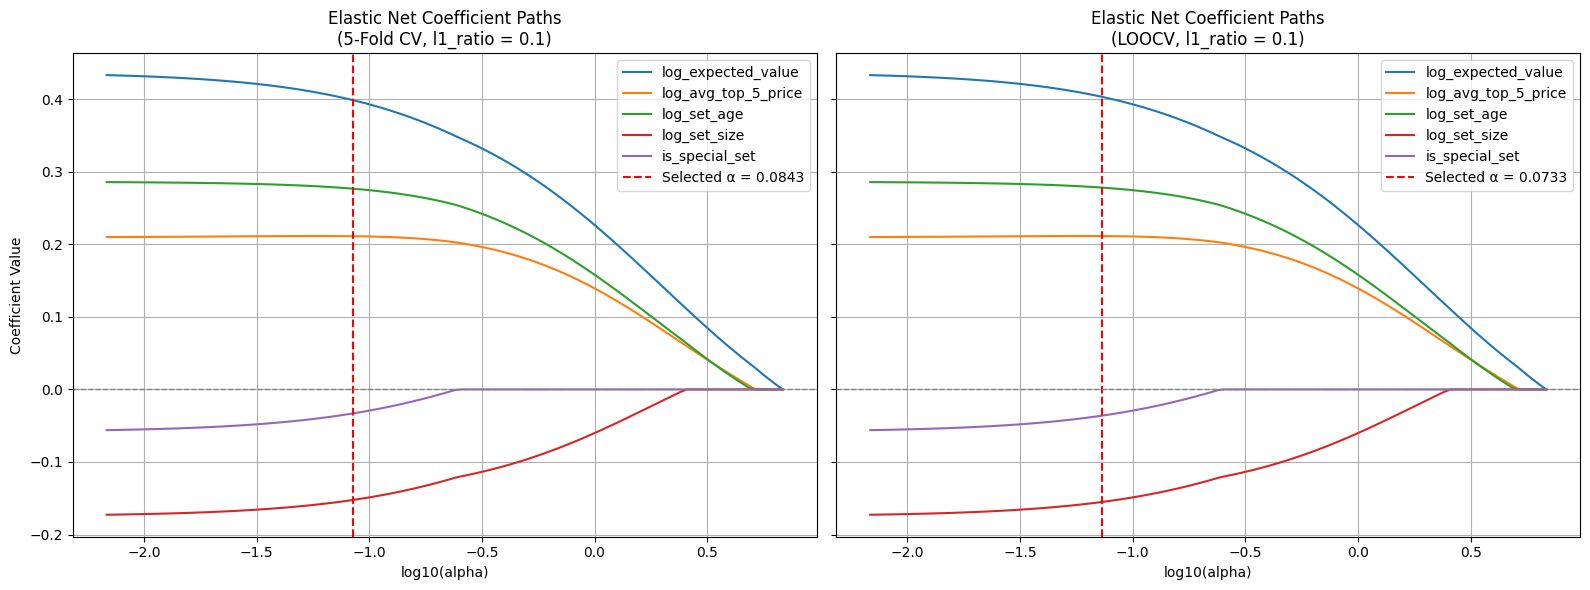

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler

# Features and target for the log-log-log model
features_enet_log_all = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]
X_enet_log_all = cross_section_final[features_enet_log_all]
y_enet_log_all = cross_section_final["log_booster_price"]

# Scale features
scaler = StandardScaler()
X_scaled_log_all = scaler.fit_transform(X_enet_log_all)

# Retrieve best l1_ratio and alpha values from fitted models
l1_ratio_5cv = enet_log_all.l1_ratio_
alpha_5cv = enet_log_all.alpha_

l1_ratio_loocv = enet_log_all_loocv.l1_ratio_
alpha_loocv = enet_log_all_loocv.alpha_

# Compute regularization paths
alphas_5cv, coefs_5cv, _ = enet_path(X_scaled_log_all, y_enet_log_all, l1_ratio=l1_ratio_5cv)
alphas_loocv, coefs_loocv, _ = enet_path(X_scaled_log_all, y_enet_log_all, l1_ratio=l1_ratio_loocv)

# Plot paths
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 5-Fold CV Plot
for i, feature in enumerate(features_enet_log_all):
    axs[0].plot(np.log10(alphas_5cv), coefs_5cv[i], label=feature)
axs[0].axvline(np.log10(alpha_5cv), color='red', linestyle='--', label=f"Selected α = {alpha_5cv:.4f}")
axs[0].set_title(f"Elastic Net Coefficient Paths\n(5-Fold CV, l1_ratio = {l1_ratio_5cv})")
axs[0].set_xlabel("log10(alpha)")
axs[0].set_ylabel("Coefficient Value")
axs[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[0].legend()
axs[0].grid(True)

# LOOCV Plot
for i, feature in enumerate(features_enet_log_all):
    axs[1].plot(np.log10(alphas_loocv), coefs_loocv[i], label=feature)
axs[1].axvline(np.log10(alpha_loocv), color='red', linestyle='--', label=f"Selected α = {alpha_loocv:.4f}")
axs[1].set_title(f"Elastic Net Coefficient Paths\n(LOOCV, l1_ratio = {l1_ratio_loocv})")
axs[1].set_xlabel("log10(alpha)")
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


#### -> The Elastic Nest basically selects first the l1 ratio (if it should use more ridge (more shrinking - does not drop vars) - lower l1ratio, or more lasso (more of a variable selection - dropping vars), higher ratio) testing over the 100 different alphas (regularisation strengths - basically how strong the 'shrinking' of the vars is). It loops over the given list of specified l1 ratios, and number of alphas (one can specify) and chooses the best l1 ratio and alpha within, that best generalises to the out-of-sample data.. i.e. it trains on a 'fold' and then tests the out-of-sample forecast on either the 5th fold out of 5 (4, randomly chosen, were used for training) for the 5-fold-Cross-Validation, or, for the Leave-One-Out-Cross-Validation it trains on the 32 observations, then tests it on the 1 remaining, and repeats it 33 times..  

#### -> The combination of l1_ratio and alpha that yields the lowest average out-of-sample error is selected as the optimal regularization setting. For evaluation uses MSE by default.

!!: 'The Leave-One-Out Cross-Validation approach provides a practical and interpretable framework in the context of booster pack valuation: each iteration emulates a real-world scenario where the model is asked to predict the price of a new pack based on all previously observed packs.'

-------

## El. Net for the third model:

#### 5-CV:

In [62]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define predictors and target for the selected model (log-log-log)
features_enet_log_all2 = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size"]
X_enet_log_all2 = cross_section_final[features_enet_log_all2]
y_enet_log_all2 = cross_section_final["log_booster_price"]

# Create pipeline: Standardize predictors + Elastic Net
elastic_net_model_log_all2 = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        cv=5,
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0],
        n_alphas=100,
        random_state=42
    )
)

# Fit the model
elastic_net_model_log_all2.fit(X_enet_log_all2, y_enet_log_all2)

# Extract fitted ElasticNetCV from the pipeline
enet_log_all2 = elastic_net_model_log_all2.named_steps['elasticnetcv']

# Output best parameters
print(f"Best alpha (regularization strength): {enet_log_all2.alpha_}")
print(f"Best l1_ratio (balance Lasso:Ridge): {enet_log_all2.l1_ratio_}\n")

# Output coefficients
print("Elastic Net Coefficients:")
for feature, coef in zip(["const"] + features_enet_log_all2, [enet_log_all2.intercept_] + list(enet_log_all2.coef_)):
    print(f"{feature}: {coef:.4f}")

# Optional: Evaluate performance
y_pred_enet_log_all2 = elastic_net_model_log_all2.predict(X_enet_log_all2)
print("\nElastic Net R²:", r2_score(y_enet_log_all2, y_pred_enet_log_all2))
print("Elastic Net MAE:", mean_absolute_error(y_enet_log_all2, y_pred_enet_log_all2))
print("Elastic Net MSE:", mean_squared_error(y_enet_log_all2, y_pred_enet_log_all2))


Best alpha (regularization strength): 0.1195355856855245
Best l1_ratio (balance Lasso:Ridge): 0.1

Elastic Net Coefficients:
const: 2.0121
log_expected_value: 0.3812
log_avg_top_5_price: 0.2119
log_set_age: 0.2766
log_set_size: -0.1348

Elastic Net R²: 0.9305902451353983
Elastic Net MAE: 0.1856422710189174
Elastic Net MSE: 0.044499629685784095


#### LOOCV:

In [63]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define predictors and target for the selected model (log-log-log)
features_enet_log_all3 = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size"]
X_enet_log_all3 = cross_section_final[features_enet_log_all3]
y_enet_log_all3 = cross_section_final["log_booster_price"]

# Create pipeline: Standardize predictors + Elastic Net using LOOCV
elastic_net_model_log_all_loocv3 = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        cv=LeaveOneOut(),
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0],
        n_alphas=100,
        random_state=42
    )
)

# Fit the model
elastic_net_model_log_all_loocv3.fit(X_enet_log_all3, y_enet_log_all3)

# Extract fitted ElasticNetCV from the pipeline
enet_log_all_loocv3 = elastic_net_model_log_all_loocv3.named_steps['elasticnetcv']

# Output best parameters
print(f"Best alpha (regularization strength): {enet_log_all_loocv3.alpha_}")
print(f"Best l1_ratio (balance Lasso:Ridge): {enet_log_all_loocv3.l1_ratio_}\n")

# Output coefficients
print("Elastic Net Coefficients (LOOCV):")
for feature, coef in zip(["const"] + features_enet_log_all3, [enet_log_all_loocv3.intercept_] + list(enet_log_all_loocv3.coef_)):
    print(f"{feature}: {coef:.4f}")

# Optional: Evaluate performance
y_pred_enet_log_all_loocv3 = elastic_net_model_log_all_loocv3.predict(X_enet_log_all3)
print("\nElastic Net (LOOCV) R²:", r2_score(y_enet_log_all3, y_pred_enet_log_all_loocv3))
print("Elastic Net (LOOCV) MAE:", mean_absolute_error(y_enet_log_all3, y_pred_enet_log_all_loocv3))
print("Elastic Net (LOOCV) MSE:", mean_squared_error(y_enet_log_all3, y_pred_enet_log_all_loocv3))


Best alpha (regularization strength): 0.08432999261073446
Best l1_ratio (balance Lasso:Ridge): 0.1

Elastic Net Coefficients (LOOCV):
const: 2.0121
log_expected_value: 0.3920
log_avg_top_5_price: 0.2138
log_set_age: 0.2834
log_set_size: -0.1389

Elastic Net (LOOCV) R²: 0.9333565927397823
Elastic Net (LOOCV) MAE: 0.1811197595605336
Elastic Net (LOOCV) MSE: 0.042726082952801385


#### comparison of the two:

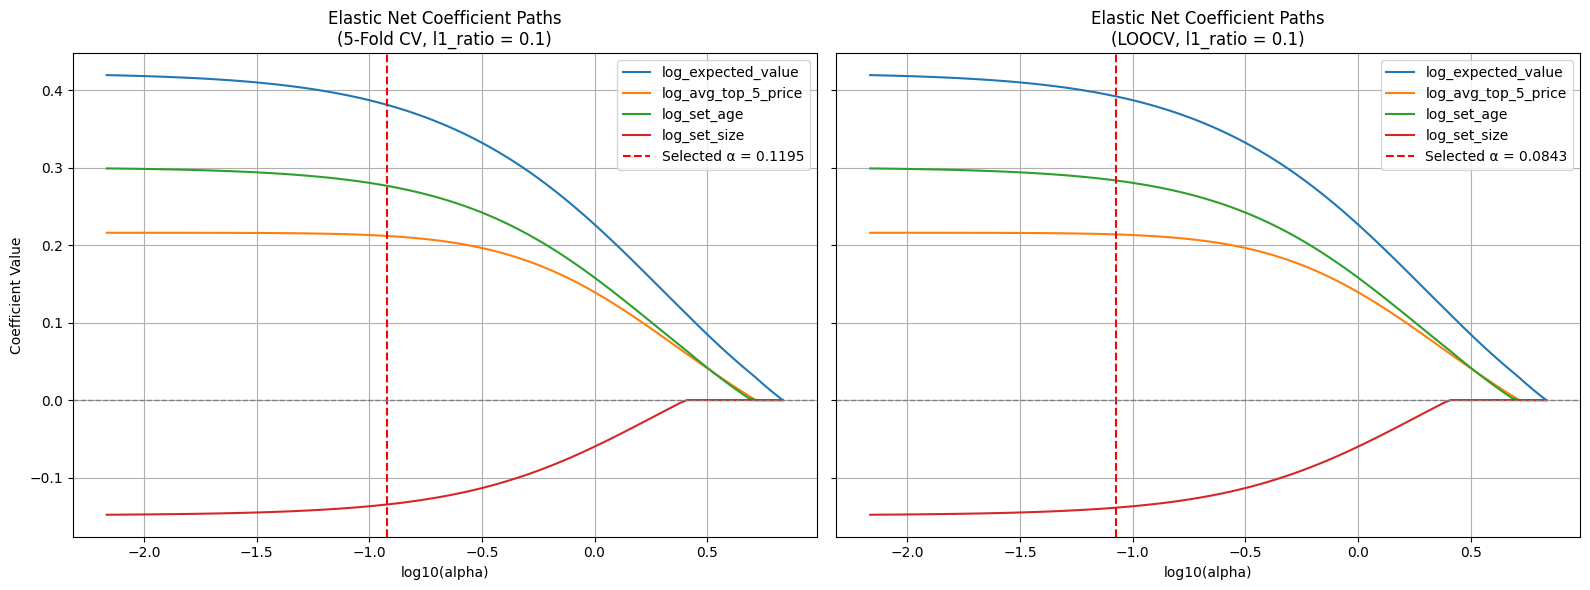

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler

# Features and target for the log-log-log model
features_enet_log_all = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size"]
X_enet_log_all = cross_section_final[features_enet_log_all]
y_enet_log_all = cross_section_final["log_booster_price"]

# Scale features
scaler = StandardScaler()
X_scaled_log_all = scaler.fit_transform(X_enet_log_all)

# Retrieve best l1_ratio and alpha values from fitted models
l1_ratio_5cv = enet_log_all2.l1_ratio_
alpha_5cv = enet_log_all2.alpha_

l1_ratio_loocv = enet_log_all_loocv3.l1_ratio_
alpha_loocv = enet_log_all_loocv3.alpha_

# Compute regularization paths
alphas_5cv, coefs_5cv, _ = enet_path(X_scaled_log_all, y_enet_log_all, l1_ratio=l1_ratio_5cv)
alphas_loocv, coefs_loocv, _ = enet_path(X_scaled_log_all, y_enet_log_all, l1_ratio=l1_ratio_loocv)

# Plot paths
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 5-Fold CV Plot
for i, feature in enumerate(features_enet_log_all):
    axs[0].plot(np.log10(alphas_5cv), coefs_5cv[i], label=feature)
axs[0].axvline(np.log10(alpha_5cv), color='red', linestyle='--', label=f"Selected α = {alpha_5cv:.4f}")
axs[0].set_title(f"Elastic Net Coefficient Paths\n(5-Fold CV, l1_ratio = {l1_ratio_5cv})")
axs[0].set_xlabel("log10(alpha)")
axs[0].set_ylabel("Coefficient Value")
axs[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[0].legend()
axs[0].grid(True)

# LOOCV Plot
for i, feature in enumerate(features_enet_log_all):
    axs[1].plot(np.log10(alphas_loocv), coefs_loocv[i], label=feature)
axs[1].axvline(np.log10(alpha_loocv), color='red', linestyle='--', label=f"Selected α = {alpha_loocv:.4f}")
axs[1].set_title(f"Elastic Net Coefficient Paths\n(LOOCV, l1_ratio = {l1_ratio_loocv})")
axs[1].set_xlabel("log10(alpha)")
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Finally, partial R2 comparison:

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Ensure logs exist
cross_section_final["log_expected_value"] = np.log(cross_section_final["expected_value"])
cross_section_final["log_set_age"] = np.log(cross_section_final["set_age"])
cross_section_final["log_set_size"] = np.log(cross_section_final["set_size"])

# Dependent variable
y_log = cross_section_final["log_booster_price"]

# Define models
models = {}

# Model 1: Log EV + avg_top_5_price + set_age + is_special_set
X1 = cross_section_final[["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X1 = sm.add_constant(X1)
models["Model 1"] = sm.OLS(y_log, X1).fit()

# Model 2: Log EV + log avg_top_5_price + log set_age + log set_size + is_special_set
X2 = cross_section_final[["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]]
X2 = sm.add_constant(X2)
models["Model 2"] = sm.OLS(y_log, X2).fit()

# Model 3: Same as Model 2, but without is_special_set
X3 = cross_section_final[["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size"]]
X3 = sm.add_constant(X3)
models["Model 3"] = sm.OLS(y_log, X3).fit()

# Function to compute partial R²
def compute_partial_r2(model, X, y):
    partial_r2s = {}
    full_r2 = model.rsquared

    for var in X.columns:
        if var == 'const':
            continue
        X_reduced = X.drop(columns=[var])
        reduced_model = sm.OLS(y, X_reduced).fit()
        reduced_r2 = reduced_model.rsquared
        partial_r2s[var] = full_r2 - reduced_r2

    return partial_r2s

# Collect and print partial R²s
all_partial_r2s = {}

for name, model in models.items():
    print(f"\nPartial R² for {name}:")
    X = model.model.exog
    X_names = model.model.exog_names
    X_df = pd.DataFrame(X, columns=X_names)
    partial_r2s = compute_partial_r2(model, X_df, y_log)
    all_partial_r2s[name] = partial_r2s
    for var, r2 in partial_r2s.items():
        print(f"{var}: {r2:.4f}")



Partial R² for Model 1:
log_expected_value: 0.1322
avg_top_5_price: 0.0551
set_age: 0.1884
is_special_set: 0.0085

Partial R² for Model 2:
log_expected_value: 0.1316
log_avg_top_5_price: 0.0336
log_set_age: 0.0980
log_set_size: 0.0339
is_special_set: 0.0042

Partial R² for Model 3:
log_expected_value: 0.1274
log_avg_top_5_price: 0.0359
log_set_age: 0.1144
log_set_size: 0.0300


### Quantile Regression:

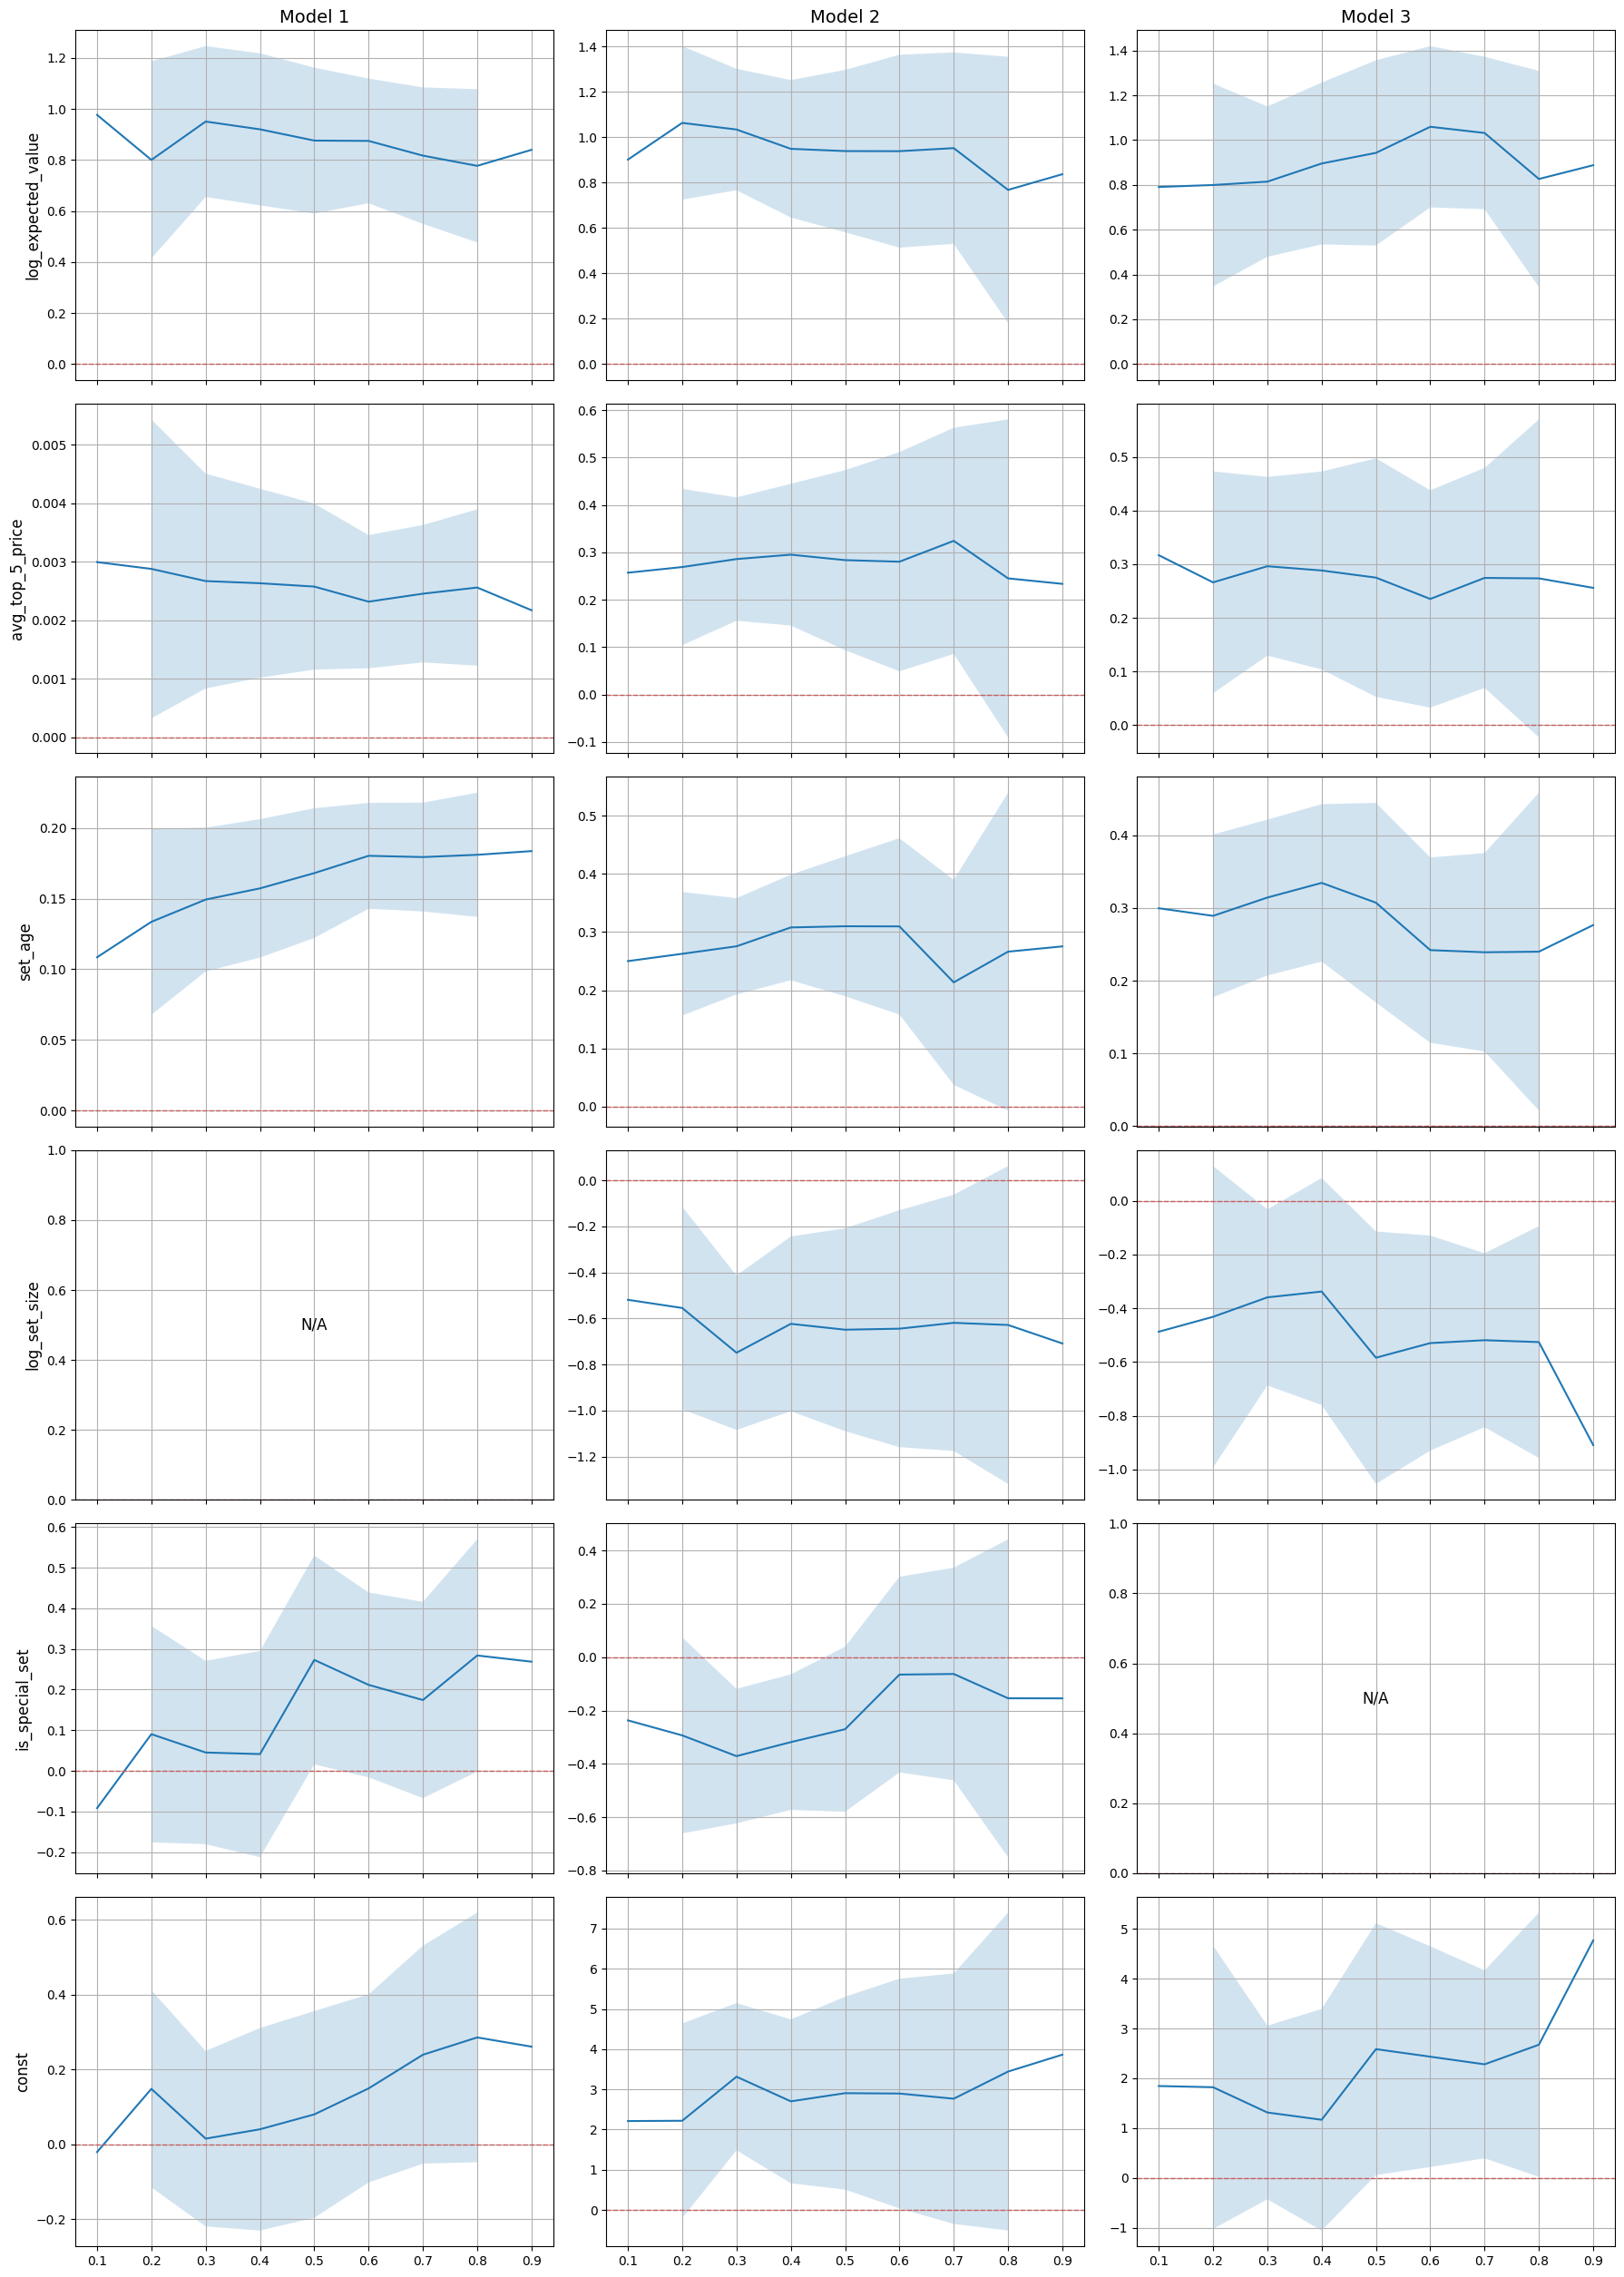

In [69]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_quantile_regression(y, X, quantiles=np.arange(0.1, 1.0, 0.1)):
    results = {}
    for q in quantiles:
        model = sm.QuantReg(y, X)
        res = model.fit(q=q)
        results[q] = res
    return results

def collect_coefs_and_cis(results, X_columns):
    quantiles = list(results.keys())
    coefs = pd.DataFrame(index=quantiles, columns=X_columns)
    lower = pd.DataFrame(index=quantiles, columns=X_columns)
    upper = pd.DataFrame(index=quantiles, columns=X_columns)
    
    for q, res in results.items():
        coefs.loc[q] = res.params
        conf_int = res.conf_int()
        lower.loc[q] = conf_int[0]
        upper.loc[q] = conf_int[1]
    
    return coefs.astype(float), lower.astype(float), upper.astype(float)

import matplotlib.pyplot as plt
import numpy as np

def plot_coefficients_grid(models_dict, quantiles):
    # Mapping of group names to actual variable names across models
    var_groups = {
        'log_expected_value': ['log_expected_value'],
        'avg_top_5_price': ['avg_top_5_price', 'log_avg_top_5_price'],
        'set_age': ['set_age', 'log_set_age'],
        'log_set_size': ['log_set_size'],
        'is_special_set': ['is_special_set'],
        'const': ['const']
    }

    model_names = list(models_dict.keys())
    n_rows = len(var_groups)
    n_cols = len(model_names)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.2 * n_rows), sharex=True)

    if n_rows == 1 or n_cols == 1:
        axes = np.atleast_2d(axes)

    for row_idx, (group_name, var_names) in enumerate(var_groups.items()):
        for col_idx, model_name in enumerate(model_names):
            ax = axes[row_idx, col_idx]
            coefs, lower, upper = models_dict[model_name]

            found = False
            for var in var_names:
                if var in coefs.columns:
                    ax.plot(quantiles, coefs[var], label=var)
                    ax.fill_between(quantiles, lower[var], upper[var], alpha=0.2)
                    found = True
            
            ax.axhline(y=0, linestyle='--', color='indianred', linewidth=1)
            if col_idx == 0:
                ax.set_ylabel(group_name, fontsize=12)
            if row_idx == 0:
                ax.set_title(model_name, fontsize=14)
            if not found:
                ax.text(0.5, 0.5, "N/A", ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.grid(True)

    plt.tight_layout()
    plt.show()






# Define quantiles
quantiles = np.arange(0.1, 1.0, 0.1)

# Run quantile regression for each model
results_4vars = run_quantile_regression(y_log, X_log_4vars_log_EV, quantiles)
results_all = run_quantile_regression(y_log, X_log_all, quantiles)
results_wo_special = run_quantile_regression(y_log, X_log_all_wo_is_special, quantiles)

# Collect coefficients and confidence intervals
coefs_4vars, lower_4vars, upper_4vars = collect_coefs_and_cis(results_4vars, X_log_4vars_log_EV.columns)
coefs_all, lower_all, upper_all = collect_coefs_and_cis(results_all, X_log_all.columns)
coefs_wo_special, lower_wo_special, upper_wo_special = collect_coefs_and_cis(results_wo_special, X_log_all_wo_is_special.columns)

# Store everything in a dict for easy comparison
models_dict = {
    "Model 1": (coefs_4vars, lower_4vars, upper_4vars),
    "Model 2": (coefs_all, lower_all, upper_all),
    "Model 3": (coefs_wo_special, lower_wo_special, upper_wo_special)
}

# Plot all

plot_coefficients_grid(models_dict, quantiles)


--------------------------------------
-------------

## Now, the 'Efficiency Index':

#### do the residuals regression... i.e. run the booster price ~ set_age, take the residuals and then put it to the ei regression - (then why not do it with the EV as well? - do it!)

### 2-stage regression:

In [141]:
import statsmodels.api as sm

X_base = cross_section_final[["log_expected_value", "log_set_age"]]
X_base = sm.add_constant(X_base)
y_price = cross_section_final["log_booster_price"]

model_base = sm.OLS(y_price, X_base).fit()
print(model_base.summary())

# Get residuals
cross_section_final["booster_price_residual"] = model_base.resid


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.55e-14
Time:                        17:29:04   Log-Likelihood:                -4.5124
No. Observations:                  33   AIC:                             15.02
Df Residuals:                      30   BIC:                             19.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2699      0

In [142]:
X_resid = cross_section_final[["log_avg_top_5_price", "log_set_size", "is_special_set"]]
X_resid = sm.add_constant(X_resid)
y_resid = cross_section_final["booster_price_residual"]

model_resid = sm.OLS(y_resid, X_resid).fit()
print("\n### Explaining Pricing Residuals ###")
print(model_resid.summary())



### Explaining Pricing Residuals ###
                              OLS Regression Results                              
Dep. Variable:     booster_price_residual   R-squared:                       0.326
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     4.673
Date:                    Sat, 19 Apr 2025   Prob (F-statistic):            0.00879
Time:                            17:29:07   Log-Likelihood:                 1.9940
No. Observations:                      33   AIC:                             4.012
Df Residuals:                          29   BIC:                             9.998
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

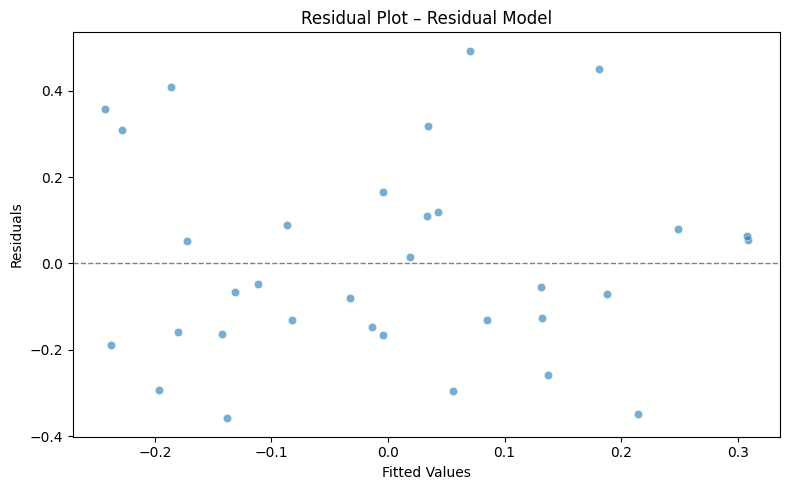

            Test  LM Statistic   p-value
0  Breusch-Pagan      0.736416  0.864607
1          White     11.607050  0.169616


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract residuals and fitted values
residuals_resid_model = model_resid.resid
fitted_values_resid_model = model_resid.fittedvalues

# Plot residuals vs fitted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_resid_model, y=residuals_resid_model, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot – Residual Model")
plt.tight_layout()
plt.show()

import statsmodels.stats.api as sms
import pandas as pd

bp_test_stat, bp_pvalue, _, _ = sms.het_breuschpagan(residuals_resid_model, X_resid)

bp_results = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test_stat],
    "p-value": [bp_pvalue]
})

white_test_stat, white_pvalue, _, _ = sms.het_white(residuals_resid_model, X_resid)

white_results = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test_stat],
    "p-value": [white_pvalue]
})

heteroskedasticity_results = pd.concat([bp_results, white_results], ignore_index=True)
print(heteroskedasticity_results)


#### -> seems no heteroskedasticity but be careful..

------------------

### now add the new dataset and check the model complete:

In [159]:
import pandas as pd

# 1. Load the Excel file
booster_prices = pd.read_excel("booster_pack_prices_12.4.25.xlsx")

# Optional: Check columns
print(booster_prices.columns)

# 2. Merge with cross_section_final
merged_df = cross_section_final.merge(
    booster_prices,
    left_on="product_name",
    right_on="Booster Pack",
    how="left"  # use 'inner' if you only want matches
)

# 3. Optional: Inspect the result
#merged_df


Index(['Booster Pack', 'Price (USD)', 'Booster Sample No',
       'Is Standard Rotation'],
      dtype='object')


In [160]:
# 1. Drop the 'Booster Pack' column
merged_df.drop(columns=["Booster Pack"], inplace=True)
merged_df1 = merged_df.copy()
# 2. Rename the remaining columns
merged_df1.rename(columns={
    "Price (USD)": "price_april",
    "Booster Sample No": "booster_sample_no",
    "Is Standard Rotation": "is_standard_rotation"
}, inplace=True)

# 3. Optional: Confirm changes
print(merged_df1[["booster_price","product_name", "price_april", "booster_sample_no", "is_standard_rotation"]].head())


   booster_price                  product_name  price_april booster_sample_no  \
0           8.56  Champion's Path Booster Pack        12.30              3192   
1           3.98     Crown Zenith Booster Pack         8.89             1900+   
2          19.96     Hidden Fates Booster Pack        27.44              1580   
3           4.88    Shining Fates Booster Pack         9.46              2187   
4          30.44  Shining Legends Booster Pack        45.48              1536   

   is_standard_rotation  
0                     0  
1                     1  
2                     0  
3                     0  
4                     0  


#### create new columns:

In [161]:
# 1. Replace entire value with 8000 if "+" appears
merged_df1["booster_sample_replaced_8000"] = merged_df1["booster_sample_no"].apply(
    lambda x: 8000 if "+" in str(x) else int(str(x).replace("+", "").strip())
)

# 2. Replace entire value with 0 if "+" appears
merged_df1["booster_sample_replaced_0"] = merged_df1["booster_sample_no"].apply(
    lambda x: 0 if "+" in str(x) else int(str(x).replace("+", "").strip())
)

# 3. Replace with 8000 only if set is "Evolving Skies" and "+" is present, otherwise 0 (if "+" is present), or keep the original value
merged_df1["booster_sample_evolving_8000_only"] = merged_df1.apply(
    lambda row: 8000 if "+" in str(row["booster_sample_no"]) and row["product_name"] == "Evolving Skies Booster Pack"
    else (0 if "+" in str(row["booster_sample_no"]) else int(str(row["booster_sample_no"]).replace("+", "").strip())),
    axis=1
)

#merged_df1

#### percentage return:

In [162]:
merged_df1["booster_pct_return"] = (
    (merged_df1["price_april"] - merged_df1["booster_price"]) / merged_df1["booster_price"]
)
#merged_df1

----------------
------------------
-----------------

#### try above booster_price_residual from the pure model b. price ~ EV + age:

In [163]:
# Should already be calculated:
# - merged_df["booster_pct_return"]
# - merged_df["booster_price_residual"]


regression_data = merged_df1[["booster_pct_return", "booster_price_residual"]]

import statsmodels.api as sm

X = regression_data[["booster_price_residual"]]
X = sm.add_constant(X)
y = regression_data["booster_pct_return"]

model_return_vs_resid = sm.OLS(y, X).fit()
print(model_return_vs_resid.summary())



                            OLS Regression Results                            
Dep. Variable:     booster_pct_return   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8668
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.359
Time:                        17:46:34   Log-Likelihood:                0.26326
No. Observations:                  33   AIC:                             3.473
Df Residuals:                      31   BIC:                             6.466
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### no - purely EV and set age model does not predict returns...

-------------

--------

----------------

#### efficiency ranking - top the most efficient:

In [164]:

# Rank the sets: lower residual → higher efficiency (rank 1 = most efficient)
cross_section_final["efficiency_rank_base"] = cross_section_final["booster_price_residual"].rank(ascending=True)

# Optional: sort and display the top 10 most efficient sets
top_efficient_sets = cross_section_final.sort_values("efficiency_rank_base")
top_efficient_sets[["set_name","booster_price_residual", "efficiency_rank_base"]]

set_name  booster_price_residual  \
18         sv-scarlet-and-violet-151               -0.496845   
1                       crown-zenith               -0.490190   
19  sv01-scarlet-and-violet-base-set               -0.426740   
22                 sv04-paradox-rift               -0.337914   
20               sv02-paldea-evolved               -0.304542   
5                        sm-base-set               -0.240055   
30            swsh10-astral-radiance               -0.213786   
26  swsh01-sword-and-shield-base-set               -0.197683   
8                  sm-cosmic-eclipse               -0.170583   
12                   sm-lost-thunder               -0.160556   
27                swsh02-rebel-clash               -0.158379   
14                    sm-ultra-prism               -0.134345   
9                sm-crimson-invasion               -0.121084   
21              sv03-obsidian-flames               -0.120377   
23              sv05-temporal-forces               -0.111556   
2                       hidden-fates               -0.046499   
32             swsh12-silver-tempest                0.002636   
10                sm-forbidden-light                0.006753   
16                  sm-unified-minds                0.032932   
7                 sm-celestial-storm                0.078275   
17                  sv-paldean-fates                0.081300   
3                      shining-fates                0.114726   
6                 sm-burning-shadows                0.116499   
24          sv06-twilight-masquerade                0.144341   
31                swsh11-lost-origin                0.160221   
15                 sm-unbroken-bonds                0.162021   
28            swsh03-darkness-ablaze                0.222902   
13                        sm-team-up                0.328898   
11               sm-guardians-rising                0.351825   
0                     champions-path                0.362564   
4                    shining-legends                0.371033   
25                sv07-stellar-crown                0.563106   
29             swsh07-evolving-skies                0.631101   

    efficiency_rank_base  
18                   1.0  
1                    2.0  
19                   3.0  
22                   4.0  
20                   5.0  
5                    6.0  
30                   7.0  
26                   8.0  
8                    9.0  
12                  10.0  
27                  11.0  
14                  12.0  
9                   13.0  
21                  14.0  
23                  15.0  
2                   16.0  
32                  17.0  
10                  18.0  
16                  19.0  
7                   20.0  
17                  21.0  
3                   22.0  
6                   23.0  
24                  24.0  
31                  25.0  
15                  26.0  
28                  27.0  
13                  28.0  
11                  29.0  
0                   30.0  
4                   31.0  
25                  32.0  
29                  33.0

### full model efficiency ranking:


In [165]:
# Define full model predictors
X_full = cross_section_final[[
    "log_expected_value", "log_set_age", 
    "log_avg_top_5_price", "log_set_size", "is_special_set"
]]
X_full = sm.add_constant(X_full)

# Fit full model
y_price = cross_section_final["log_booster_price"]
model_full = sm.OLS(y_price, X_full).fit()

# Add residuals to DataFrame
cross_section_final["booster_price_residual_full"] = model_full.resid

# Rank sets based on residuals from the full model
# Lower residual = more efficient (underpriced), so ascending = True
cross_section_final["efficiency_rank_full"] = cross_section_final["booster_price_residual_full"].rank(ascending=True)

# Optional: Display top 10 most efficient sets
top_efficient_sets_full = cross_section_final.sort_values("efficiency_rank_full")
top_efficient_sets_full[["set_name","booster_price_residual_full", "efficiency_rank_full"]]


set_name  booster_price_residual_full  \
1                       crown-zenith                    -0.304183   
14                    sm-ultra-prism                    -0.266505   
5                        sm-base-set                    -0.260288   
9                sm-crimson-invasion                    -0.233231   
18         sv-scarlet-and-violet-151                    -0.222903   
30            swsh10-astral-radiance                    -0.202377   
20               sv02-paldea-evolved                    -0.188131   
23              sv05-temporal-forces                    -0.184140   
6                 sm-burning-shadows                    -0.176471   
0                     champions-path                    -0.146424   
22                 sv04-paradox-rift                    -0.143942   
19  sv01-scarlet-and-violet-base-set                    -0.115395   
24          sv06-twilight-masquerade                    -0.083412   
32             swsh12-silver-tempest                    -0.061998   
2                       hidden-fates                    -0.061559   
27                swsh02-rebel-clash                    -0.031611   
26  swsh01-sword-and-shield-base-set                    -0.022761   
31                swsh11-lost-origin                    -0.020909   
8                  sm-cosmic-eclipse                     0.015595   
12                   sm-lost-thunder                     0.021885   
10                sm-forbidden-light                     0.034279   
7                 sm-celestial-storm                     0.045851   
21              sv03-obsidian-flames                     0.073789   
16                  sm-unified-minds                     0.126809   
4                    shining-legends                     0.166144   
15                 sm-unbroken-bonds                     0.203347   
29             swsh07-evolving-skies                     0.222916   
13                        sm-team-up                     0.236453   
17                  sv-paldean-fates                     0.238794   
25                sv07-stellar-crown                     0.292076   
3                      shining-fates                     0.330132   
11               sm-guardians-rising                     0.333686   
28            swsh03-darkness-ablaze                     0.384487   

    efficiency_rank_full  
1                    1.0  
14                   2.0  
5                    3.0  
9                    4.0  
18                   5.0  
30                   6.0  
20                   7.0  
23                   8.0  
6                    9.0  
0                   10.0  
22                  11.0  
19                  12.0  
24                  13.0  
32                  14.0  
2                   15.0  
27                  16.0  
26                  17.0  
31                  18.0  
8                   19.0  
12                  20.0  
10                  21.0  
7                   22.0  
21                  23.0  
16                  24.0  
4                   25.0  
15                  26.0  
29                  27.0  
13                  28.0  
17                  29.0  
25                  30.0  
3                   31.0  
11                  32.0  
28                  33.0

In [166]:
# 1. Full model with 'is_special_set'
X_full = cross_section_final[[
    "log_expected_value", "log_set_age", 
    "log_avg_top_5_price", "log_set_size", "is_special_set"
]]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y_price, X_full).fit()
cross_section_final["resid_full"] = model_full.resid
cross_section_final["rank_full"] = cross_section_final["resid_full"].rank(ascending=True)

# 2. Modified model without 'is_special_set'
X_nospecial = cross_section_final[[
    "log_expected_value", "log_set_age", 
    "log_avg_top_5_price", "log_set_size"  # no is_special_set
]]
X_nospecial = sm.add_constant(X_nospecial)
model_nospecial = sm.OLS(y_price, X_nospecial).fit()
cross_section_final["resid_nospecial"] = model_nospecial.resid
cross_section_final["rank_nospecial"] = cross_section_final["resid_nospecial"].rank(ascending=True)

# 3. Compare rank shifts
cross_section_final["rank_diff"] = cross_section_final["rank_nospecial"] - cross_section_final["rank_full"]

# 4. Optional: See biggest changes in ranking
rank_shift_df = cross_section_final[["set_name", "rank_full", "rank_nospecial", "rank_diff"]].sort_values("rank_diff", key=abs, ascending=False)

# Display the top sets with biggest rank shifts
rank_shift_df


set_name  rank_full  rank_nospecial  rank_diff
2                       hidden-fates       15.0            10.0       -5.0
17                  sv-paldean-fates       29.0            24.0       -5.0
0                     champions-path       10.0             6.0       -4.0
9                sm-crimson-invasion        4.0             8.0        4.0
3                      shining-fates       31.0            27.0       -4.0
18         sv-scarlet-and-violet-151        5.0             2.0       -3.0
23              sv05-temporal-forces        8.0            11.0        3.0
13                        sm-team-up       28.0            30.0        2.0
15                 sm-unbroken-bonds       26.0            28.0        2.0
24          sv06-twilight-masquerade       13.0            15.0        2.0
25                sv07-stellar-crown       30.0            32.0        2.0
31                swsh11-lost-origin       18.0            16.0       -2.0
29             swsh07-evolving-skies       27.0            29.0        2.0
14                    sm-ultra-prism        2.0             4.0        2.0
10                sm-forbidden-light       21.0            22.0        1.0
4                    shining-legends       25.0            26.0        1.0
7                 sm-celestial-storm       22.0            21.0       -1.0
30            swsh10-astral-radiance        6.0             5.0       -1.0
27                swsh02-rebel-clash       16.0            17.0        1.0
19  sv01-scarlet-and-violet-base-set       12.0            13.0        1.0
26  swsh01-sword-and-shield-base-set       17.0            18.0        1.0
11               sm-guardians-rising       32.0            31.0       -1.0
16                  sm-unified-minds       24.0            25.0        1.0
22                 sv04-paradox-rift       11.0            12.0        1.0
1                       crown-zenith        1.0             1.0        0.0
12                   sm-lost-thunder       20.0            20.0        0.0
5                        sm-base-set        3.0             3.0        0.0
6                 sm-burning-shadows        9.0             9.0        0.0
8                  sm-cosmic-eclipse       19.0            19.0        0.0
21              sv03-obsidian-flames       23.0            23.0        0.0
20               sv02-paldea-evolved        7.0             7.0        0.0
28            swsh03-darkness-ablaze       33.0            33.0        0.0
32             swsh12-silver-tempest       14.0            14.0        0.0

## FINAL actual models ranking COMPARISON:


In [167]:
import statsmodels.api as sm

# Model 1
X1 = cross_section_final[[
    "log_expected_value", "log_avg_top_5_price", "set_age", "is_special_set"
]]
X1 = sm.add_constant(X1)
model1 = sm.OLS(cross_section_final["log_booster_price"], X1).fit()
cross_section_final["rank_model1"] = model1.resid.rank(ascending=True)

# Model 2
X2 = cross_section_final[[
    "log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"
]]
X2 = sm.add_constant(X2)
model2 = sm.OLS(cross_section_final["log_booster_price"], X2).fit()
cross_section_final["rank_model2"] = model2.resid.rank(ascending=True)

# Model 3
X3 = cross_section_final[[
    "log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size"
]]  # no dummy
X3 = sm.add_constant(X3)
model3 = sm.OLS(cross_section_final["log_booster_price"], X3).fit()
cross_section_final["rank_model3"] = model3.resid.rank(ascending=True)


In [168]:
rank_comparison = cross_section_final[[
    "set_name", "rank_model1", "rank_model2", "rank_model3"
]].sort_values("rank_model1")

# See first few
rank_comparison


set_name  rank_model1  rank_model2  rank_model3
5                        sm-base-set          1.0          3.0          3.0
1                       crown-zenith          2.0          1.0          1.0
6                 sm-burning-shadows          3.0          9.0          9.0
14                    sm-ultra-prism          4.0          2.0          4.0
9                sm-crimson-invasion          5.0          4.0          8.0
18         sv-scarlet-and-violet-151          6.0          5.0          2.0
2                       hidden-fates          7.0         15.0         10.0
20               sv02-paldea-evolved          8.0          7.0          7.0
30            swsh10-astral-radiance          9.0          6.0          5.0
24          sv06-twilight-masquerade         10.0         13.0         15.0
23              sv05-temporal-forces         11.0          8.0         11.0
12                   sm-lost-thunder         12.0         20.0         20.0
22                 sv04-paradox-rift         13.0         11.0         12.0
26  swsh01-sword-and-shield-base-set         14.0         17.0         18.0
8                  sm-cosmic-eclipse         15.0         19.0         19.0
27                swsh02-rebel-clash         16.0         16.0         17.0
19  sv01-scarlet-and-violet-base-set         17.0         12.0         13.0
32             swsh12-silver-tempest         18.0         14.0         14.0
25                sv07-stellar-crown         19.0         30.0         32.0
17                  sv-paldean-fates         20.0         29.0         24.0
7                 sm-celestial-storm         21.0         22.0         21.0
16                  sm-unified-minds         22.0         24.0         25.0
31                swsh11-lost-origin         23.0         18.0         16.0
11               sm-guardians-rising         24.0         32.0         31.0
10                sm-forbidden-light         25.0         21.0         22.0
15                 sm-unbroken-bonds         26.0         26.0         28.0
3                      shining-fates         27.0         31.0         27.0
0                     champions-path         28.0         10.0          6.0
21              sv03-obsidian-flames         29.0         23.0         23.0
29             swsh07-evolving-skies         30.0         27.0         29.0
4                    shining-legends         31.0         25.0         26.0
13                        sm-team-up         32.0         28.0         30.0
28            swsh03-darkness-ablaze         33.0         33.0         33.0

### now, the three selected models:

In [169]:
# Add model residuals to merged_df
merged_df1["resid_model1"] = model1.resid
merged_df1["resid_model2"] = model2.resid
merged_df1["resid_model3"] = model3.resid


In [170]:
import statsmodels.api as sm

results = {}

for model_label in ["resid_model1", "resid_model2", "resid_model3"]:
    # Drop missing
    data = merged_df1[["booster_pct_return", model_label]].dropna()
    
    X = sm.add_constant(data[[model_label]])
    y = data["booster_pct_return"]

    results[model_label] = sm.OLS(y, X).fit()

    print(f"\n### Regression: pct_return ~ {model_label} ###")
    print(results[model_label].summary())



### Regression: pct_return ~ resid_model1 ###
                            OLS Regression Results                            
Dep. Variable:     booster_pct_return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                   0.05636
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.814
Time:                        17:47:09   Log-Likelihood:               -0.16177
No. Observations:                  33   AIC:                             4.324
Df Residuals:                      31   BIC:                             7.317
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

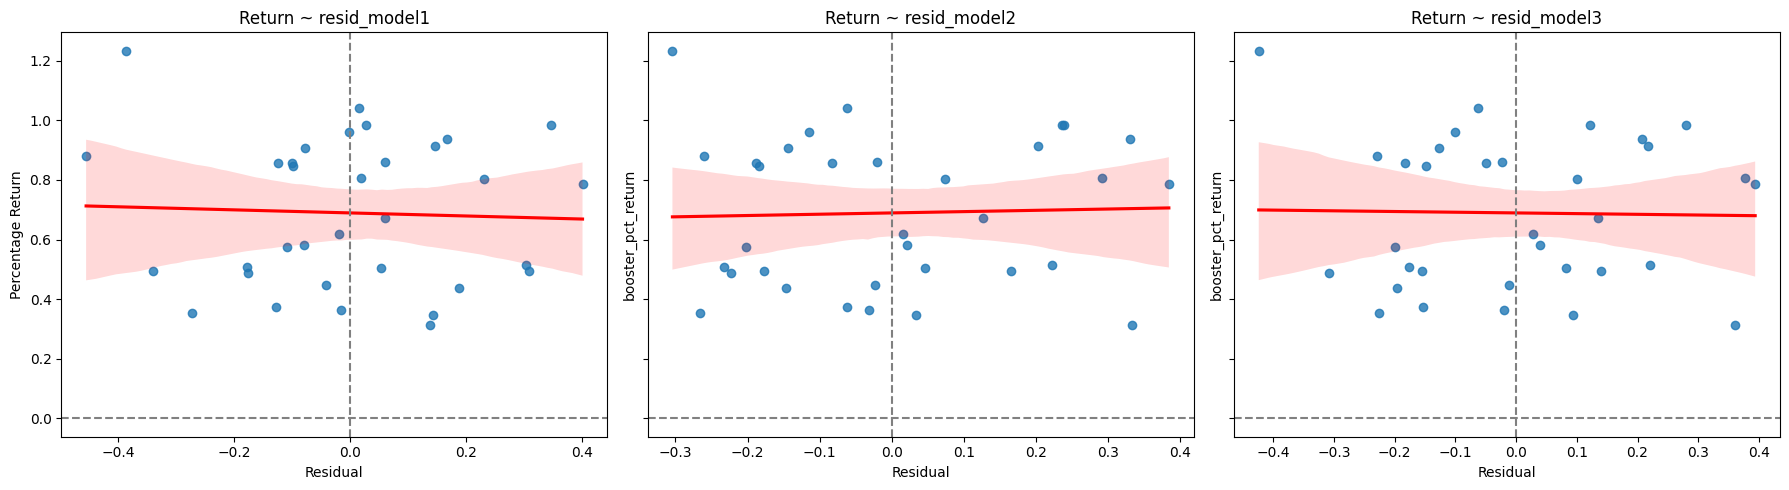

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, model_label in enumerate(["resid_model1", "resid_model2", "resid_model3"]):
    sns.regplot(
        data=merged_df1,
        x=model_label,
        y="booster_pct_return",
        ax=axs[i],
        line_kws={"color": "red"},
        ci=95
    )
    axs[i].axhline(0, color='gray', linestyle='--')
    axs[i].axvline(0, color='gray', linestyle='--')
    axs[i].set_title(f"Return ~ {model_label}")
    axs[i].set_xlabel("Residual")
    if i == 0:
        axs[i].set_ylabel("Percentage Return")

plt.tight_layout()
plt.show()


In [174]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# First Stage: Regress log_booster_price on log_expected_value + log_set_age
def run_first_stage(df):
    X1 = df[["log_expected_value", "log_set_age"]]
    X1 = sm.add_constant(X1)
    y1 = df["log_booster_price"]
    model1 = sm.OLS(y1, X1).fit()
    df["booster_price_residual"] = model1.resid
    return model1, df

# Compute VIFs for a given design matrix
def compute_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Second Stage: Regress first-stage residuals on other variables including rarity proxy
def run_second_stage(df, rarity_var_name):
    predictors = [
        "log_avg_top_5_price", "log_set_size", "is_special_set", 
        "is_standard_rotation", rarity_var_name
    ]
    X2 = df[predictors]
    X2 = sm.add_constant(X2)
    y2 = df["booster_price_residual"]
    
    model2 = sm.OLS(y2, X2).fit(cov_type="HC3")

    # Store residuals
    resid_col_name = f"residual_{rarity_var_name}"
    df[resid_col_name] = model2.resid

    # Compute and print VIF
    vif = compute_vif(X2)

    return model2, vif, df

# Rarity proxies to test
rarity_vars = [
    "booster_sample_replaced_8000",
    "booster_sample_replaced_0",
    "booster_sample_evolving_8000_only"
]

# Run the first stage
first_stage_model, merged_df1 = run_first_stage(merged_df1)

# Run all second-stage variants and store results
second_stage_models = {}
vif_results = {}

for var in rarity_vars:
    model, vif_df, merged_df1 = run_second_stage(merged_df1, var)
    second_stage_models[var] = model
    vif_results[var] = vif_df

    print(f"\n### Second Stage Regression using: {var} ###")
    print(model.summary())
    print("\nVIFs:")
    print(vif_df)



### Second Stage Regression using: booster_sample_replaced_8000 ###
                              OLS Regression Results                              
Dep. Variable:     booster_price_residual   R-squared:                       0.369
Model:                                OLS   Adj. R-squared:                  0.252
Method:                     Least Squares   F-statistic:                     4.881
Date:                    Sat, 19 Apr 2025   Prob (F-statistic):            0.00261
Time:                            18:03:15   Log-Likelihood:                 3.0838
No. Observations:                      33   AIC:                             5.832
Df Residuals:                          27   BIC:                             14.81
Df Model:                               5                                         
Covariance Type:                      HC3                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----

#### -> high VIFs - collinearity -> use just the regression with either is_standard rotation or the 8000:

In [175]:
import statsmodels.api as sm
import pandas as pd

# First Stage: Regress log_booster_price on log_expected_value + log_set_age
def run_first_stage(df):
    X1 = df[["log_expected_value", "log_set_age"]]
    X1 = sm.add_constant(X1)
    y1 = df["log_booster_price"]
    model1 = sm.OLS(y1, X1).fit()
    df["booster_price_residual"] = model1.resid
    return model1, df

# Second Stage: Takes a list of predictors
def run_second_stage(df, predictor_list, model_name):
    X2 = df[predictor_list]
    X2 = sm.add_constant(X2)
    y2 = df["booster_price_residual"]
    model2 = sm.OLS(y2, X2).fit(cov_type="HC3")
    
    print(f"\n### {model_name} ###")
    print(model2.summary())
    return model2

# Run first stage
first_stage_model, merged_df1 = run_first_stage(merged_df1)

# Define models
model_a_predictors = ["log_avg_top_5_price", "log_set_size", "is_special_set", "is_standard_rotation"]
model_b_predictors = ["log_avg_top_5_price", "log_set_size", "is_special_set", "booster_sample_replaced_8000"]

# Run second-stage models
model_a = run_second_stage(merged_df1, model_a_predictors, "Model A: Using is_standard_rotation")
model_b = run_second_stage(merged_df1, model_b_predictors, "Model B: Using booster_sample_replaced_8000")



### Model A: Using is_standard_rotation ###
                              OLS Regression Results                              
Dep. Variable:     booster_price_residual   R-squared:                       0.328
Model:                                OLS   Adj. R-squared:                  0.232
Method:                     Least Squares   F-statistic:                     5.242
Date:                    Sat, 19 Apr 2025   Prob (F-statistic):            0.00279
Time:                            18:09:02   Log-Likelihood:                 2.0365
No. Observations:                      33   AIC:                             5.927
Df Residuals:                          28   BIC:                             13.41
Df Model:                               4                                         
Covariance Type:                      HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

#### -> hmm, does not seem to matter...

### so, last option:

In [176]:
# Create dummy: 1 if booster_sample_replaced_8000 < 2000, else 0
merged_df1["rare_set_dummy"] = (merged_df1["booster_sample_replaced_8000"] < 2000).astype(int)


In [179]:
import statsmodels.api as sm

# Define predictors
predictors_rare_dummy = [
    "log_avg_top_5_price", 
    "log_set_size", 
    "is_special_set", 
    "rare_set_dummy"
]

# Create design matrix
X_rare_dummy = merged_df1[predictors_rare_dummy]
X_rare_dummy = sm.add_constant(X_rare_dummy)

# Define target
y_resid = merged_df1["booster_price_residual"]

# Fit model
model_rare_dummy = sm.OLS(y_resid, X_rare_dummy).fit(cov_type="HC3")

# Store residuals from second-stage model
merged_df1["residual_rare_set_dummy"] = model_rare_dummy.resid

# Print summary
print("### Second-Stage Regression with rare_set_dummy ###")
print(model_rare_dummy.summary())


### Second-Stage Regression with rare_set_dummy ###
                              OLS Regression Results                              
Dep. Variable:     booster_price_residual   R-squared:                       0.407
Model:                                OLS   Adj. R-squared:                  0.322
Method:                     Least Squares   F-statistic:                     3.702
Date:                    Sat, 19 Apr 2025   Prob (F-statistic):             0.0153
Time:                            18:34:44   Log-Likelihood:                 4.1067
No. Observations:                      33   AIC:                             1.787
Df Residuals:                          28   BIC:                             9.269
Df Model:                               4                                         
Covariance Type:                      HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

### -> good, very good 17.25

In [180]:
import statsmodels.api as sm

# Define X and y
X = sm.add_constant(merged_df1[["residual_rare_set_dummy"]])
y = merged_df1["booster_pct_return"]

# Fit the model
model_return = sm.OLS(y, X).fit()

# Print summary
print("### Regression: booster_pct_return ~ residual_rare_set_dummy ###")
print(model_return.summary())


### Regression: booster_pct_return ~ residual_rare_set_dummy ###
                            OLS Regression Results                            
Dep. Variable:     booster_pct_return   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.3686
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.548
Time:                        18:36:58   Log-Likelihood:              0.0032666
No. Observations:                  33   AIC:                             3.993
Df Residuals:                      31   BIC:                             6.986
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

#### but still does not explain the returns.. 

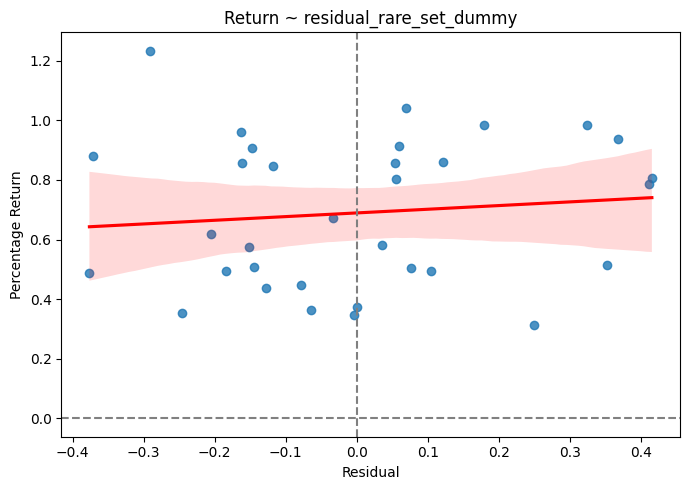

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the variable name
model_label = "residual_rare_set_dummy"

# Create plot
fig, ax = plt.subplots(figsize=(7, 5))

sns.regplot(
    data=merged_df1,
    x=model_label,
    y="booster_pct_return",
    ax=ax,
    line_kws={"color": "red"},
    ci=95
)

# Reference lines
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')

# Labels and title
ax.set_title(f"Return ~ {model_label}")
ax.set_xlabel("Residual")
ax.set_ylabel("Percentage Return")

plt.tight_layout()
plt.show()


#### final final -> create a dummy and see:

In [186]:
merged_df1["underpriced_dummy"] = (merged_df1["residual_rare_set_dummy"] < 0).astype(int)


In [187]:
import statsmodels.api as sm

# Define X and y
X = sm.add_constant(merged_df1[["underpriced_dummy"]])
y = merged_df1["booster_pct_return"]

# Fit the model
model_underpriced = sm.OLS(y, X).fit()

# Print summary
print("### Regression: booster_pct_return ~ underpriced_dummy ###")
print(model_underpriced.summary())


### Regression: booster_pct_return ~ underpriced_dummy ###
                            OLS Regression Results                            
Dep. Variable:     booster_pct_return   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.062
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.311
Time:                        19:03:51   Log-Likelihood:                0.36389
No. Observations:                  33   AIC:                             3.272
Df Residuals:                      31   BIC:                             6.265
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

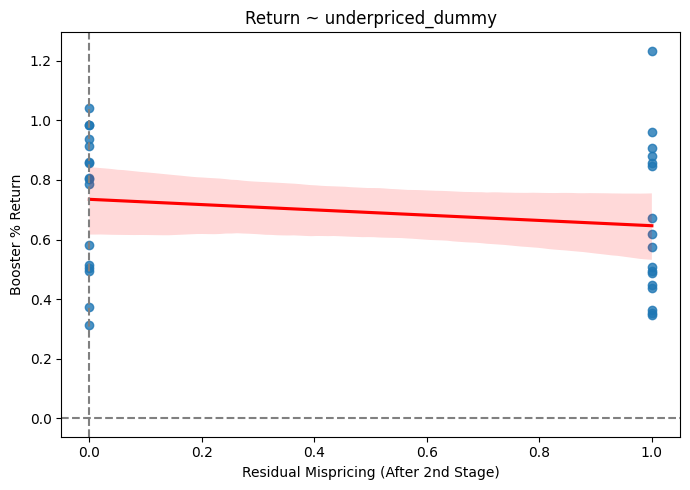

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the variable name
model_label = "underpriced_dummy"

# Create plot
fig, ax = plt.subplots(figsize=(7, 5))

sns.regplot(
    data=merged_df1,
    x=model_label,
    y="booster_pct_return",
    ax=ax,
    line_kws={"color": "red"},
    ci=95
)

# Reference lines at 0
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')

# Labels and title
ax.set_title(f"Return ~ {model_label}")
ax.set_xlabel("Residual Mispricing (After 2nd Stage)")
ax.set_ylabel("Booster % Return")

plt.tight_layout()
plt.show()


#### -> ok, seems like a random walk ... the mispricing is not related to the future returns..


#### below are the original elastic nests (from 12.4.25)

In [49]:
!pip install scikit-learn


from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

# Define features and target
features = ["log_expected_value", "avg_top_5_price", "set_age", "is_special_set"]
X_enet = cross_section_final[features]
y_enet = cross_section_final["log_booster_price"]

# Create pipeline with scaling + ElasticNetCV
elastic_net_model = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0], random_state=42)
)

# Fit model
elastic_net_model.fit(X_enet, y_enet)

# Extract fitted model from pipeline
enet = elastic_net_model.named_steps['elasticnetcv']

# Output results
print("Best alpha (regularization strength):", enet.alpha_)
print("Best l1_ratio (balance Lasso:Ridge):", enet.l1_ratio_)
print("\nElastic Net Coefficients:")
for name, coef in zip(features, enet.coef_):
    print(f"{name}: {coef:.4f}")


Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 11.4 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 11.5 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.4 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Best alpha (regularization strength): 0.001368053139336664
Best l1_ratio (balance Lasso:Ridge): 0.5

Elastic Net Coefficients:
log_expected_value: 0.3938
avg_top_5_price: 0.2317
set_age: 0.3864
is_special_set: 0.0776


In [50]:

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

# Define features and target
features = ["log_expected_value", "avg_top_5_price", "set_age", "set_size", "is_special_set"]
X_enet = cross_section_final[features]
y_enet = cross_section_final["log_booster_price"]

# Create pipeline with scaling + ElasticNetCV
elastic_net_model = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0], random_state=42)
)

# Fit model
elastic_net_model.fit(X_enet, y_enet)

# Extract fitted model from pipeline
enet = elastic_net_model.named_steps['elasticnetcv']

# Output results
print("Best alpha (regularization strength):", enet.alpha_)
print("Best l1_ratio (balance Lasso:Ridge):", enet.l1_ratio_)
print("\nElastic Net Coefficients:")
for name, coef in zip(features, enet.coef_):
    print(f"{name}: {coef:.4f}")


Best alpha (regularization strength): 0.0007200279680719286
Best l1_ratio (balance Lasso:Ridge): 0.95

Elastic Net Coefficients:
log_expected_value: 0.4030
avg_top_5_price: 0.2342
set_age: 0.3540
set_size: -0.0476
is_special_set: 0.0557


## specification of the full OLS model: 

In [52]:
features = ["log_expected_value", "log_avg_top_5_price", "log_set_age", "log_set_size", "is_special_set"]
X_enet = cross_section_final[features]
y_enet = cross_section_final["log_booster_price"]

# Create pipeline with scaling + ElasticNetCV
elastic_net_model = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0], random_state=42)
)

# Fit model
elastic_net_model.fit(X_enet, y_enet)

# Extract fitted model from pipeline
enet = elastic_net_model.named_steps['elasticnetcv']

# Output results
print("Best alpha (regularization strength):", enet.alpha_)
print("Best l1_ratio (balance Lasso:Ridge):", enet.l1_ratio_)
print("\nElastic Net Coefficients:")
for name, coef in zip(features, enet.coef_):
    print(f"{name}: {coef:.4f}")


Best alpha (regularization strength): 0.08432999261073446
Best l1_ratio (balance Lasso:Ridge): 0.1

Elastic Net Coefficients:
log_expected_value: 0.3988
log_avg_top_5_price: 0.2112
log_set_age: 0.2767
log_set_size: -0.1524
is_special_set: -0.0332


In [11]:
# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for the regression model

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.72
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           2.52e-12
Time:                        15:04:48   Log-Likelihood:                -89.231
No. Observations:                  33   AIC:                             188.5
Df Residuals:                      28   BIC:                             195.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8098      1.634     

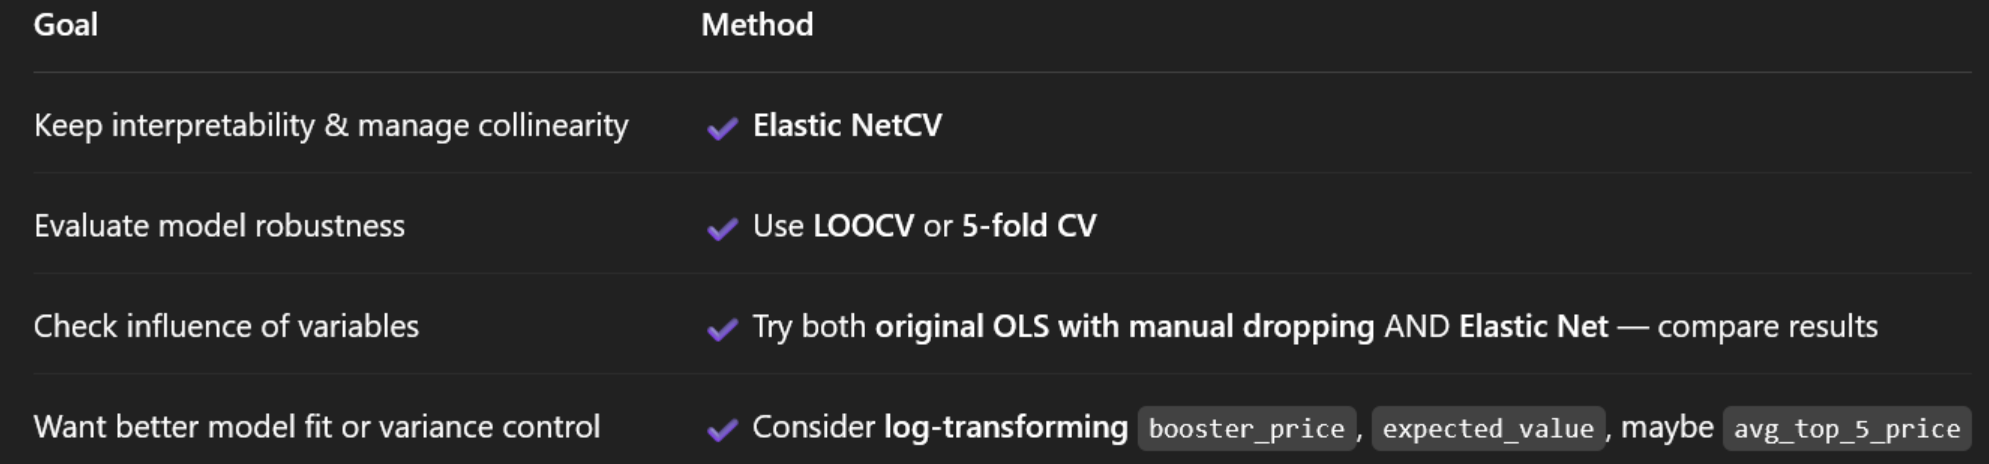
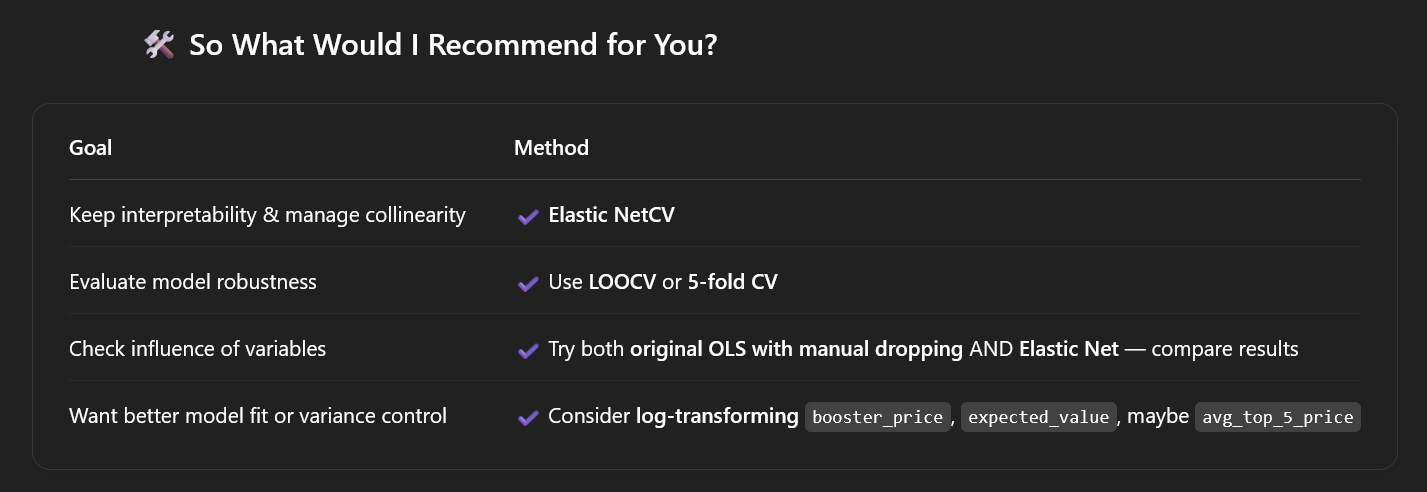

In [12]:
# Run OLS regression with robust standard errors
robust_model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is more conservative but reliable

# Print the robust regression results
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     10.64
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           2.27e-05
Time:                        15:30:07   Log-Likelihood:                -89.231
No. Observations:                  33   AIC:                             188.5
Df Residuals:                      28   BIC:                             195.9
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8098      2.968     

In [165]:
robust_model = sm.OLS(y, X).fit(cov_type='HC0')
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     22.27
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.33e-08
Time:                        01:40:22   Log-Likelihood:                -89.231
No. Observations:                  33   AIC:                             188.5
Df Residuals:                      28   BIC:                             195.9
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8098      1.815     

## very bad:

In [ ]:
import statsmodels.api as sm
import numpy as np

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant

# Step 1: Run initial OLS model to get residuals
initial_model = sm.OLS(y, X).fit()
residuals = initial_model.resid

# Step 2: Estimate variance of residuals
weights = 1 / (residuals**2)  # Inverse variance as weights (avoiding division by zero)

# Step 3: Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Print WLS regression summary
print(wls_model.summary())


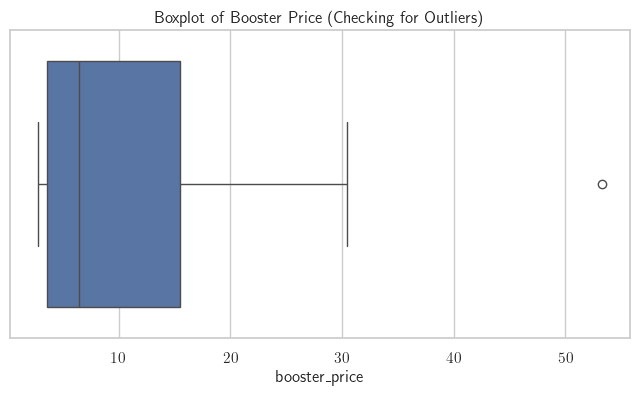

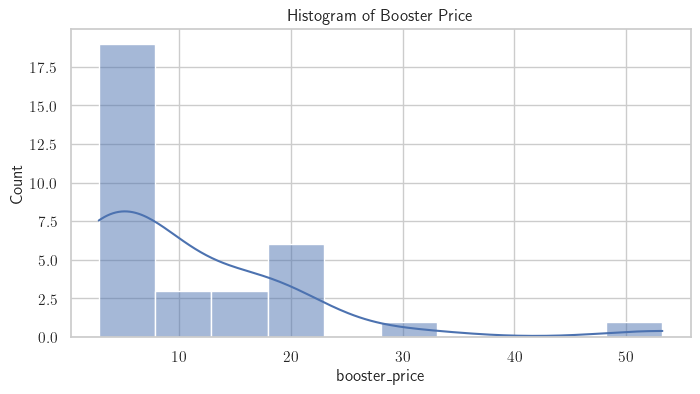


### Z-Score Outliers (booster_price) ###
    booster_price
13          53.27

### IQR Outliers (booster_price) ###
    booster_price
13          53.27

### Cook’s Distance Outliers (booster_price) ###
    booster_price
4           30.44
13          53.27
18           7.17
29          14.16


In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1️Boxplot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=cross_section_final["booster_price"])
plt.title("Boxplot of Booster Price (Checking for Outliers)")
plt.show()

# 2️Histogram to check distribution
plt.figure(figsize=(8, 4))
sns.histplot(cross_section_final["booster_price"], bins=10, kde=True)
plt.title("Histogram of Booster Price")
plt.show()

# 3️Z-Score Method (Values > 3 or < -3 are Outliers)
cross_section_final["z_score"] = (cross_section_final["booster_price"] - cross_section_final["booster_price"].mean()) / cross_section_final["booster_price"].std()
z_outliers = cross_section_final[abs(cross_section_final["z_score"]) > 3]

# 4 IQR Method (Values outside 1.5 * IQR are Outliers)
Q1 = cross_section_final["booster_price"].quantile(0.25)
Q3 = cross_section_final["booster_price"].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = cross_section_final[
    (cross_section_final["booster_price"] < (Q1 - 1.5 * IQR)) | 
    (cross_section_final["booster_price"] > (Q3 + 1.5 * IQR))
]

# 5️ Cook’s Distance (Regression Influence)
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential points (Cook’s Distance > 4/n)
cooks_threshold = 4 / len(cross_section_final)
cooks_outliers = cross_section_final[cooks_d > cooks_threshold]

# Print Outlier Results
print("\n### Z-Score Outliers (booster_price) ###")
print(z_outliers[["booster_price"]])

print("\n### IQR Outliers (booster_price) ###")
print(iqr_outliers[["booster_price"]])

print("\n### Cook’s Distance Outliers (booster_price) ###")
print(cooks_outliers[["booster_price"]])


In [167]:
# Remove identified outlier
cross_section_final_wo_outlier = cross_section_final[cross_section_final["booster_price"] != 53.27]

# Define dependent and independent variables again
y = cross_section_final_wo_outlier["booster_price"]
X = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression


In [168]:
# Summary statistics after outlier removal
summary_stats_filtered = cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print("\n### Summary Statistics After Outlier Removal ###")
print(summary_stats_filtered)



### Summary Statistics After Outlier Removal ###
       booster_price  expected_value  avg_top_5_price    set_age  \
count      32.000000       32.000000        32.000000  32.000000   
mean        9.270313        3.380150        78.405625   3.807666   
std         7.222097        1.572500        75.482376   2.458730   
min         2.800000        1.328567        10.484000   0.065708   
25%         3.592500        2.316819        32.996000   1.474333   
50%         5.650000        2.621334        56.111000   4.090349   
75%        15.092500        4.876764       101.919500   5.992471   
max        30.440000        6.806074       411.256000   7.674196   

       is_special_set  
count       32.000000  
mean         0.218750  
std          0.420013  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


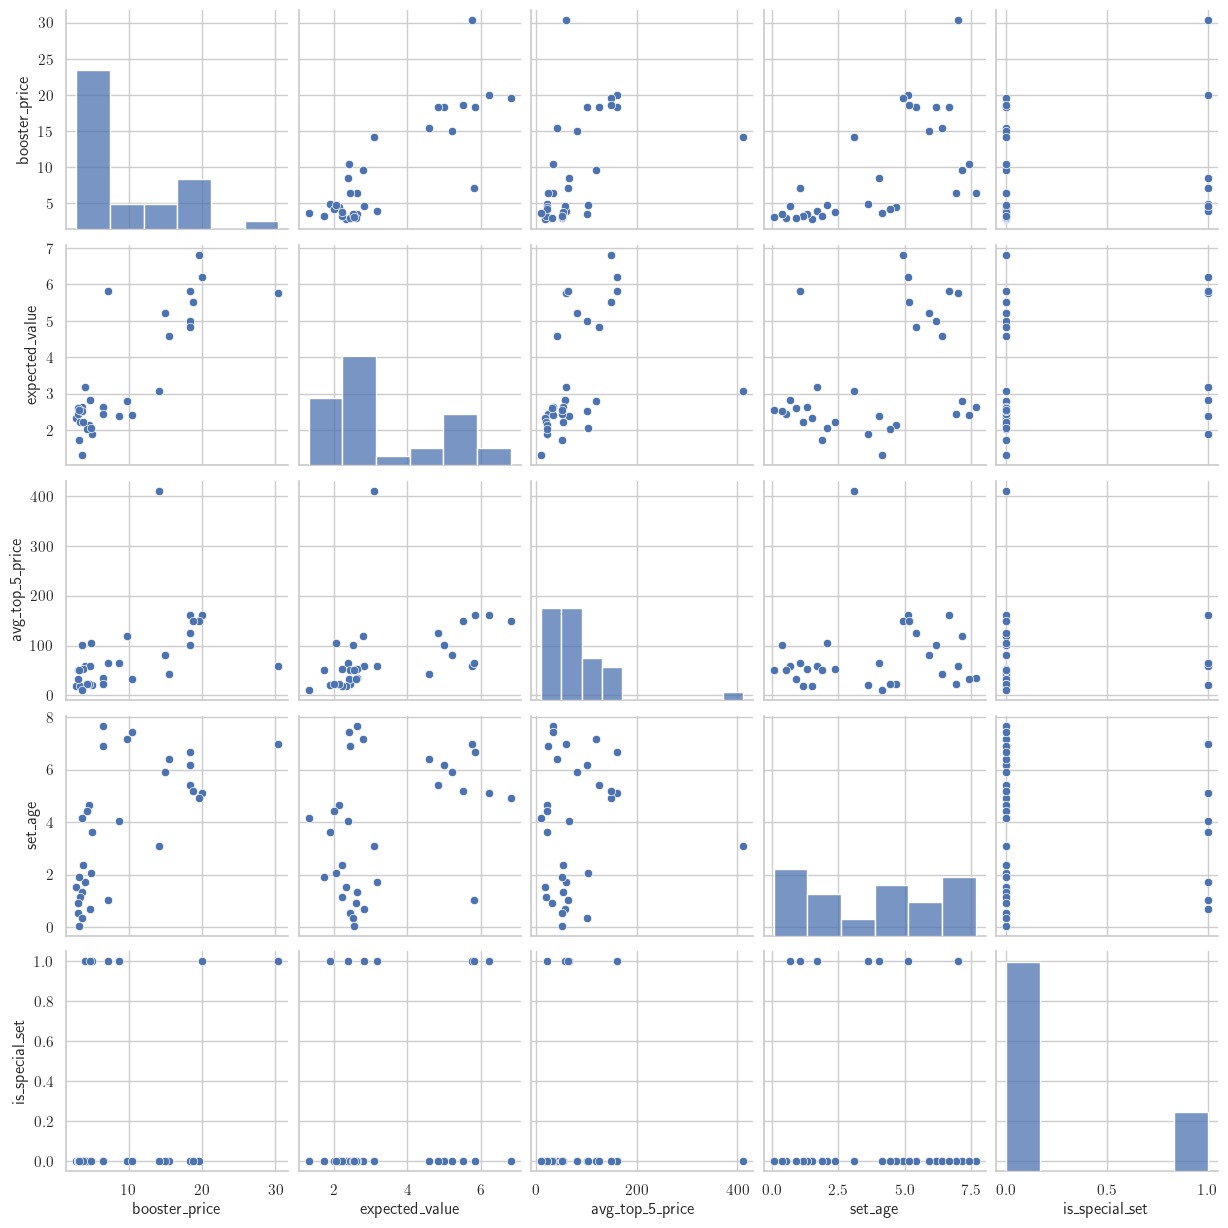

In [169]:
# Pairplot to check new relationships after outlier removal
sns.pairplot(cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
X_vif = sm.add_constant(cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Variable"] = X_vif.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print new VIF values
print("\n### Variance Inflation Factor (VIF) After Outlier Removal ###")
print(vif_data_filtered)



### Variance Inflation Factor (VIF) After Outlier Removal ###
          Variable       VIF
0            const  6.546583
1   expected_value  1.548258
2  avg_top_5_price  1.233152
3          set_age  1.237668
4   is_special_set  1.134226


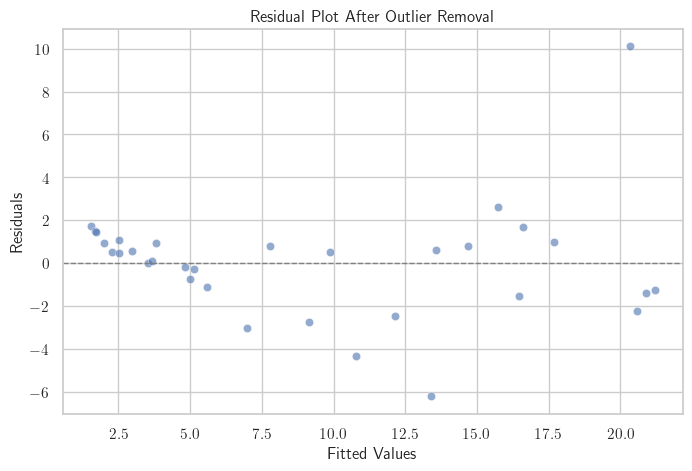


### Breusch-Pagan Test (After Outlier Removal) ###
LM Statistic: 10.157156995608332, p-value: 0.03786198786635371

### White's Test (After Outlier Removal) ###
LM Statistic: 30.0579166603212, p-value: 0.00462003194569381


In [171]:
import statsmodels.stats.api as sms

# Fit OLS model again
filtered_model = sm.OLS(y, X).fit()
residuals_filtered = filtered_model.resid
fitted_values_filtered = filtered_model.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered, y=residuals_filtered, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot After Outlier Removal")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered = sms.het_breuschpagan(residuals_filtered, X)
print("\n### Breusch-Pagan Test (After Outlier Removal) ###")
print(f"LM Statistic: {bp_test_filtered[0]}, p-value: {bp_test_filtered[1]}")

# White's Test
white_test_filtered = sms.het_white(residuals_filtered, X)
print("\n### White's Test (After Outlier Removal) ###")
print(f"LM Statistic: {white_test_filtered[0]}, p-value: {white_test_filtered[1]}")


In [172]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())



### Final Regression Results After Outlier Removal (HC3 Robust) ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     58.22
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           6.93e-13
Time:                        01:47:16   Log-Likelihood:                -76.146
No. Observations:                  32   AIC:                             162.3
Df Residuals:                      27   BIC:                             169.6
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [173]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC0')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())



### Final Regression Results After Outlier Removal (HC3 Robust) ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.7
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.19e-16
Time:                        01:48:37   Log-Likelihood:                -76.146
No. Observations:                  32   AIC:                             162.3
Df Residuals:                      27   BIC:                             169.6
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [174]:
# Run OLS regression
model_wo_hc = sm.OLS(y, X).fit()

# Print the regression results
print(model_wo_hc.summary())

                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     43.19
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.34e-11
Time:                        01:48:56   Log-Likelihood:                -76.146
No. Observations:                  32   AIC:                             162.3
Df Residuals:                      27   BIC:                             169.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.2357      1.287     

In [175]:
# Remove is_special_set and re-run the regression
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Run the final model
final_model_no_special = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# Print results
print("\n### Final Regression Without is_special_set ###")
print(final_model_no_special.summary())



### Final Regression Without is_special_set ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     38.61
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           4.41e-10
Time:                        01:49:22   Log-Likelihood:                -76.863
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      28   BIC:                             167.6
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

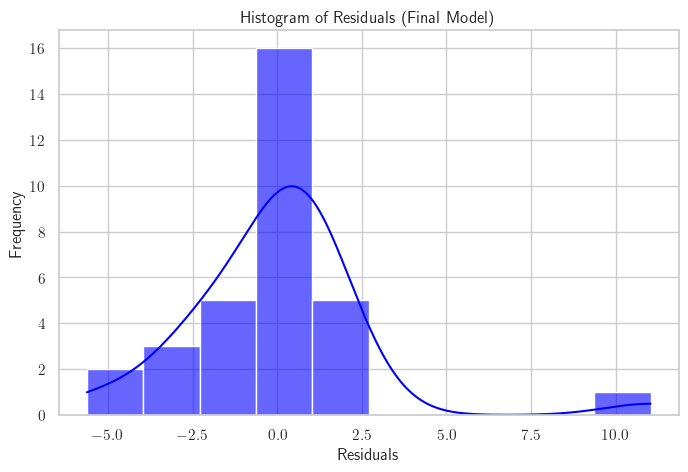

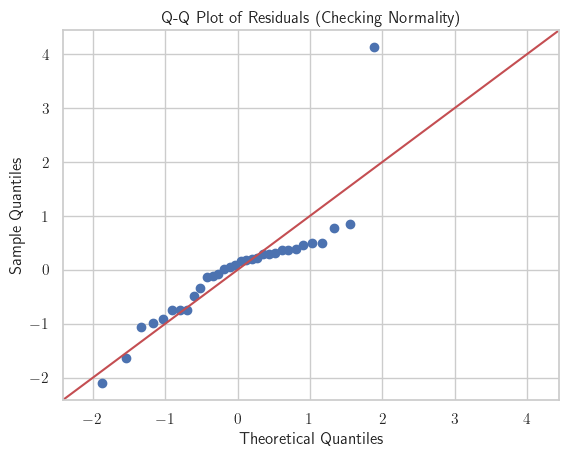


### Shapiro-Wilk Test for Normality ###
Statistic: 0.8042163240863354, p-value: 4.896350308011904e-05

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.21652365423186415, p-value: 0.08509189138338669

### Jarque-Bera Test for Normality ###
Statistic: 81.82270502453193, p-value: 1.7077541788642971e-18


In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Load your cleaned dataset (filtered_df) before running this code
# Define dependent and independent variables
y = cross_section_final_wo_outlier["booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the final regression model
final_model = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model.resid, 'norm', args=(final_model.resid.mean(), final_model.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


In [177]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           3.65e-16
Time:                        01:54:51   Log-Likelihood:                 8.5714
No. Observations:                  32   AIC:                            -9.143
Df Residuals:                      28   BIC:                            -3.280
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\janhr\AppData\Local\Temp\ipykernel_31612\2655366185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


In [178]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           4.27e-17
Time:                        01:55:51   Log-Likelihood:                 11.322
No. Observations:                  32   AIC:                            -12.64
Df Residuals:                      27   BIC:                            -5.315
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\janhr\AppData\Local\Temp\ipykernel_31612\1541417680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


In [179]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())



### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:          booster_price   Pseudo R-squared:               0.7108
Model:                       QuantReg   Bandwidth:                       2.667
Method:                 Least Squares   Sparsity:                        5.188
Date:                Mon, 07 Apr 2025   No. Observations:                   32
Time:                        01:57:43   Df Residuals:                       28
                                        Df Model:                            3
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.9622      1.166     -4.255      0.000      -7.351      -2.573
expected_value      2.5959      0.349      7.448      0.000       1.882       3.310
avg_top_5_price     0.0184      0.007      2.730      0.011      

C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [180]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())


### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:          booster_price   Pseudo R-squared:               0.7214
Model:                       QuantReg   Bandwidth:                       2.408
Method:                 Least Squares   Sparsity:                        4.807
Date:                Mon, 07 Apr 2025   No. Observations:                   32
Time:                        01:58:06   Df Residuals:                       27
                                        Df Model:                            4
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.1131      1.087     -4.704      0.000      -7.344      -2.883
expected_value      2.4715      0.342      7.236      0.000       1.771       3.172
avg_top_5_price     0.0199      0.006      3.132      0.004      

In [181]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

# Recreate the log-transformed dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define the new dependent variable
y_log = cross_section_final_wo_outlier["log_booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the log-transformed model again
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print the model summary
print("\n### Log-Transformed Model Summary ###")
print(final_model_log.summary())



### Log-Transformed Model Summary ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           4.27e-17
Time:                        01:58:35   Log-Likelihood:                 11.322
No. Observations:                  32   AIC:                            -12.64
Df Residuals:                      27   BIC:                            -5.315
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
con

C:\Users\janhr\AppData\Local\Temp\ipykernel_31612\3254096150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


## the above is for the following:

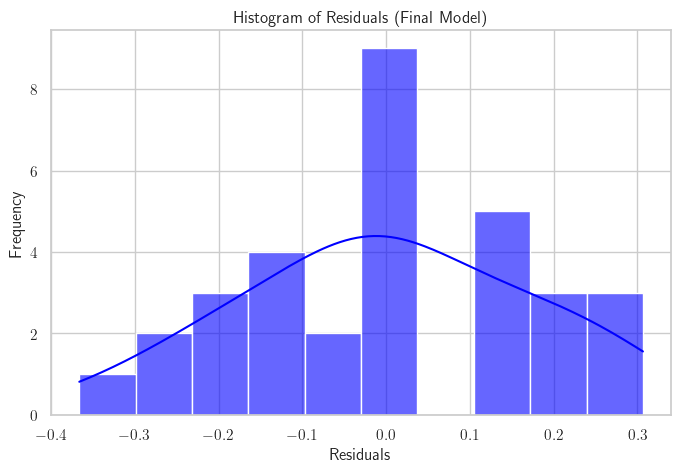

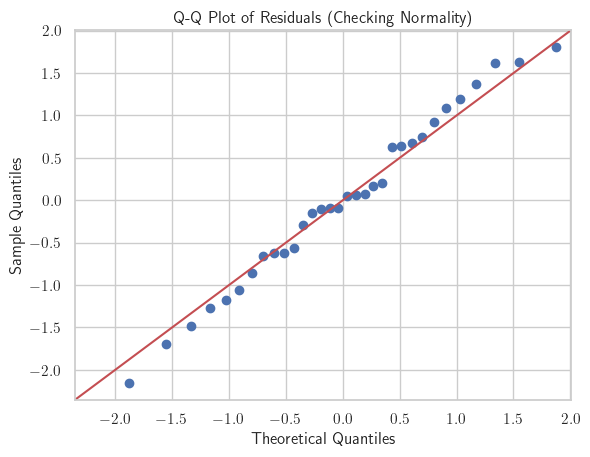


### Shapiro-Wilk Test for Normality ###
Statistic: 0.9818670452846486, p-value: 0.8516833297704346

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.07719180195096031, p-value: 0.9833163540309873

### Jarque-Bera Test for Normality ###
Statistic: 0.6232257194386523, p-value: 0.7322649626234946


In [182]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log.resid, 'norm', args=(final_model_log.resid.mean(), final_model_log.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


## the errors are normal now..

In [183]:
# Set seed for reproducibility
np.random.seed(42)

import numpy as np
import statsmodels.api as sm

cross_section_final_wo_outlier2 = cross_section_final_wo_outlier.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X_filtered.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_wo_outlier2.sample(n=len(cross_section_final_wo_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Create a DataFrame with the bootstrap results
bootstrap_results = pd.DataFrame({
    "Variable": X_filtered.columns,
    "Original Coefficient": final_model_log.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": np.std(bootstrap_coefs, axis=0),
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds
})

bootstrap_results

Variable  Original Coefficient  Bootstrap Mean  Bootstrap Std Err  \
0            const              0.304986        0.298461           0.070518   
1   expected_value              0.232702        0.236026           0.032322   
2  avg_top_5_price              0.002729        0.002787           0.000727   
3          set_age              0.158568        0.156976           0.016852   
4   is_special_set              0.189525        0.180871           0.107037   

   95% CI Lower  95% CI Upper  
0      0.149024      0.431987  
1      0.171620      0.302744  
2      0.001232      0.004719  
3      0.125592      0.191667  
4     -0.041473      0.377442

In [184]:
# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Add p-values to the bootstrap results table
bootstrap_results["Bootstrapped p-value"] = p_values

bootstrap_results

Variable  Original Coefficient  Bootstrap Mean  Bootstrap Std Err  \
0            const              0.304986        0.298461           0.070518   
1   expected_value              0.232702        0.236026           0.032322   
2  avg_top_5_price              0.002729        0.002787           0.000727   
3          set_age              0.158568        0.156976           0.016852   
4   is_special_set              0.189525        0.180871           0.107037   

   95% CI Lower  95% CI Upper  Bootstrapped p-value  
0      0.149024      0.431987                 0.000  
1      0.171620      0.302744                 0.000  
2      0.001232      0.004719                 0.002  
3      0.125592      0.191667                 0.000  
4     -0.041473      0.377442                 0.106

## With the outlier:

In [185]:

# Define dependent and independent variables again
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression



#  Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log2 = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log2.summary())



### Regression with Log-Transformed Booster Price (With Outlier) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     72.50
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.32e-14
Time:                        02:00:44   Log-Likelihood:                 10.143
No. Observations:                  33   AIC:                            -10.29
Df Residuals:                      28   BIC:                            -2.803
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [186]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier.sample(n=len(cross_section_final_with_outlier), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results2 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results2

Variable  Original Coefficient  Bootstrap Mean  Bootstrap Std Err  \
0            const              0.366526        0.350177           0.073073   
1   expected_value              0.210777        0.223768           0.032907   
2  avg_top_5_price              0.002514        0.002356           0.000779   
3          set_age              0.162520        0.159636           0.016430   
4   is_special_set              0.217913        0.198787           0.100109   

   95% CI Lower  95% CI Upper  Bootstrapped p-value  
0      0.195741      0.477974                 0.000  
1      0.170118      0.294089                 0.000  
2      0.000322      0.003486                 0.026  
3      0.129484      0.191674                 0.000  
4     -0.017447      0.387462                 0.076

## -> its 95% confidence interval!

### now individual R2 - loop through the variables and see the drop of R2 (i.e., just one variable dropped at a time and drop of R2 caused by this is the contribution of this variable to the overall R2):

In [187]:
# Full model R²
r2_full = final_model_log2.rsquared

# Store partial R² values
partial_r2s = {}

for var in ["expected_value", "avg_top_5_price", "set_age", "is_special_set"]:
    X_reduced = X.drop(columns=[var])
    model_reduced = sm.OLS(y_log, X_reduced).fit()
    r2_reduced = model_reduced.rsquared

    # Partial R² formula
    partial_r2 = r2_full - r2_reduced
    partial_r2s[var] = partial_r2

# Print partial R² for each predictor
print("\n### Partial R² for Each Predictor ###")
for var, r2 in partial_r2s.items():
    print(f"{var}: {r2:.4f}")



### Partial R² for Each Predictor ###
expected_value: 0.1293
avg_top_5_price: 0.0453
set_age: 0.1928
is_special_set: 0.0112


### Check for non-linear relationships:

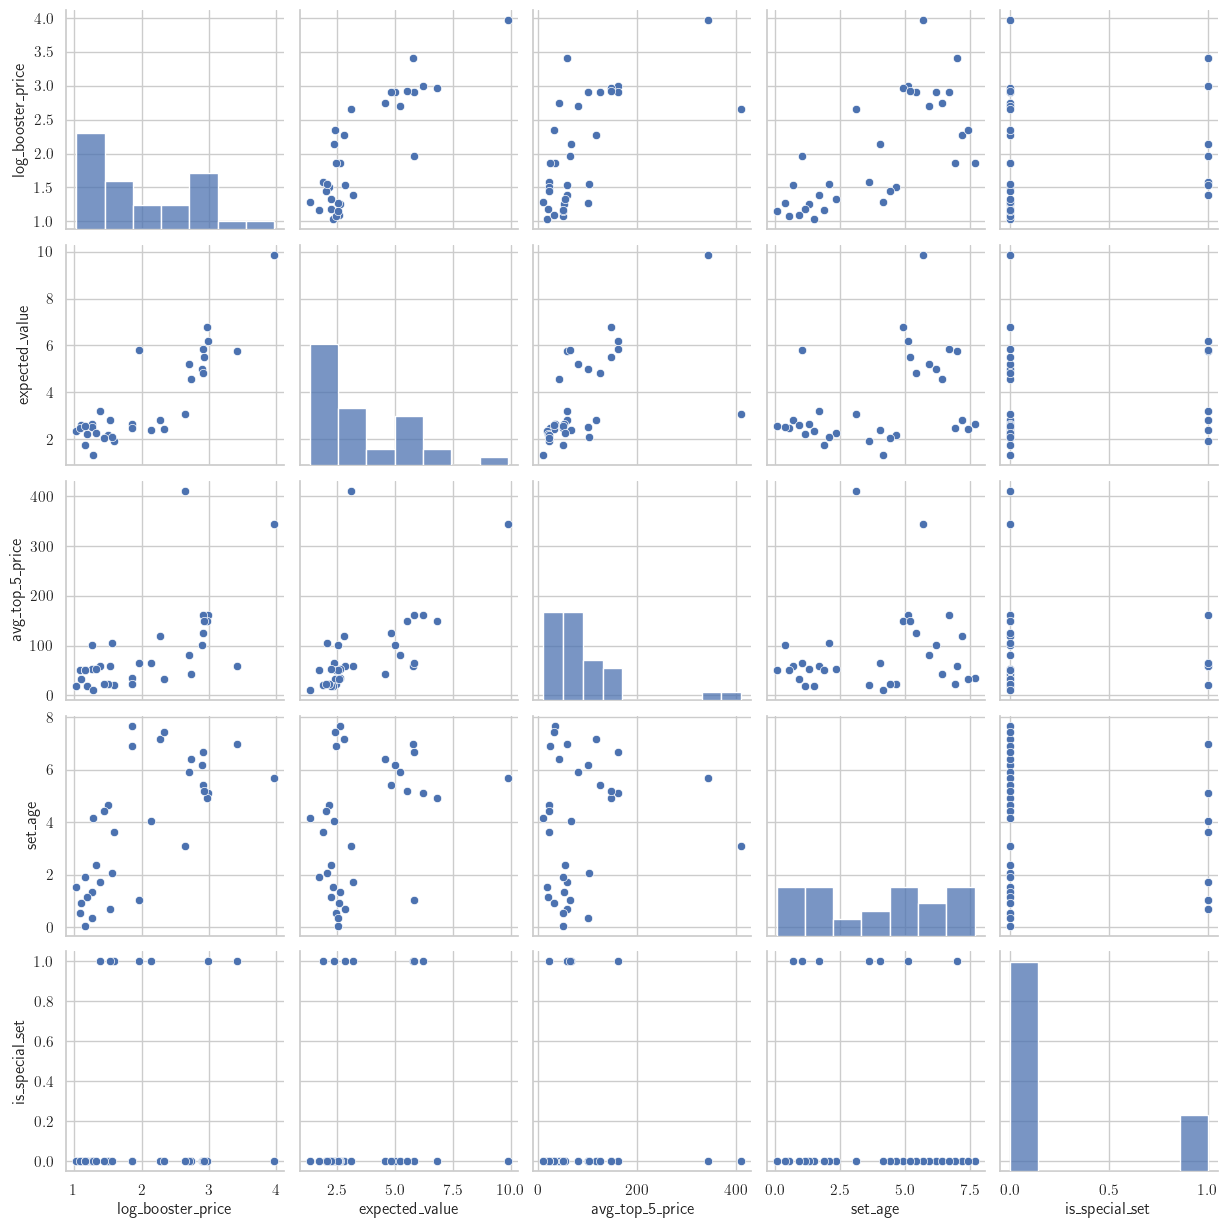

In [188]:
# Pairplot to check new relationships after taking the log of the booster_price:
sns.pairplot(cross_section_final[["log_booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


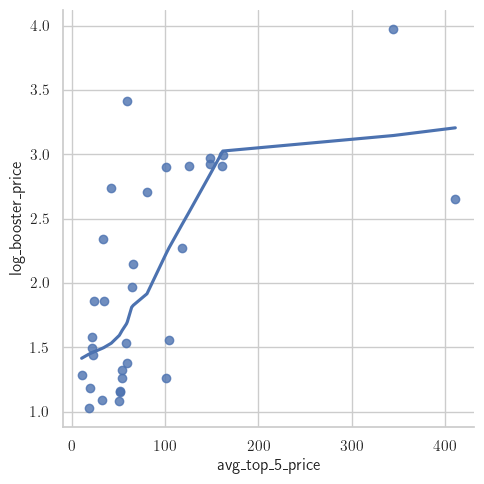

In [189]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="avg_top_5_price", y="log_booster_price", lowess=True)


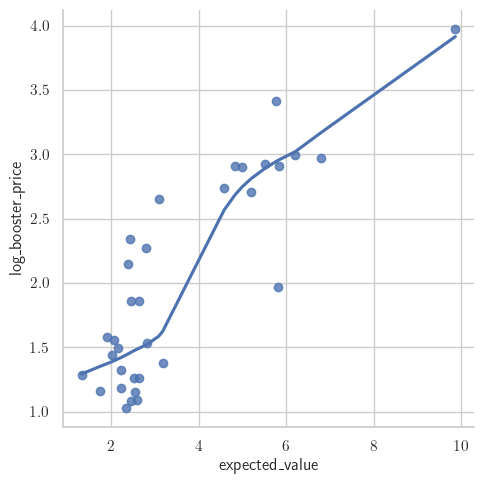

In [190]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="expected_value", y="log_booster_price", lowess=True)


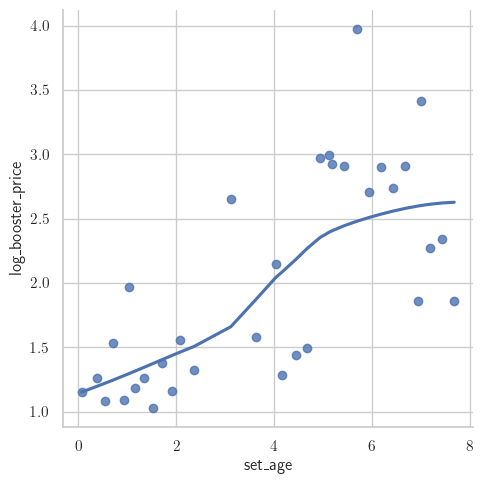

In [191]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="set_age", y="log_booster_price", lowess=True)


In [192]:
cross_section_final['log_avg_top_5_price'] = np.log(cross_section_final['avg_top_5_price'])

model_log_log = smf.ols('log_booster_price ~ expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final ).fit()

print(model_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.02e-17
Time:                        02:05:15   Log-Likelihood:                 9.7606
No. Observations:                  33   AIC:                            -9.521
Df Residuals:                      28   BIC:                            -2.039
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4890    

## model log log log:

In [193]:
# Add log of expected_value
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Refit with both logs
model_loglog = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit()

# Show summary
print(model_loglog.summary())


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.47e-16
Time:                        02:07:17   Log-Likelihood:                 5.9817
No. Observations:                  33   AIC:                            -1.963
Df Residuals:                      28   BIC:                             5.519
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.6526    

### model log log log log:

In [194]:
# Apply log-transform to all relevant vars
cross_section_final['log_set_age'] = np.log(cross_section_final['set_age'])
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Fit the full log-log model
final_loglog_model = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + log_set_age + is_special_set', data=cross_section_final).fit()

print(final_loglog_model.summary())


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     67.93
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           5.28e-14
Time:                        02:09:32   Log-Likelihood:               -0.37345
No. Observations:                  33   AIC:                             10.75
Df Residuals:                      28   BIC:                             18.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3202    

### wo heteroskedasticity robust errors hc3:

In [195]:
# Fit OLS again with log-transformed y
final_model_log3 = sm.OLS(y_log, X).fit()

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log3.summary())



### Regression with Log-Transformed Booster Price (With Outlier) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           7.35e-18
Time:                        02:11:27   Log-Likelihood:                 10.143
No. Observations:                  33   AIC:                            -10.29
Df Residuals:                      28   BIC:                            -2.803
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

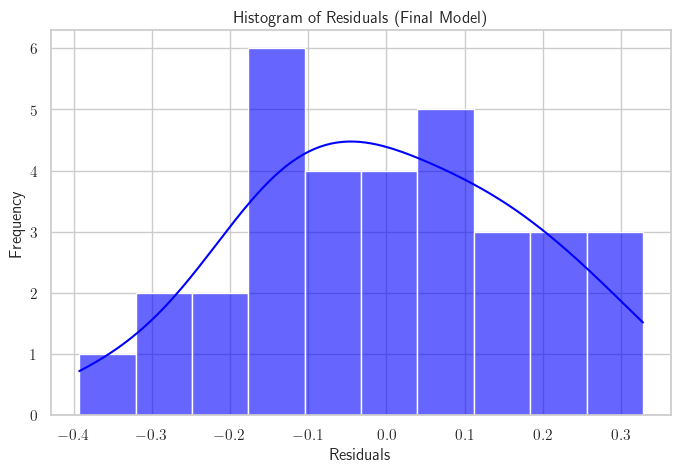

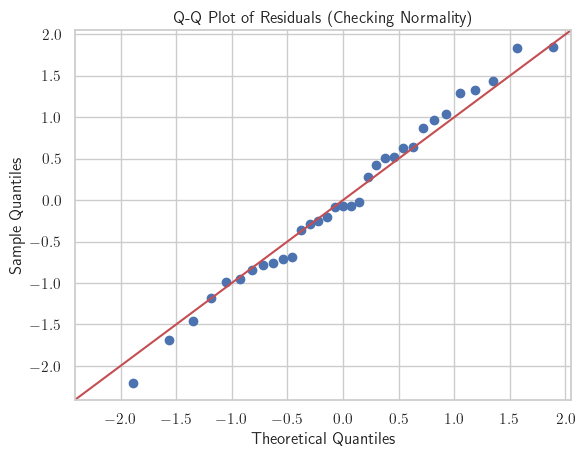


### Shapiro-Wilk Test for Normality ###
Statistic: 0.9838061397319715, p-value: 0.8911633359958782

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.08593921415513966, p-value: 0.9504431455218312

### Jarque-Bera Test for Normality ###
Statistic: 0.5496268431575164, p-value: 0.7597138562142866


In [196]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log2.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log2.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log2.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log2.resid, 'norm', args=(final_model_log2.resid.mean(), final_model_log2.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log2.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


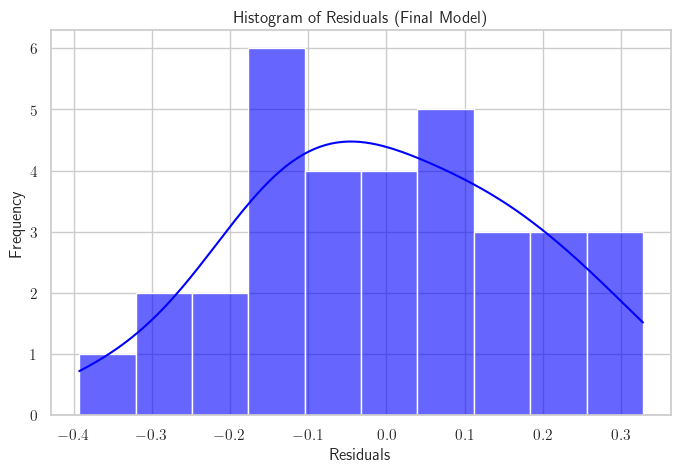

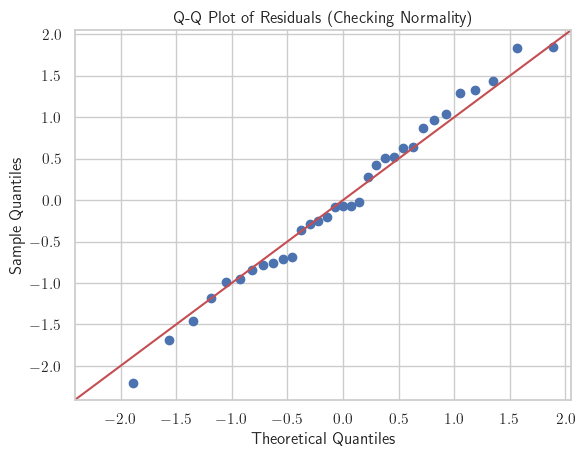


### Shapiro-Wilk Test for Normality ###
Statistic: 0.9838061397319715, p-value: 0.8911633359958782

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.08593921415513966, p-value: 0.9504431455218312

### Jarque-Bera Test for Normality ###
Statistic: 0.5496268431575164, p-value: 0.7597138562142866


In [197]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log3.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log3.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log3.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log3.resid, 'norm', args=(final_model_log3.resid.mean(), final_model_log3.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log3.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


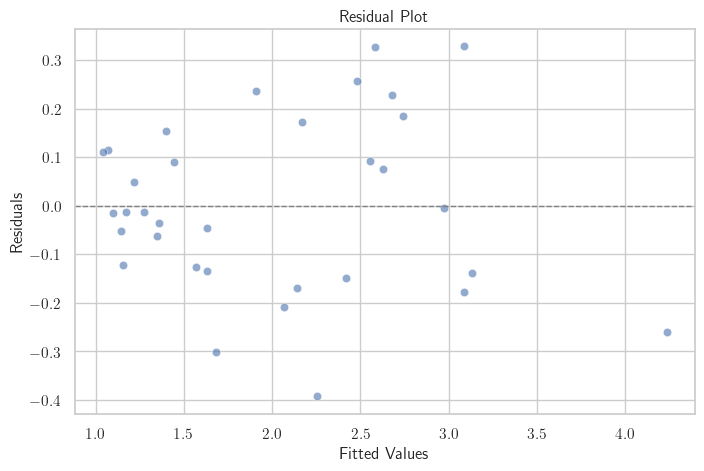


### Breusch-Pagan Test #
LM Statistic: 11.253015836794797, p-value: 0.02386290871634343

### White's Test #
LM Statistic: 17.744437770441124, p-value: 0.1674662802211968


In [198]:
residuals_filtered2 = final_model_log3.resid
fitted_values_filtered2 = final_model_log3.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered2, y=residuals_filtered2, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot ")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered2 = sms.het_breuschpagan(residuals_filtered2, X)
print("\n### Breusch-Pagan Test #")
print(f"LM Statistic: {bp_test_filtered2[0]}, p-value: {bp_test_filtered2[1]}")

# White's Test
white_test_filtered2 = sms.het_white(residuals_filtered2, X)
print("\n### White's Test #")
print(f"LM Statistic: {white_test_filtered2[0]}, p-value: {white_test_filtered2[1]}")


# ...SO... we use hc3 

## Now, the quantile regression with log booster prices and with outlier:

In [199]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model2 = smf.quantreg('log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model2.summary())


### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:      log_booster_price   Pseudo R-squared:               0.7975
Model:                       QuantReg   Bandwidth:                      0.2969
Method:                 Least Squares   Sparsity:                       0.5973
Date:                Mon, 07 Apr 2025   No. Observations:                   33
Time:                        02:14:30   Df Residuals:                       28
                                        Df Model:                            4
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3398      0.124      2.732      0.011       0.085       0.595
expected_value      0.2143      0.038      5.630      0.000       0.136       0.292
avg_top_5_price     0.0029      0.001      3.729      0.001      

## now plot across quantiles:

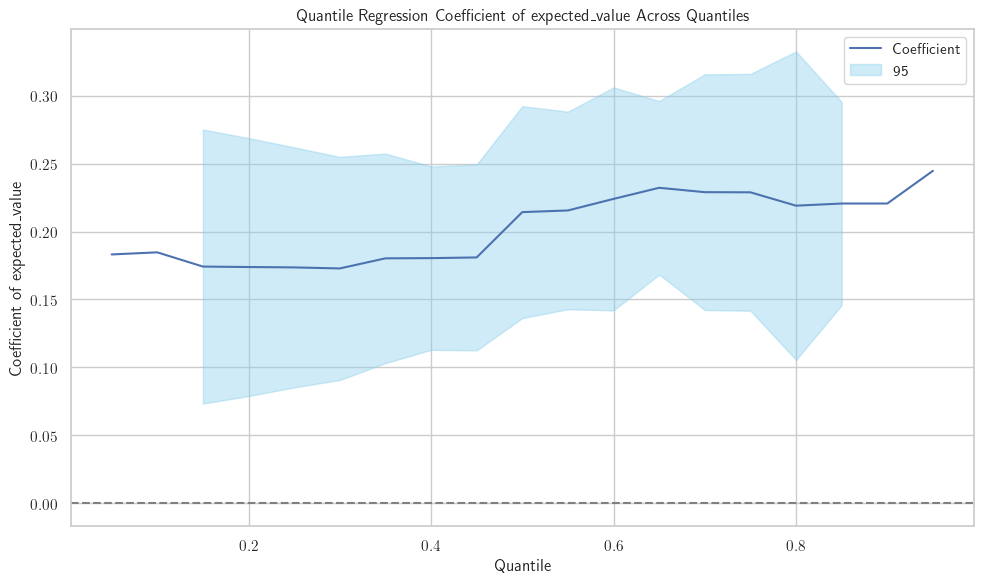

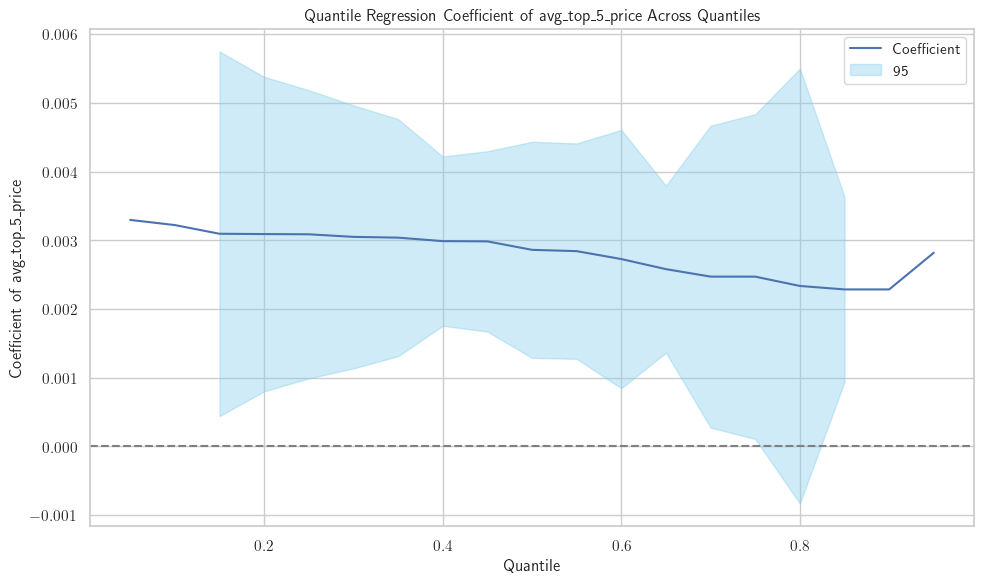

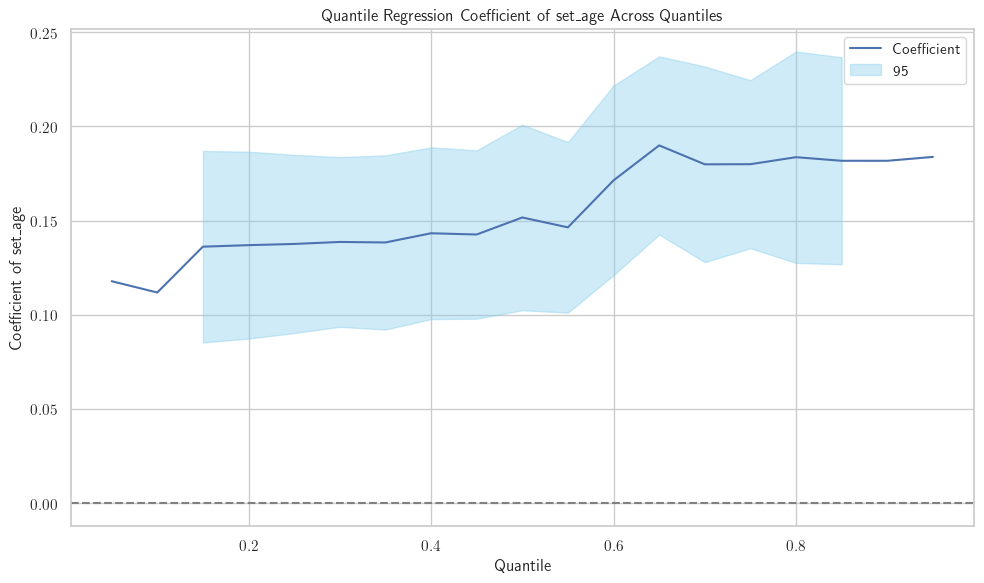

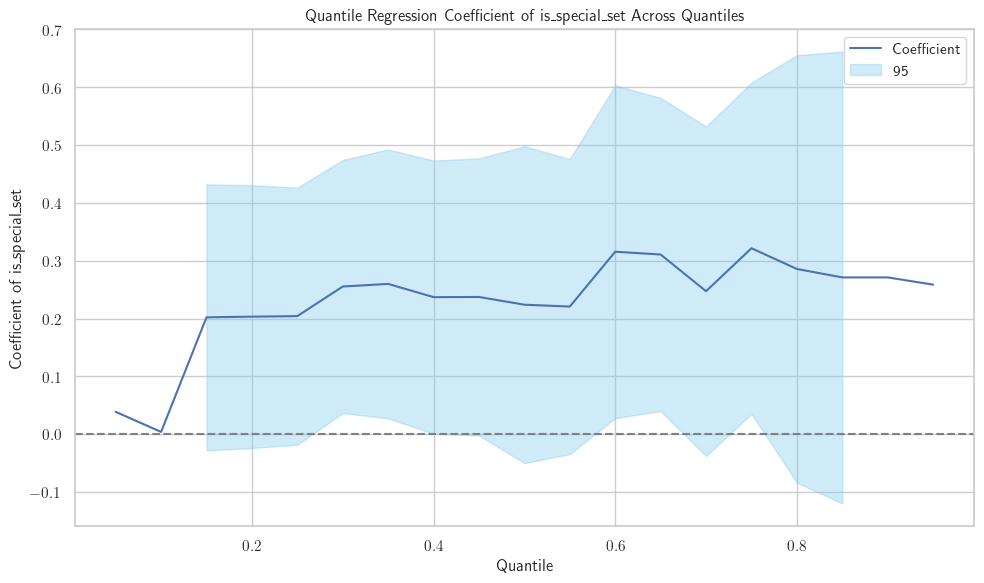

In [200]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define the model formula and variables of interest
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']

# Define quantiles
quantiles = np.arange(0.05, 0.96, 0.05)

# Loop through each variable and plot its coefficients across quantiles
for var in variables:
    coefs = []
    ci_lower = []
    ci_upper = []
    
    for q in quantiles:
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coefs.append(res.params[var])
        
        # Confidence intervals
        conf_int = res.conf_int()
        ci_lower.append(conf_int.loc[var, 0])
        ci_upper.append(conf_int.loc[var, 1])

    # Plot for current variable
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coefs, label='Coefficient')
    plt.fill_between(quantiles, ci_lower, ci_upper, color='skyblue', alpha=0.4, label='95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression Coefficient of {var} Across Quantiles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Bootstrapping for variable: expected_value


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
  5%|▌         | 1/19 [00:23<06:57, 23.17s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnin

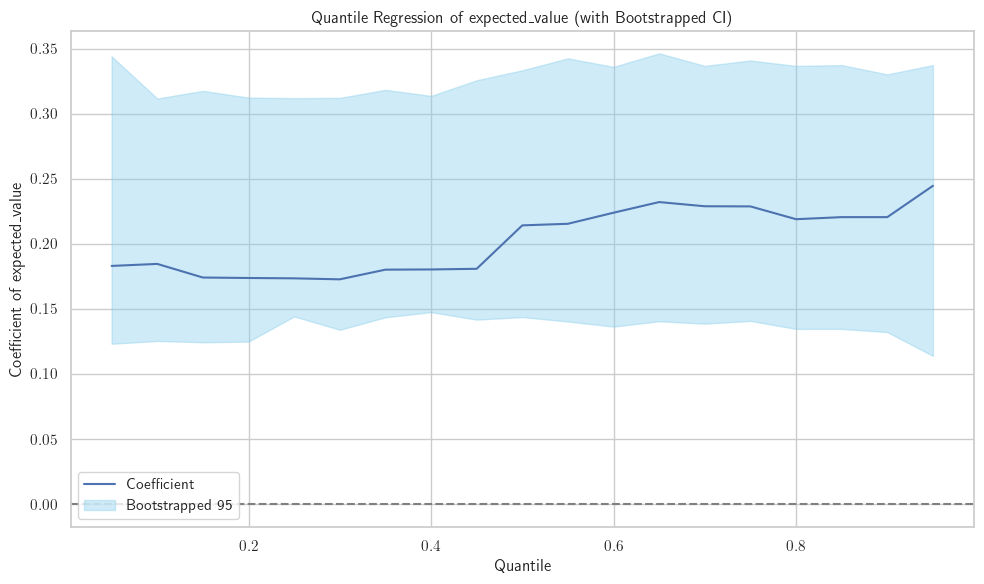


Bootstrapping for variable: avg_top_5_price


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
  5%|▌         | 1/19 [00:23<06:58, 23.24s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnin

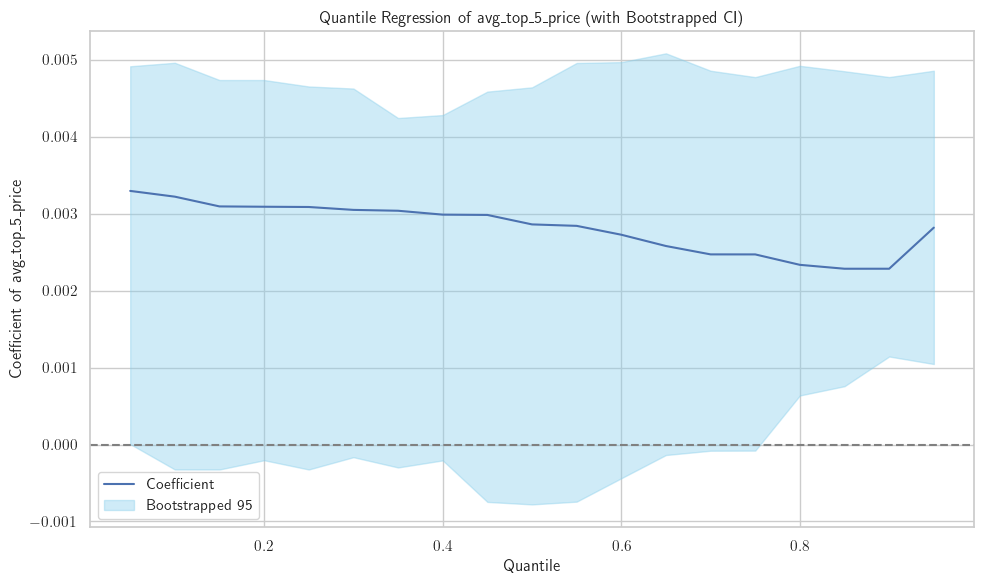


Bootstrapping for variable: set_age


  5%|▌         | 1/19 [00:27<08:20, 27.80s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
 11%|█         | 2/19 [01:09<10:09, 35.82s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.


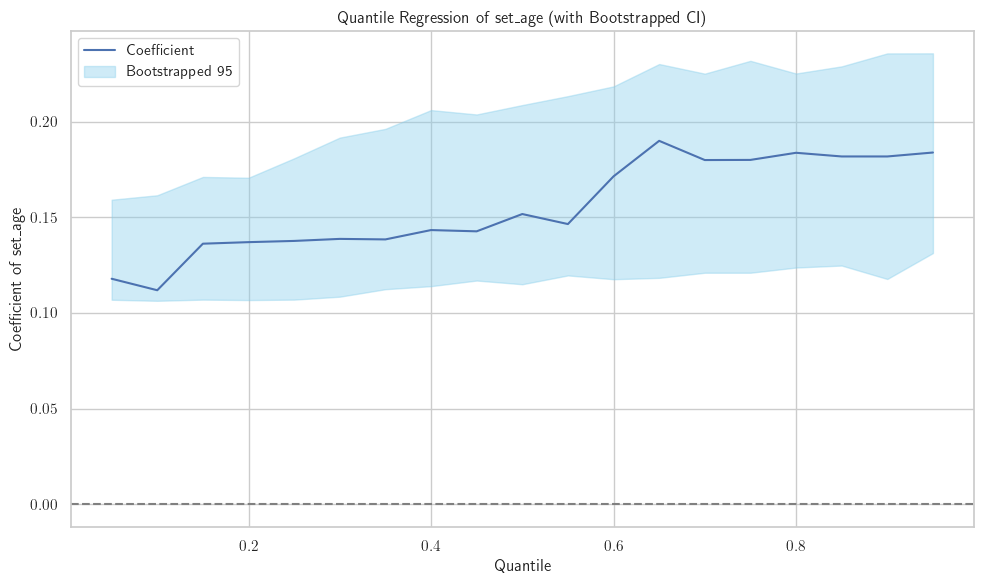


Bootstrapping for variable: is_special_set


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str

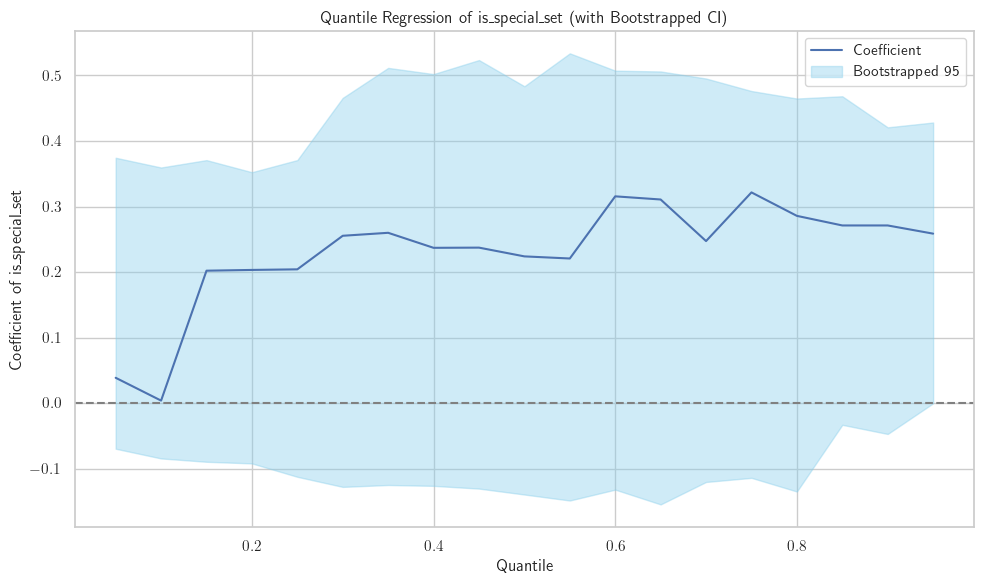

In [201]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm import tqdm

# Settings
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']
quantiles = np.arange(0.05, 0.96, 0.05)
n_bootstraps = 1000  # You can reduce to 500 if it's slow
random_seed = 42

# Set seed for reproducibility
np.random.seed(random_seed)

for var in variables:
    coef_values = []
    lower_bounds = []
    upper_bounds = []

    print(f"\nBootstrapping for variable: {var}")
    for q in tqdm(quantiles):
        # Fit model on full data for this quantile
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coef_values.append(res.params[var])

        # Bootstrap loop
        boot_coefs = []
        for _ in range(n_bootstraps):
            boot_sample = cross_section_final.sample(frac=1, replace=True)
            try:
                boot_model = smf.quantreg(formula, data=boot_sample)
                boot_res = boot_model.fit(q=q, max_iter=1000, disp=False)
                boot_coefs.append(boot_res.params[var])
            except:
                continue  # In case of convergence issues

        # Compute 95% CI
        lower = np.percentile(boot_coefs, 2.5)
        upper = np.percentile(boot_coefs, 97.5)
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coef_values, label='Coefficient')
    plt.fill_between(quantiles, lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Bootstrapped 95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression of {var} (with Bootstrapped CI)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# now just bootstrap without log returns - lets see:

In [ ]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = bootstrap_sample["booster_price"]
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results3 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results3

## the final comparison of the base ols (with outlier, no log transform) and bootstrapping (the same).

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Use the full dataset (with outlier)
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define independent variables
X = cross_section_final_with_outlier2[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

# Define dependent variable (no log-transform)
y = cross_section_final_with_outlier2["booster_price"]

# Fit the original linear model (for reference)
final_model_linear = sm.OLS(y, X).fit()

# Number of bootstrap samples
num_bootstraps = 1000

# Storage for bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Bootstrapping loop
for i in range(num_bootstraps):
    # Resample dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define X and y for the bootstrap sample
    X_boot = sm.add_constant(bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
    y_boot = bootstrap_sample["booster_price"]

    # Fit the model and store coefficients
    boot_model = sm.OLS(y_boot, X_boot).fit()
    bootstrap_coefs[i, :] = boot_model.params.values

# Compute bootstrap statistics
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Two-tailed bootstrapped p-values (clipped at 1)
p_values = 2 * np.minimum(
    np.mean(bootstrap_coefs <= 0, axis=0),
    np.mean(bootstrap_coefs > 0, axis=0)
)

# Combine results into a DataFrame
bootstrap_results_linear = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_linear.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

# Display the results
bootstrap_results_linear
